In [1]:
# Importing all the libraries here
import pandas as pd
from pandas import to_datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import __version__
import cufflinks as cf
import plotly.express as px
init_notebook_mode(connected=True)
import plotly.graph_objects as go
cf.go_offline()
%matplotlib inline
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix
import random
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
import math

In [2]:
# Below is a list of palletes stored in a variable palette_values. It will be used to visualize the plots we will be plotting below 
palette_values = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 
 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 
 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 
 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r',
'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 
 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 
 'Wistia','Wistia_r','YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 
 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 
 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r',
 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r',
 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 
 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r',
 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 
 'inferno_r', 'magma', 'magma_r', 'mako', 'mako_r', 
 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r',
 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r',
 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r',
 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b',
 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight',
 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

# Assignment


You have already picked out the dataset you want to work with. 

----

# Question 
1. EDA, i want to see some insights, present it neatly. 
2. Fit a Decision Tree Regressor model on your data. 
3. I want to see the training and testing accuracy of your model. So do split your data before modelling.


### Brownie Points (Extra 15 points)
- Lastly, i want to see a function where i can input my values and get a prediction of whatever you are trying to predict. Think this through !!.



Best of luck !!

![](https://media.tenor.com/mUVjXo5LhsQAAAAC/kakashi-yes.gif)


In [3]:
# Reading the csv file and loading the dataset
df = pd.read_csv('MagicBricks.csv')

In [4]:
df

Area  BHK  Bathroom      Furnishing  \
0       800.0    3       2.0  Semi-Furnished   
1       750.0    2       2.0  Semi-Furnished   
2       950.0    2       2.0       Furnished   
3       600.0    2       2.0  Semi-Furnished   
4       650.0    2       2.0  Semi-Furnished   
...       ...  ...       ...             ...   
1254   4118.0    4       5.0     Unfurnished   
1255   1050.0    3       2.0  Semi-Furnished   
1256    875.0    3       3.0  Semi-Furnished   
1257    990.0    2       2.0     Unfurnished   
1258  11050.0    3       3.0     Unfurnished   

                                               Locality  Parking     Price  \
0                                      Rohini Sector 25      1.0   6500000   
1                J R Designers Floors, Rohini Sector 24      1.0   5000000   
2                   Citizen Apartment, Rohini Sector 13      1.0  15500000   
3                                      Rohini Sector 24      1.0   4200000   
4     Rohini Sector 24 carpet area 650 sqft status R...      1.0   6200000   
...                                                 ...      ...       ...   
1254                                  Chittaranjan Park      3.0  55000000   
1255                                  Chittaranjan Park      3.0  12500000   
1256                                  Chittaranjan Park      3.0  17500000   
1257                          Chittaranjan Park Block A      1.0  11500000   
1258                                  Chittaranjan Park      1.0  18500000   

             Status   Transaction           Type  Per_Sqft  
0     Ready_to_move  New_Property  Builder_Floor       NaN  
1     Ready_to_move  New_Property      Apartment    6667.0  
2     Ready_to_move        Resale      Apartment    6667.0  
3     Ready_to_move        Resale  Builder_Floor    6667.0  
4     Ready_to_move  New_Property  Builder_Floor    6667.0  
...             ...           ...            ...       ...  
1254  Ready_to_move  New_Property  Builder_Floor   12916.0  
1255  Ready_to_move        Resale  Builder_Floor   12916.0  
1256  Ready_to_move  New_Property  Builder_Floor   12916.0  
1257  Ready_to_move        Resale  Builder_Floor   12916.0  
1258  Ready_to_move  New_Property  Builder_Floor   12916.0  

[1259 rows x 11 columns]

# Data Information

In [5]:
# Checking the shape of the dataframe
df.shape

(1259, 11)

In [6]:
# Looking at our data's data types to check if something needs to be changed
df.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [7]:
# Taking a better look to our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


## Checking for NA values

In [8]:
(df.isna().sum())

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

## Filling the NA values with the Median

In [9]:
df['Per_Sqft'] = df['Per_Sqft'].fillna(df['Per_Sqft'].median())

In [10]:
df['Parking'] = df['Parking'].fillna(df['Parking'].median())

In [11]:
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].median())

In [12]:
(df.isna().sum())

Area           0
BHK            0
Bathroom       0
Furnishing     5
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           5
Per_Sqft       0
dtype: int64

## Dropping the NA rows for "Type" column

In [13]:
df = df.dropna(axis=0, how="any")

In [14]:
(df.isna().sum())

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [15]:
df

Area  BHK  Bathroom      Furnishing  \
0       800.0    3       2.0  Semi-Furnished   
1       750.0    2       2.0  Semi-Furnished   
2       950.0    2       2.0       Furnished   
3       600.0    2       2.0  Semi-Furnished   
4       650.0    2       2.0  Semi-Furnished   
...       ...  ...       ...             ...   
1254   4118.0    4       5.0     Unfurnished   
1255   1050.0    3       2.0  Semi-Furnished   
1256    875.0    3       3.0  Semi-Furnished   
1257    990.0    2       2.0     Unfurnished   
1258  11050.0    3       3.0     Unfurnished   

                                               Locality  Parking     Price  \
0                                      Rohini Sector 25      1.0   6500000   
1                J R Designers Floors, Rohini Sector 24      1.0   5000000   
2                   Citizen Apartment, Rohini Sector 13      1.0  15500000   
3                                      Rohini Sector 24      1.0   4200000   
4     Rohini Sector 24 carpet area 650 sqft status R...      1.0   6200000   
...                                                 ...      ...       ...   
1254                                  Chittaranjan Park      3.0  55000000   
1255                                  Chittaranjan Park      3.0  12500000   
1256                                  Chittaranjan Park      3.0  17500000   
1257                          Chittaranjan Park Block A      1.0  11500000   
1258                                  Chittaranjan Park      1.0  18500000   

             Status   Transaction           Type  Per_Sqft  
0     Ready_to_move  New_Property  Builder_Floor   11291.5  
1     Ready_to_move  New_Property      Apartment    6667.0  
2     Ready_to_move        Resale      Apartment    6667.0  
3     Ready_to_move        Resale  Builder_Floor    6667.0  
4     Ready_to_move  New_Property  Builder_Floor    6667.0  
...             ...           ...            ...       ...  
1254  Ready_to_move  New_Property  Builder_Floor   12916.0  
1255  Ready_to_move        Resale  Builder_Floor   12916.0  
1256  Ready_to_move  New_Property  Builder_Floor   12916.0  
1257  Ready_to_move        Resale  Builder_Floor   12916.0  
1258  Ready_to_move  New_Property  Builder_Floor   12916.0  

[1254 rows x 11 columns]

In [16]:
df.describe()

Area          BHK     Bathroom      Parking         Price  \
count   1254.000000  1254.000000  1254.000000  1254.000000  1.254000e+03   
mean    1467.443365     2.795056     2.556619     1.914673  2.133711e+07   
std     1570.540033     0.953981     1.043155     6.210196  2.564346e+07   
min       28.000000     1.000000     1.000000     1.000000  1.000000e+06   
25%      800.000000     2.000000     2.000000     1.000000  5.700000e+06   
50%     1200.000000     3.000000     2.000000     1.000000  1.420000e+07   
75%     1700.000000     3.000000     3.000000     2.000000  2.580000e+07   
max    24300.000000    10.000000     7.000000   114.000000  2.400000e+08   

            Per_Sqft  
count    1254.000000  
mean    14787.524721  
std     19038.706238  
min      1259.000000  
25%      6714.000000  
50%     11291.500000  
75%     15459.000000  
max    183333.000000

#### Plotting a bar graph for df.describe() to understand it a little bit better.
![](https://media.tenor.com/YocYXjTQe28AAAAC/iambeinggenerous-cayke.gif)

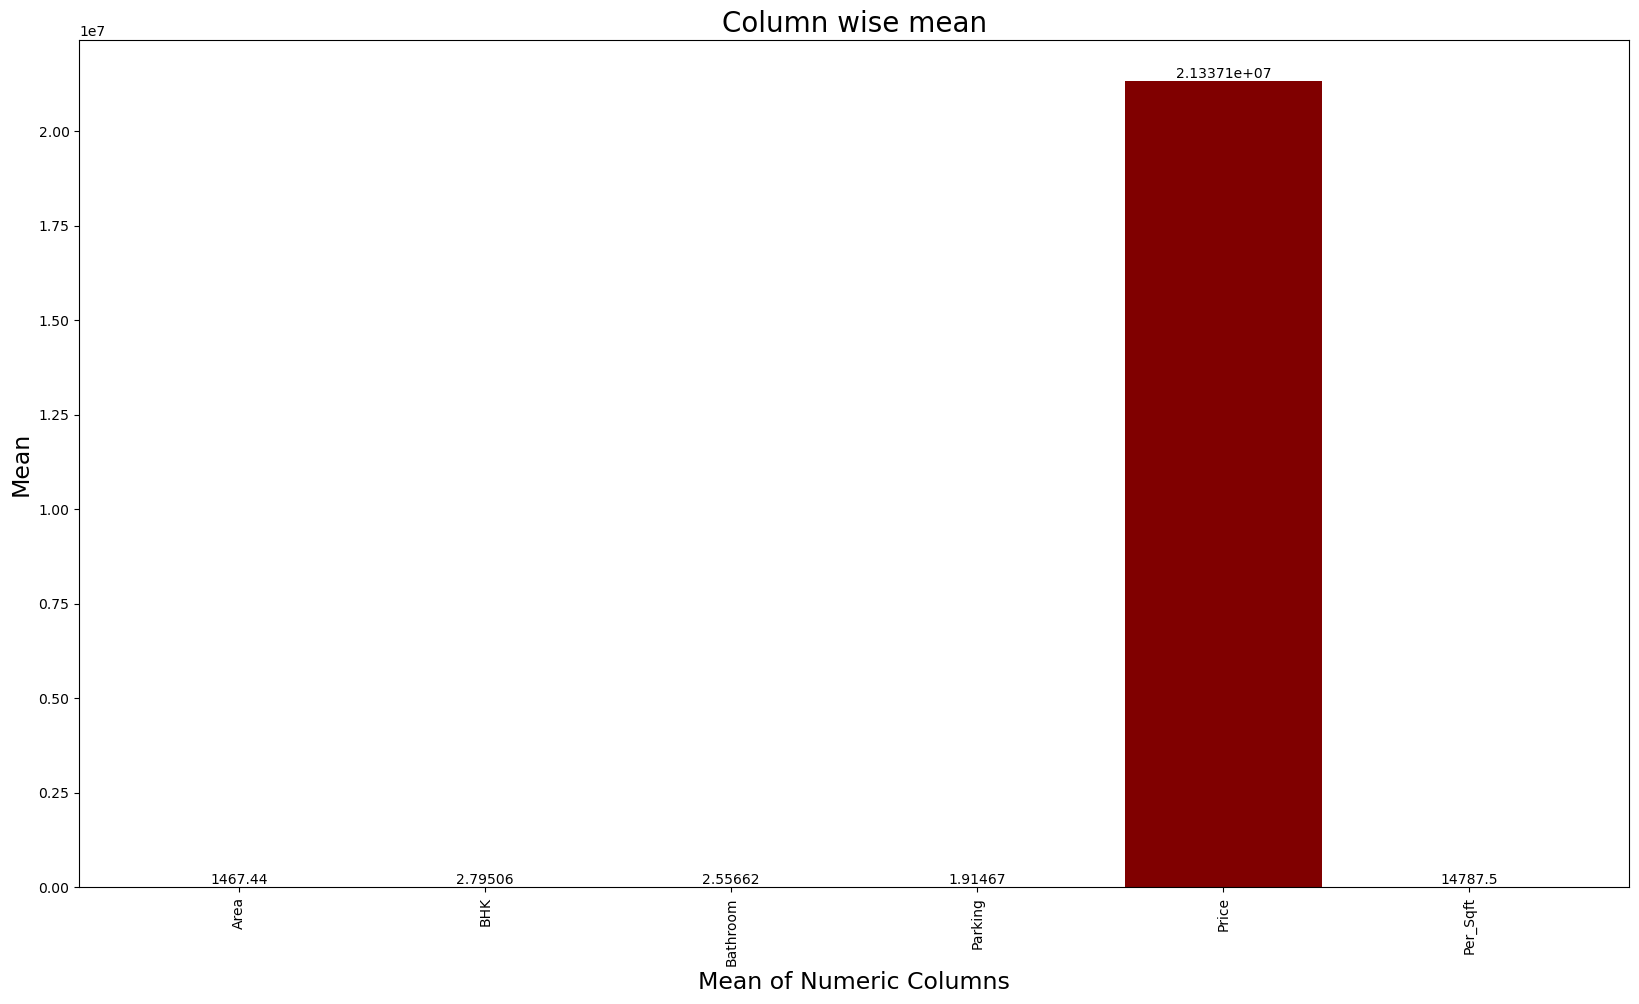

In [17]:
plt.figure(figsize = (20, 11))
ax = df.describe().loc["mean"].plot.bar(color ='maroon',width = 0.8)
ax.set_xlabel(xlabel = 'Mean of Numeric Columns', fontsize = 17)
ax.set_ylabel(ylabel = 'Mean', fontsize = 17)
ax.set_title(label = 'Column wise mean', fontsize = 20)
for i in ax.containers:
    ax.bar_label(i)

#### Saving column wise mean in a panda dataframe to plot box plots for much better clarity.

In [18]:
df1 = pd.DataFrame(df.describe())

#### Dropping "count" (not useful in this analysis)

In [19]:
df1.drop(index= "count", axis=1 , inplace=True)
df1.head(1)

Area       BHK  Bathroom   Parking         Price      Per_Sqft
mean  1467.443365  2.795056  2.556619  1.914673  2.133711e+07  14787.524721

In [20]:
df1

Area        BHK  Bathroom     Parking         Price  \
mean   1467.443365   2.795056  2.556619    1.914673  2.133711e+07   
std    1570.540033   0.953981  1.043155    6.210196  2.564346e+07   
min      28.000000   1.000000  1.000000    1.000000  1.000000e+06   
25%     800.000000   2.000000  2.000000    1.000000  5.700000e+06   
50%    1200.000000   3.000000  2.000000    1.000000  1.420000e+07   
75%    1700.000000   3.000000  3.000000    2.000000  2.580000e+07   
max   24300.000000  10.000000  7.000000  114.000000  2.400000e+08   

           Per_Sqft  
mean   14787.524721  
std    19038.706238  
min     1259.000000  
25%     6714.000000  
50%    11291.500000  
75%    15459.000000  
max   183333.000000

#### Plotting a box plot for each variable to visualize the above Dataframe, also i've made it interacive so feel free to hover around.
#### Also, i'm using list comprehension to make indivisual box plot for each vaiable.

In [23]:
df1.iplot(kind="box", margin=(0,0,0,0), bestfit=True,)

In [24]:
df1.iplot(kind="box", margin=(0,0,0,0), bestfit=True, keys= [x for x in df1.columns if x in ["BHK","Bathroom"]])

In [25]:
df1.iplot(kind="box", margin=(0,0,0,0), bestfit=True, keys= [x for x in df1.columns if x in ["Parking"]])

In [26]:
df1.iplot(kind="box", margin=(0,0,0,0), bestfit=True, keys= [x for x in df1.columns if x in ["Price"]])

In [27]:
df1.iplot(kind="box", margin=(0,0,0,0), bestfit=True, keys= [x for x in df1.columns if x in ["Per_Sqft"]])

In [26]:
df

Area  BHK  Bathroom      Furnishing  \
0       800.0    3       2.0  Semi-Furnished   
1       750.0    2       2.0  Semi-Furnished   
2       950.0    2       2.0       Furnished   
3       600.0    2       2.0  Semi-Furnished   
4       650.0    2       2.0  Semi-Furnished   
...       ...  ...       ...             ...   
1254   4118.0    4       5.0     Unfurnished   
1255   1050.0    3       2.0  Semi-Furnished   
1256    875.0    3       3.0  Semi-Furnished   
1257    990.0    2       2.0     Unfurnished   
1258  11050.0    3       3.0     Unfurnished   

                                               Locality  Parking     Price  \
0                                      Rohini Sector 25      1.0   6500000   
1                J R Designers Floors, Rohini Sector 24      1.0   5000000   
2                   Citizen Apartment, Rohini Sector 13      1.0  15500000   
3                                      Rohini Sector 24      1.0   4200000   
4     Rohini Sector 24 carpet area 650 sqft status R...      1.0   6200000   
...                                                 ...      ...       ...   
1254                                  Chittaranjan Park      3.0  55000000   
1255                                  Chittaranjan Park      3.0  12500000   
1256                                  Chittaranjan Park      3.0  17500000   
1257                          Chittaranjan Park Block A      1.0  11500000   
1258                                  Chittaranjan Park      1.0  18500000   

             Status   Transaction           Type  Per_Sqft  
0     Ready_to_move  New_Property  Builder_Floor   11291.5  
1     Ready_to_move  New_Property      Apartment    6667.0  
2     Ready_to_move        Resale      Apartment    6667.0  
3     Ready_to_move        Resale  Builder_Floor    6667.0  
4     Ready_to_move  New_Property  Builder_Floor    6667.0  
...             ...           ...            ...       ...  
1254  Ready_to_move  New_Property  Builder_Floor   12916.0  
1255  Ready_to_move        Resale  Builder_Floor   12916.0  
1256  Ready_to_move  New_Property  Builder_Floor   12916.0  
1257  Ready_to_move        Resale  Builder_Floor   12916.0  
1258  Ready_to_move  New_Property  Builder_Floor   12916.0  

[1254 rows x 11 columns]

#### Creating a new column "ar_range" for much better analysis. It will make a range out of the column "Area" as follows:
 - if "Area" is from 0 to 1500 it will come under ar_range 1
 - if "Area" is from 1500 to 3000 it will come under ar_range 2
 - if "Area" is from 3000 to 25000 it will come under ar_range 3

In [27]:
def ar(i):
    if i["Area"]<= 1500:
        return int(1)
    elif 1500 < i["Area"] <= 3000:
        return int(2)
    elif 3000 < i["Area"] <= 25000 :
        return int(3)

### Applying the function to the Dataframe

In [28]:
df["ar_range"] = df.apply(ar, axis = 1)

In [29]:
df

Area  BHK  Bathroom      Furnishing  \
0       800.0    3       2.0  Semi-Furnished   
1       750.0    2       2.0  Semi-Furnished   
2       950.0    2       2.0       Furnished   
3       600.0    2       2.0  Semi-Furnished   
4       650.0    2       2.0  Semi-Furnished   
...       ...  ...       ...             ...   
1254   4118.0    4       5.0     Unfurnished   
1255   1050.0    3       2.0  Semi-Furnished   
1256    875.0    3       3.0  Semi-Furnished   
1257    990.0    2       2.0     Unfurnished   
1258  11050.0    3       3.0     Unfurnished   

                                               Locality  Parking     Price  \
0                                      Rohini Sector 25      1.0   6500000   
1                J R Designers Floors, Rohini Sector 24      1.0   5000000   
2                   Citizen Apartment, Rohini Sector 13      1.0  15500000   
3                                      Rohini Sector 24      1.0   4200000   
4     Rohini Sector 24 carpet area 650 sqft status R...      1.0   6200000   
...                                                 ...      ...       ...   
1254                                  Chittaranjan Park      3.0  55000000   
1255                                  Chittaranjan Park      3.0  12500000   
1256                                  Chittaranjan Park      3.0  17500000   
1257                          Chittaranjan Park Block A      1.0  11500000   
1258                                  Chittaranjan Park      1.0  18500000   

             Status   Transaction           Type  Per_Sqft  ar_range  
0     Ready_to_move  New_Property  Builder_Floor   11291.5         1  
1     Ready_to_move  New_Property      Apartment    6667.0         1  
2     Ready_to_move        Resale      Apartment    6667.0         1  
3     Ready_to_move        Resale  Builder_Floor    6667.0         1  
4     Ready_to_move  New_Property  Builder_Floor    6667.0         1  
...             ...           ...            ...       ...       ...  
1254  Ready_to_move  New_Property  Builder_Floor   12916.0         3  
1255  Ready_to_move        Resale  Builder_Floor   12916.0         1  
1256  Ready_to_move  New_Property  Builder_Floor   12916.0         1  
1257  Ready_to_move        Resale  Builder_Floor   12916.0         1  
1258  Ready_to_move  New_Property  Builder_Floor   12916.0         3  

[1254 rows x 12 columns]

### Plotting histogram to check the frequency of the variables

<Axes: xlabel='Price', ylabel='Count'>

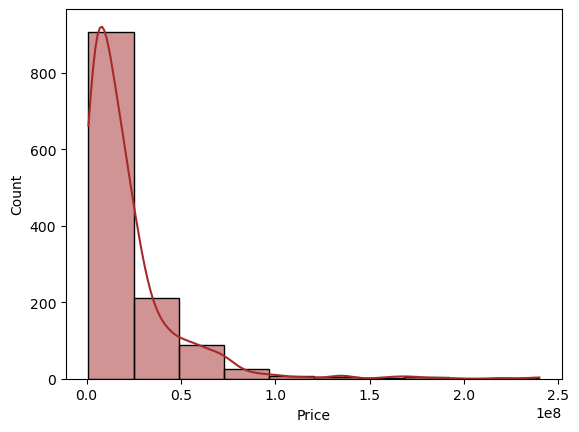

In [30]:
sns.histplot(data=df['Price'], bins=10, color="brown", kde=True)

#### Most of the houses in the dataset are priced in the range of 0 to 10000000

<Axes: xlabel='Area', ylabel='Count'>

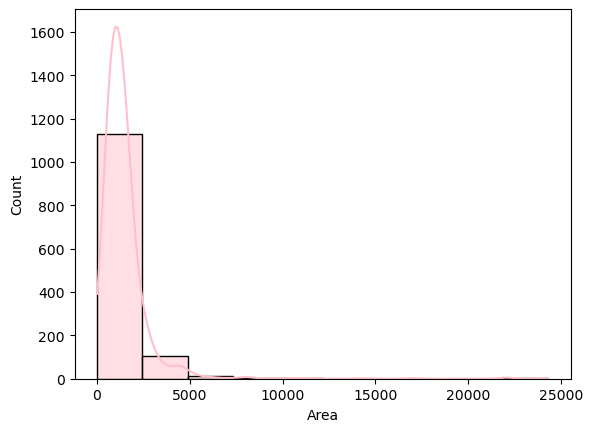

In [31]:
sns.histplot(data=df['Area'], bins=10, color="pink", kde=True)

#### Most of the houses Area is in the range of 0 to 5000

<Axes: xlabel='ar_range', ylabel='Count'>

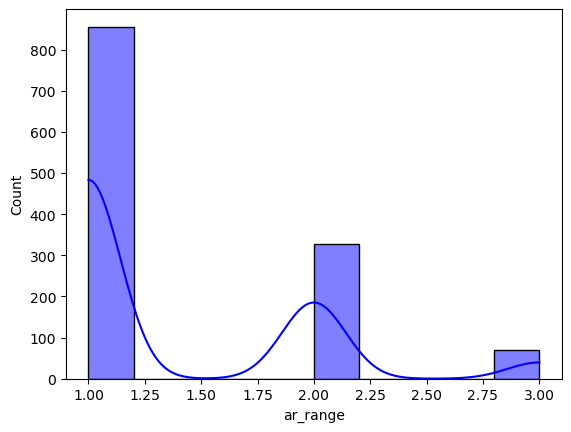

In [32]:
sns.histplot(data=df['ar_range'], bins=10, color="blue", kde=True)

<Axes: xlabel='Per_Sqft', ylabel='Count'>

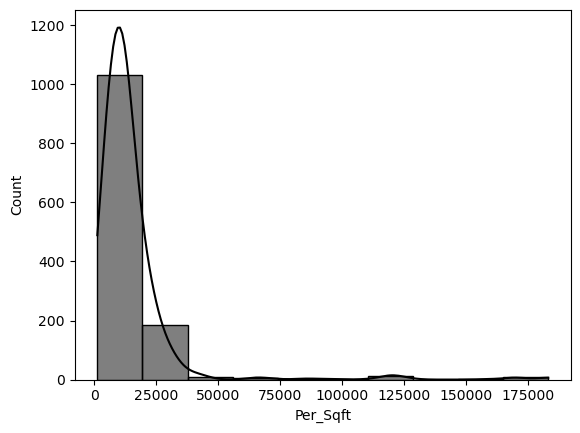

In [33]:
sns.histplot(data=df['Per_Sqft'], bins=10, color="black", kde=True)

#### Almost every houses Per Square Feet area in the dataset ranges from 0 to 50000

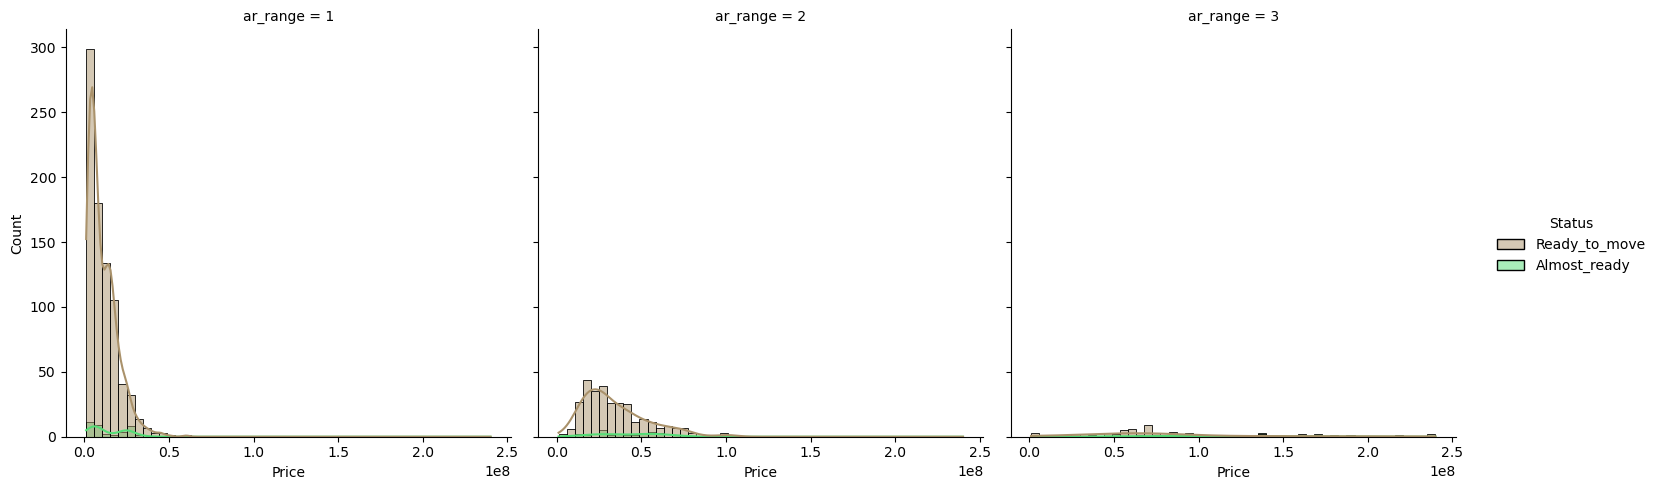

In [34]:
ax = sns.displot(df, x="Price", hue="Status",col='ar_range', bins=50, palette='terrain_r', kde='True')

#### You can double tap the above graphs to zoom in and zoom out (for clarity)
 - We can see the the houses whoose ar_Range is 1 are on the lower side of price (Cheap) 
 - Most of the houses are of ar_Range 2 Houses with ar_Range 2 are costliers than RM_Range 1
 - We can clearly see that the houses with RM_Range 3, their pricse are very widely spread

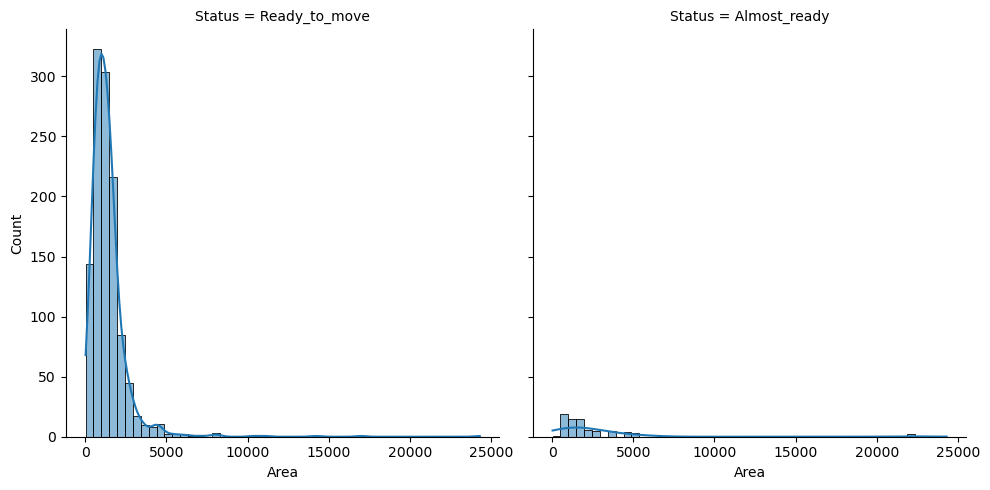

In [35]:
ax = sns.displot(df, x="Area",col='Status', bins=50, kde='True')

#### From the above distribution plot we can clearly see that:
 - Houses who's area is ranging from 0 to 5000 are Ready to move in while very less houses in this category are "Almost Ready"
 - You can also notice that there are a sifnificant houses whoose "Area" is around 22000 which are being prepared.


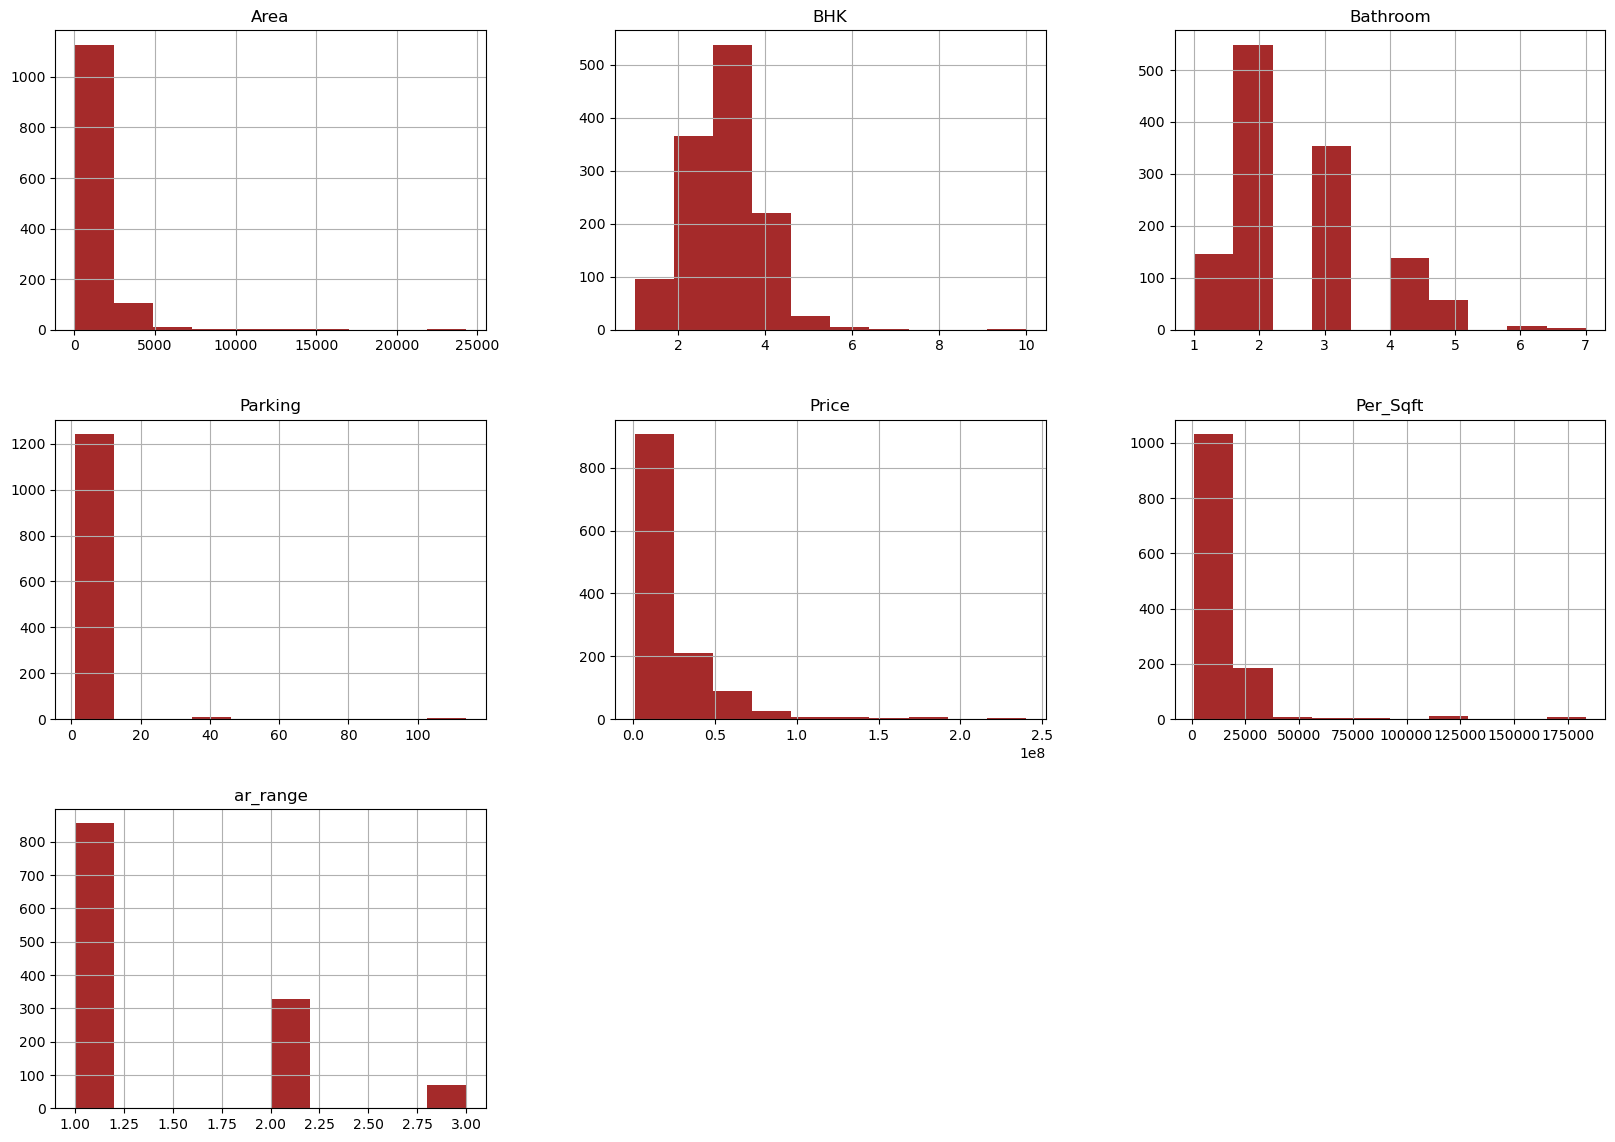

In [36]:
df.hist(figsize=(20,14), color='brown')
plt.show()

#### Above is a histogram plot summarizing all the distribution plots we just plotted earlier above.

## Coming to the countplots !!

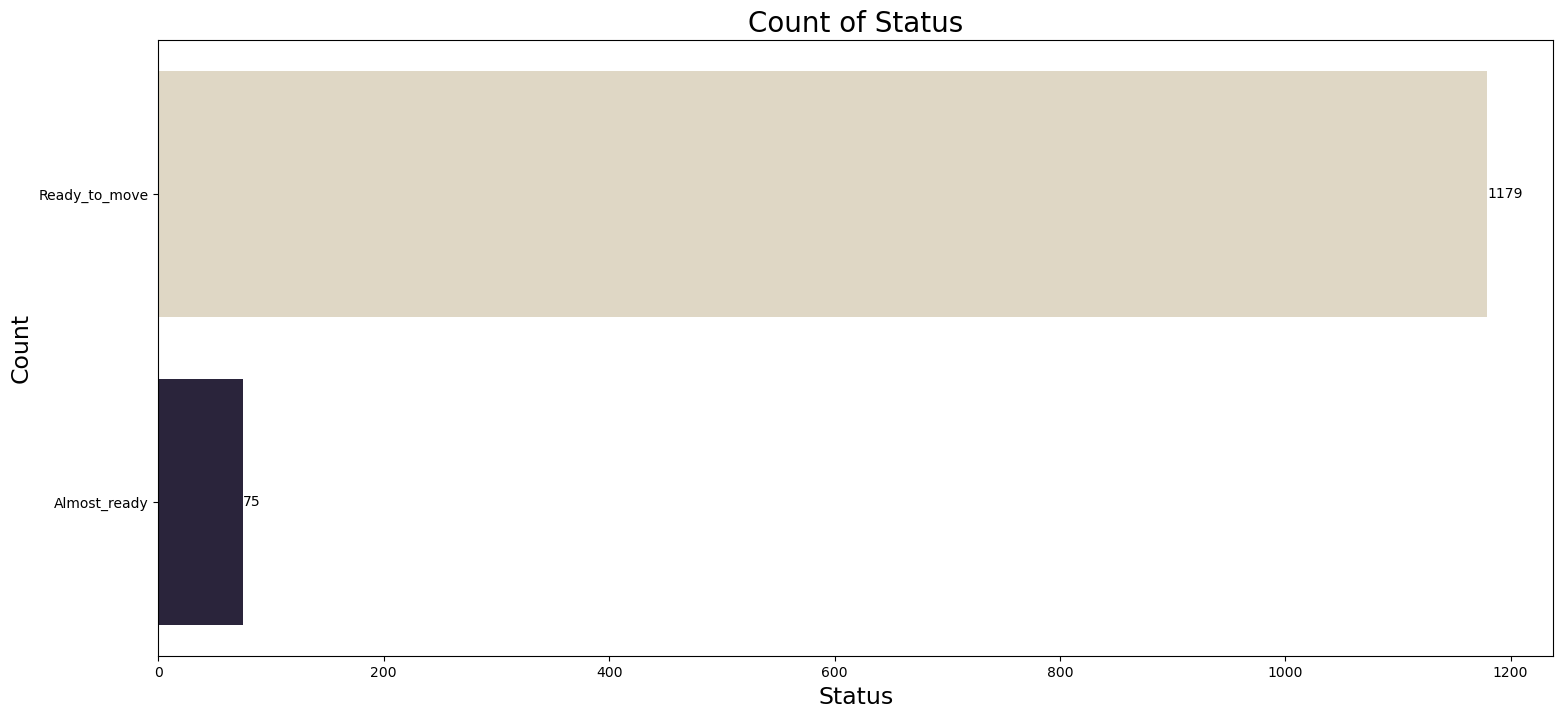

In [37]:
plt.figure(figsize = (18, 8))
ax = sns.countplot(y ='Status', data = df, palette='ch:s=-.2,r=.6')
ax.set_xlabel(xlabel = 'Status', fontsize = 17)
ax.set_ylabel(ylabel = 'Count', fontsize = 17)
ax.set_title(label = 'Count of Status', fontsize = 20) 
for i in ax.containers:
    ax.bar_label(i)

#### From the above count plot we can clearly see that:
 - Most of the houses are Ready to Move In.
 - This means that the company is doing a good job by getting the houses ready to move in so that the customer don't have to wait to move in their dream house.

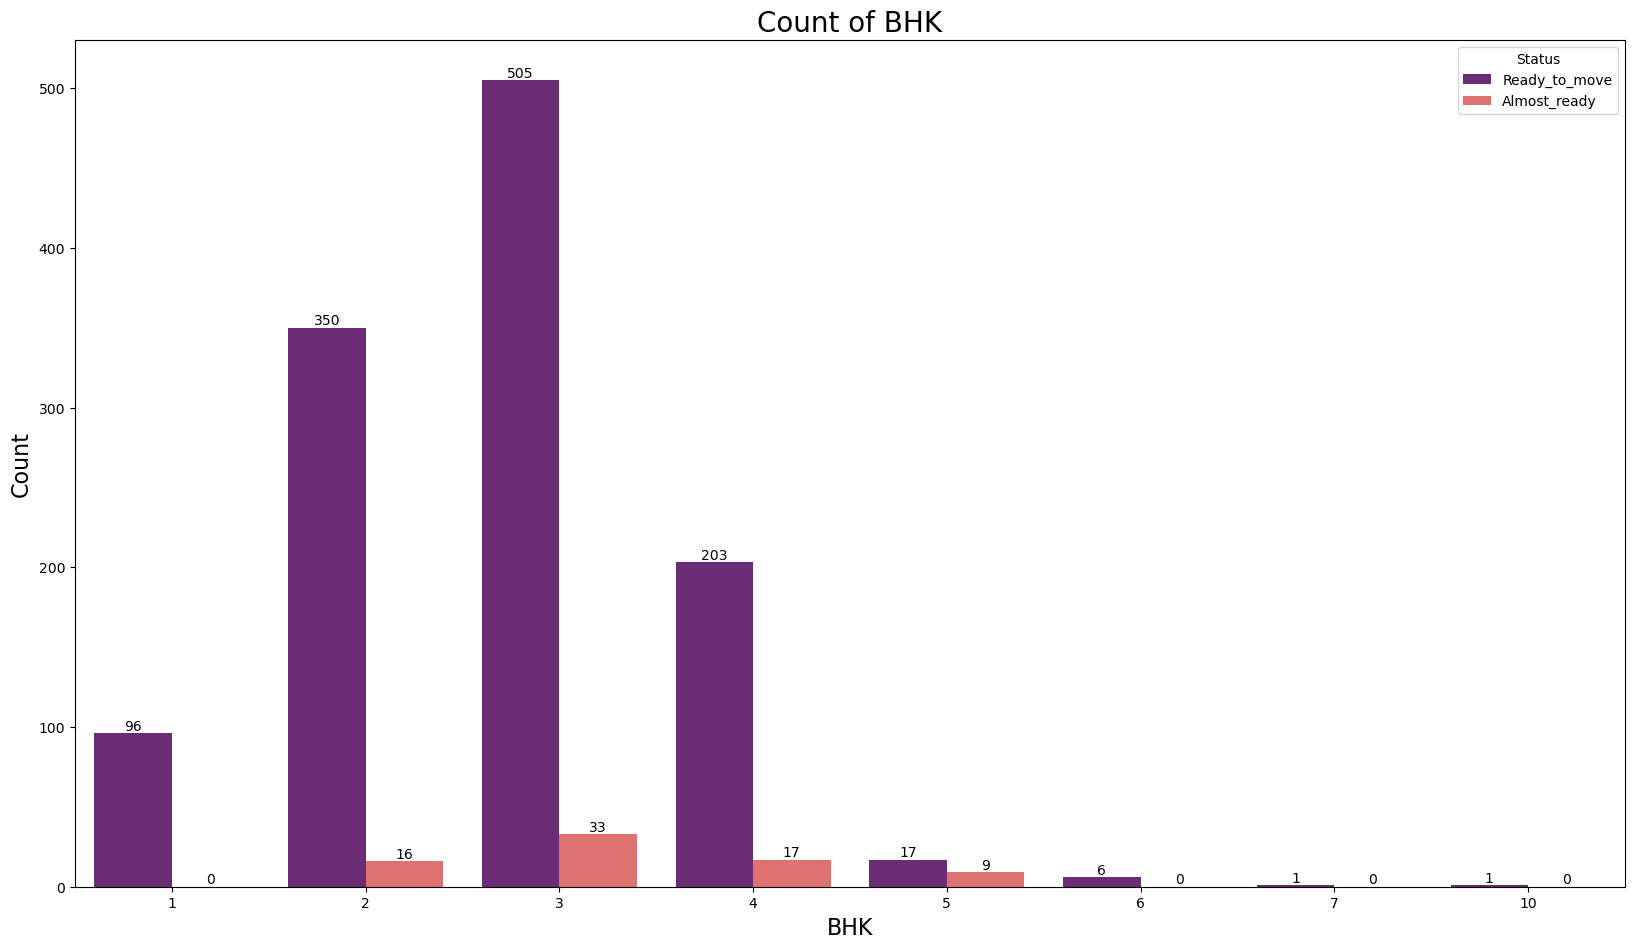

In [38]:
plt.figure(figsize = (20, 11))
ax = sns.countplot(x ='BHK', data = df, hue = "Status",palette="magma")
ax.set_xlabel(xlabel = 'BHK', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
ax.set_title(label = 'Count of BHK', fontsize = 20)
for i in ax.containers:
    ax.bar_label(i)

#### From the above count plot we can see that 3 BHK homes are the most common which leads to the conclusion that:
 - The company's  main focus is on providing affordable houses to the customers.
 - Though there is a large number of 3BHK the company also deals in premium houses with upto 10BHK rooms which is already ready to move in.

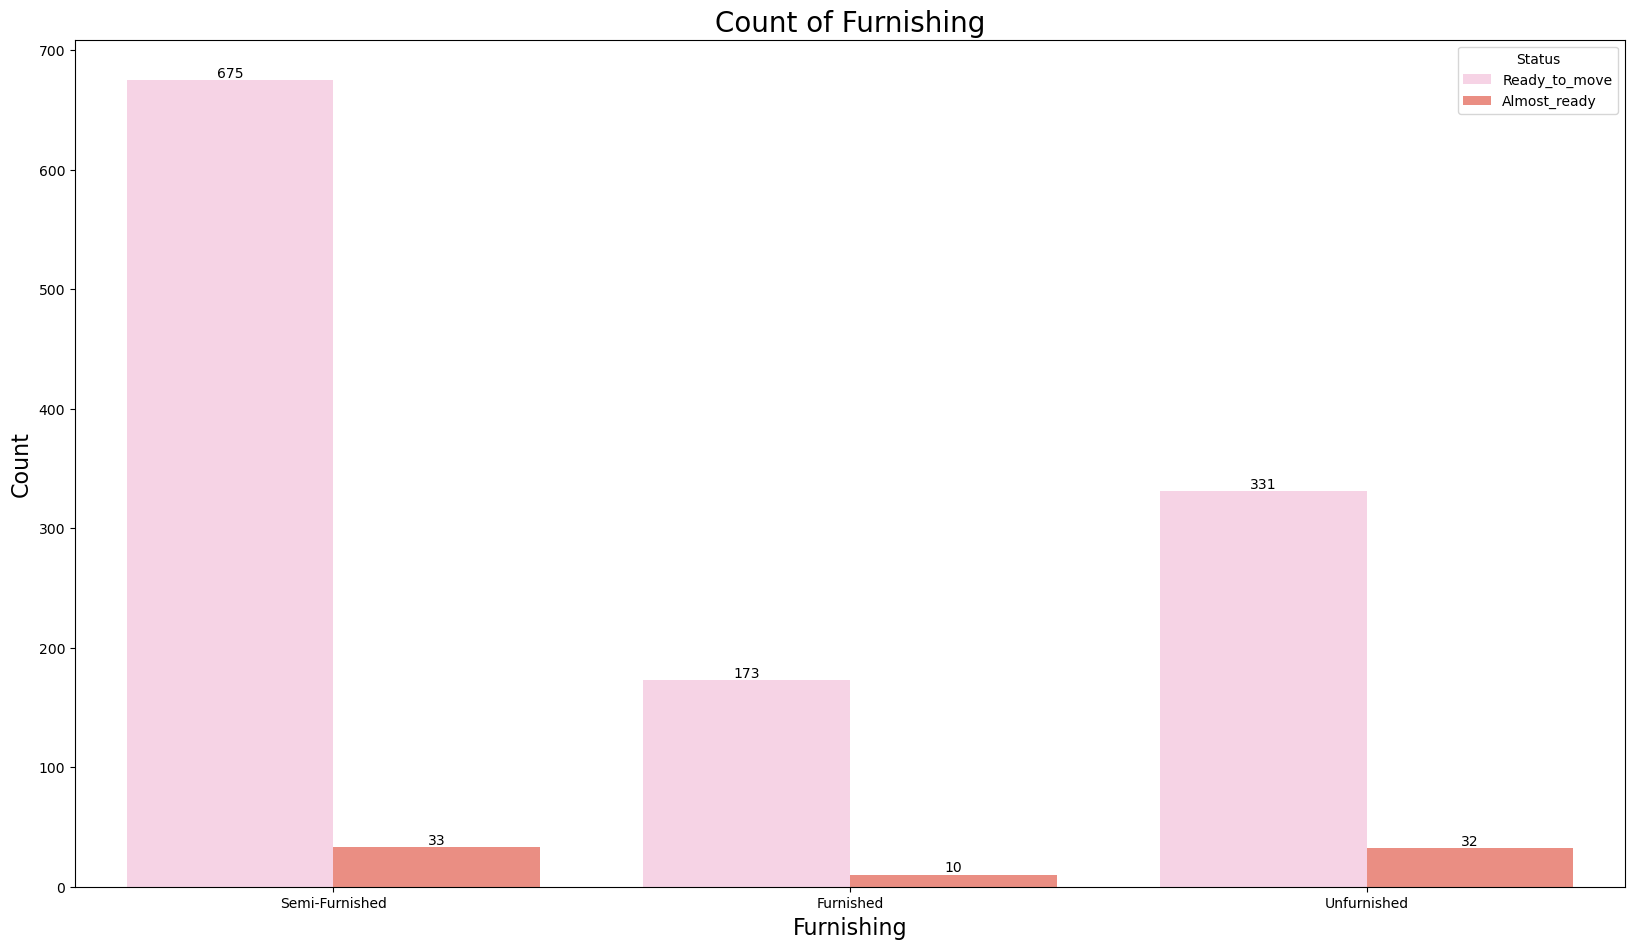

In [39]:
plt.figure(figsize = (20, 11))
ax = sns.countplot(x ='Furnishing', data = df, hue = "Status",palette= random.choice(palette_values))
ax.set_xlabel(xlabel = 'Furnishing', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
ax.set_title(label = 'Count of Furnishing', fontsize = 20)
for i in ax.containers:
    ax.bar_label(i)

#### Semi furnished is the most common house category which is being sold the most:
 - It is quiet a surprising fact that there are very less number of Furnished houses.
 - From the above observations, the company should focus a  little bit more and start inclining to increase their Furnished houses category.
 - Fully Furnished houses are the best to increase the profit margins and the company's revenue.

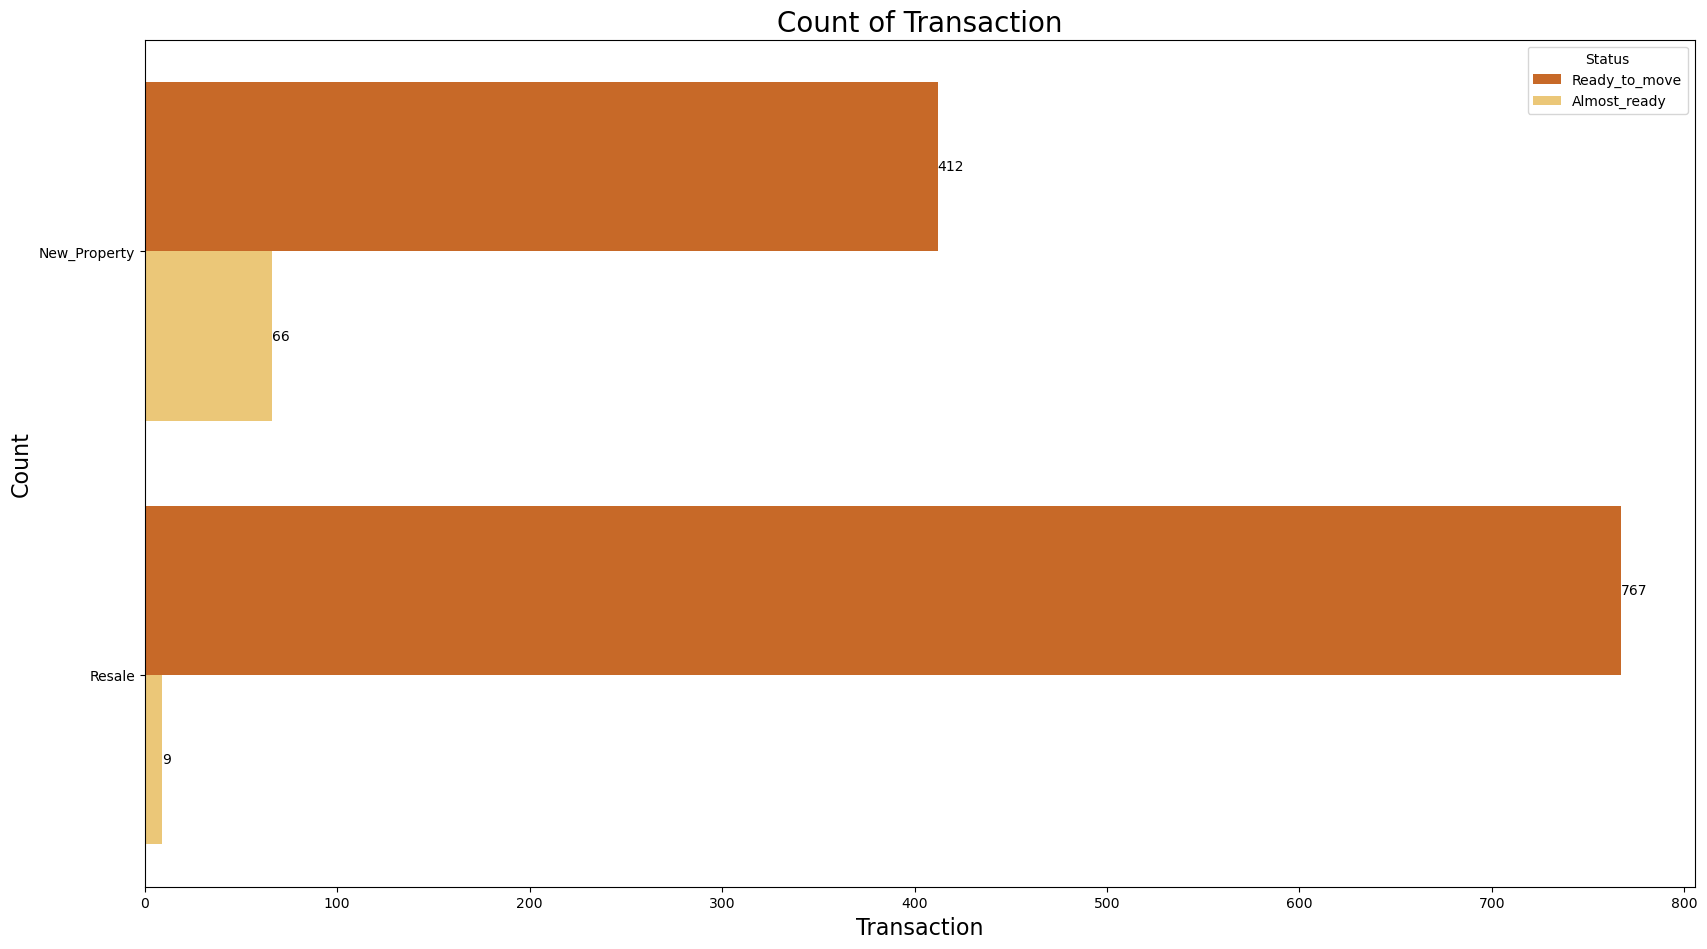

In [40]:
plt.figure(figsize = (20, 11))
ax = sns.countplot(y ='Transaction', data = df, hue = "Status",palette= random.choice(palette_values))
ax.set_xlabel(xlabel = 'Transaction', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
ax.set_title(label = 'Count of Transaction', fontsize = 20)
for i in ax.containers:
    ax.bar_label(i)

### From the above count plot we can easily interpret that:
 - There are more number of resale houses than new property which tell us that the company is a real estate broker company.
 - It is quiet a surprise but we can see that there are some houses in the resale which are no yet ready to move in, which means that they must be under some sort of construction or they might be getting refurbished.

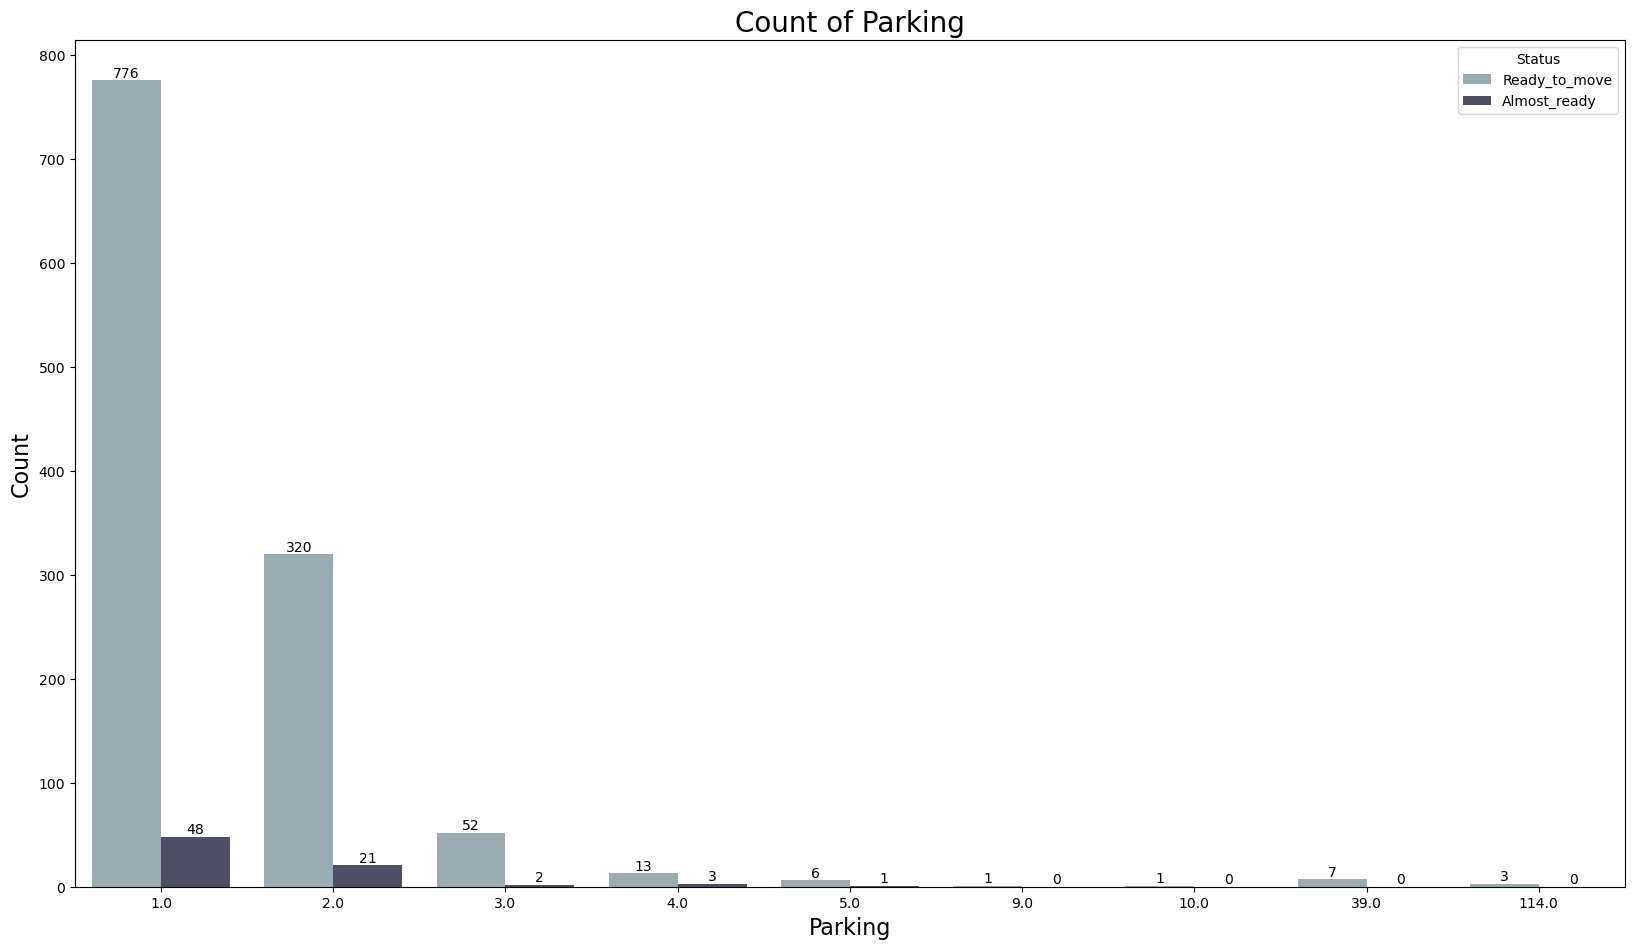

In [41]:
plt.figure(figsize = (20, 11))
ax = sns.countplot(x ='Parking', data = df, hue = "Status",palette= random.choice(palette_values))
ax.set_xlabel(xlabel = 'Parking', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
ax.set_title(label = 'Count of Parking', fontsize = 20)
for i in ax.containers:
    ax.bar_label(i)

### As clearly seen in the above count plot we can interpret that:
 - There is no house where there is no parking, which is a wonderful news for the company.
 - The second thing to notice is that the company is not very well established in the premium sector, because we can clearly observe that as the number of parking is increasing the number of houses decreases at a much more tremendous rate.

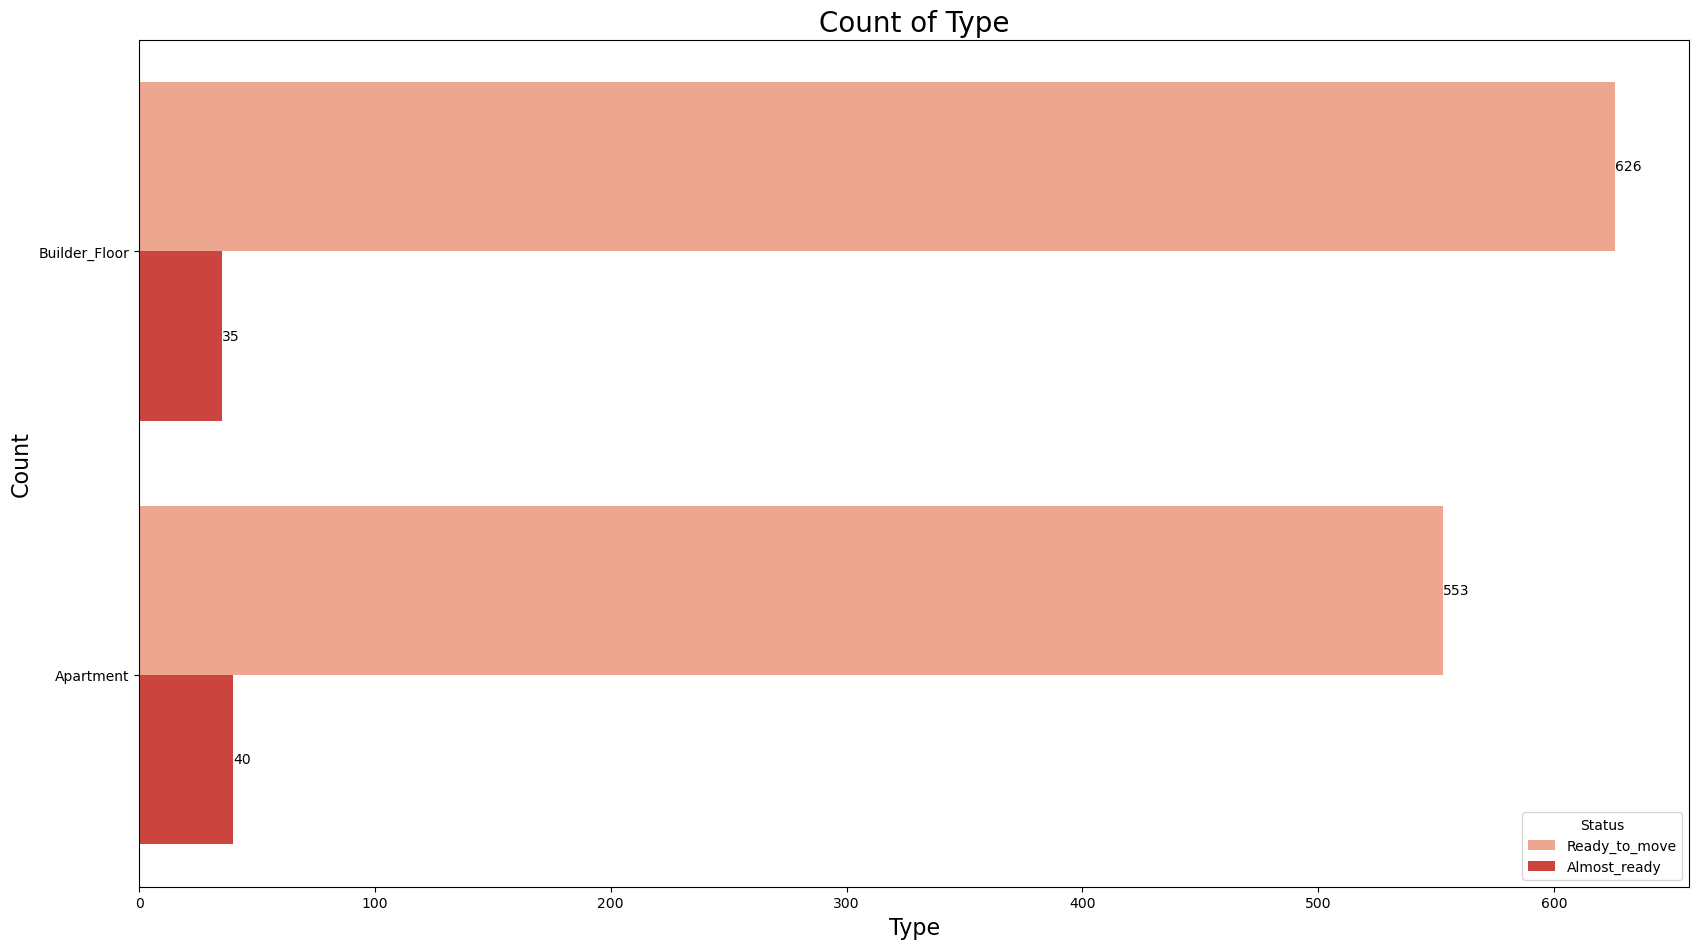

In [42]:
plt.figure(figsize = (20, 11))
ax = sns.countplot(y ='Type', data = df, hue = "Status",palette= random.choice(palette_values))
ax.set_xlabel(xlabel = 'Type', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
ax.set_title(label = 'Count of Type', fontsize = 20)
for i in ax.containers:
    ax.bar_label(i)

### From the above plot it's clearly visible that:
 - This is almost a well balanced variable which shows the number of Builder Floor and number of Apartments.
 - We can see that even though there are more number of Builder floor Houses, Apartments are a little bit ahead in the Almost Ready Apartment category.

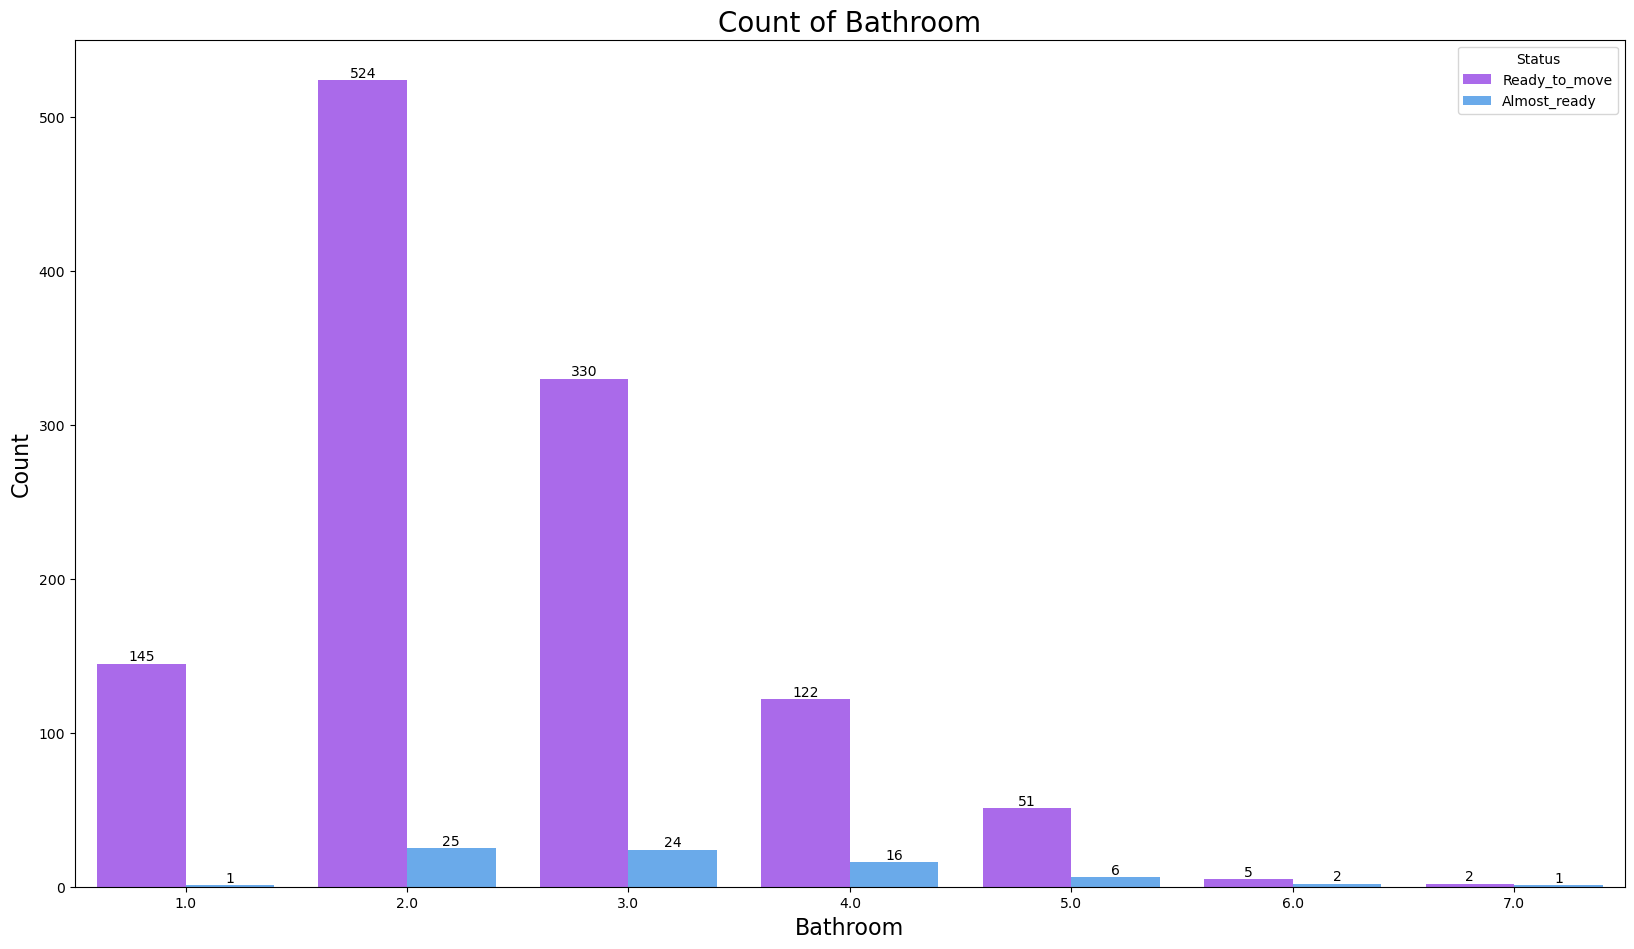

In [43]:
plt.figure(figsize = (20, 11))
ax = sns.countplot(x ='Bathroom', data = df, hue = "Status",palette= random.choice(palette_values))
ax.set_xlabel(xlabel = 'Bathroom', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
ax.set_title(label = 'Count of Bathroom', fontsize = 20)
for i in ax.containers:
    ax.bar_label(i)

### The above countplot is showing the number of Bathrooms along with their Status:
 - As seen in the above plot, it is clearly visible that most of the houses have 2 Bathrooms followed by 3 Bathrooms
 - We can also see that relatively 1 Bathroom category is having only a single house which is not yet ready to move in, which is very good sign that shows that the 1 Bathroom category doesn't require much work before selling the property

### Given below are some Self explanatory pie plot just to give an idea of how balanced the catagorical data is.

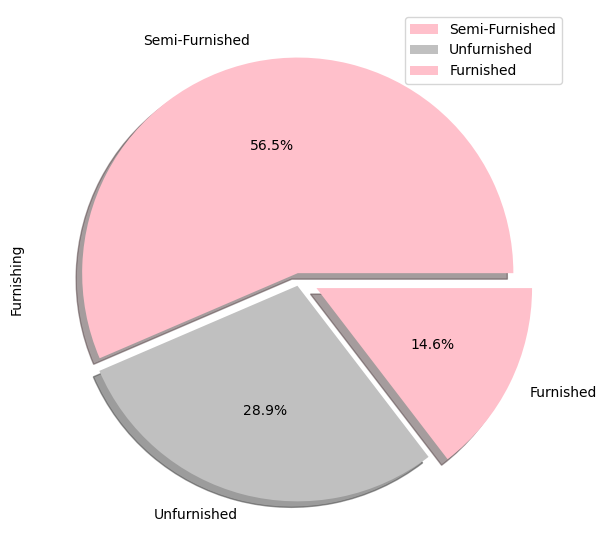

In [44]:
plt.figure(figsize= (7,7))
colors = ['pink', 'silver']
explode = (0.03, 0.03,0.09)
df['Furnishing'].value_counts().plot(kind ='pie', autopct='%1.1f%%', colors=colors, explode=explode, shadow=True)
plt.legend()

#### Most number of houses in the dataset are Semi-Furnished, having more that 50% of the entire houses category.

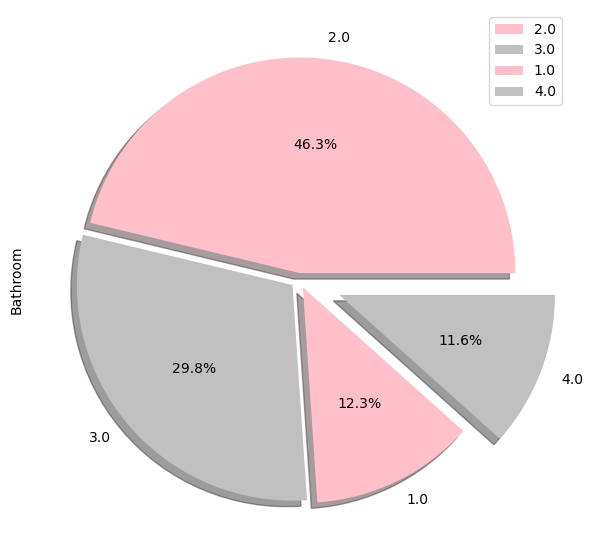

In [45]:
plt.figure(figsize= (7,7))
colors = ['pink', 'silver']
explode = (0.03,0.04,0.04,0.2)
df['Bathroom'].value_counts().head(4).plot(kind ='pie', autopct='%1.1f%%', colors=colors, explode=explode, shadow=True)
plt.legend()

#### As seen and observed from the above plot we can see that the most common number of bathrooms is 2 followed by 3 bathroom in a house.

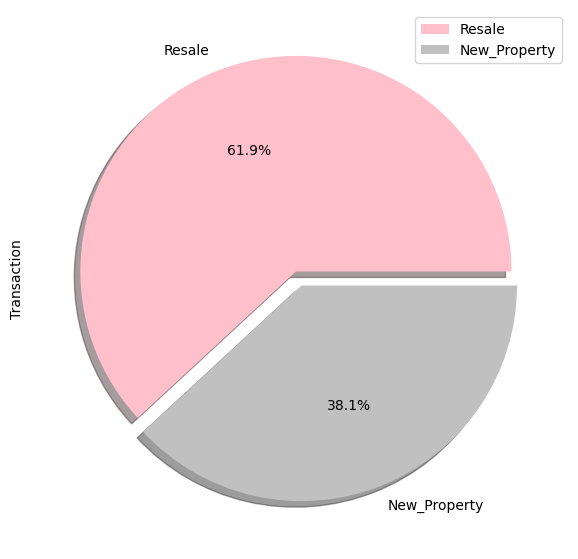

In [46]:
plt.figure(figsize= (7,7))
colors = ['pink', 'silver']
explode = (0.04, 0.03,)
df['Transaction'].value_counts().plot(kind ='pie', autopct='%1.1f%%', colors=colors, explode=explode, shadow=True)
plt.legend()

#### As clearly visible from the above plot we can see that there are more of Resale properties that New Property.

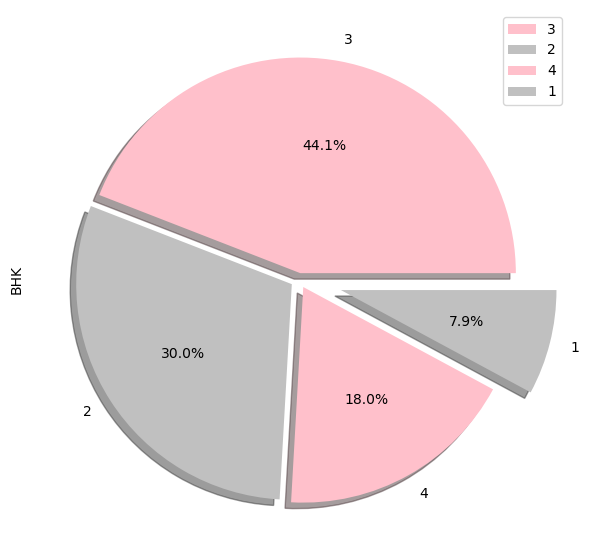

In [47]:
plt.figure(figsize= (7,7))
colors = ['pink', 'silver']
explode = (0.03,0.04,0.04,0.2)
df['BHK'].value_counts().head(4).plot(kind ='pie', autopct='%1.1f%%', colors=colors, explode=explode, shadow=True)
plt.legend()

#### These are the top 4 BHK categories, we can see that:
 - The most common category of BHK or Bedroom hall kitchen in the houses are 3, which means that the house is having 3 bedroom and a hall and a kitchen.
 - With 3BHK houses covering almost 45% of the entire houses for sales, 2BHK houses are right behind them with over 30% of houses in the company

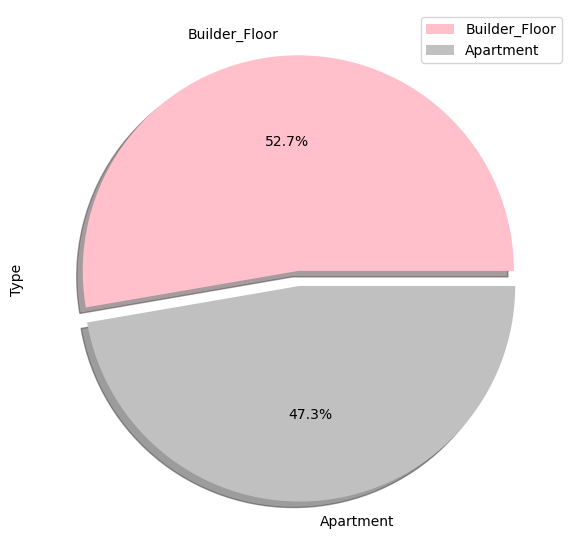

In [48]:
plt.figure(figsize= (7,7))
colors = ['pink', 'silver']
explode = (0.04, 0.03,)
df['Type'].value_counts().plot(kind ='pie', autopct='%1.1f%%', colors=colors, explode=explode, shadow=True)
plt.legend()

#### From the above plot we can see that more number of houses are on Builders floor rather apartment, which means that the company deals more in private properties.

C:\Users\daksh\AppData\Local\Temp\ipykernel_9936\1897361196.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



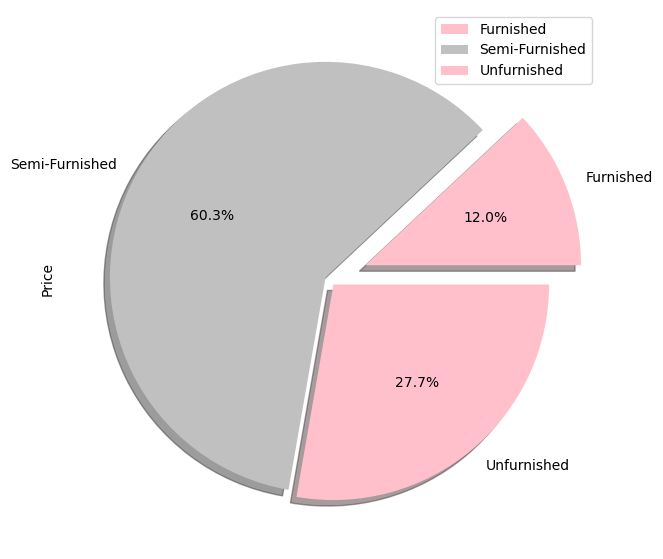

In [49]:
plt.figure(figsize= (7,7))
colors = ['pink', 'silver']
explode = (0.18, 0.02,0.03)
df.groupby(by = 'Furnishing').sum()['Price'].plot(kind ='pie', autopct='%1.1f%%', colors=colors, explode=explode, shadow=True)
plt.legend()

##### Insight !!
- In the above pie plot we can check that in terms of price which of the Furnishing Category is more valuable:
 - We can see that the Semi-Furnished is the most valuable category in terms of price as it will be generating the most revenue in the coming years
 - It is also a surprise that Furnished houses are bringing the lowest amount of revenue to the company

## Seaborn Relation and lmp plots

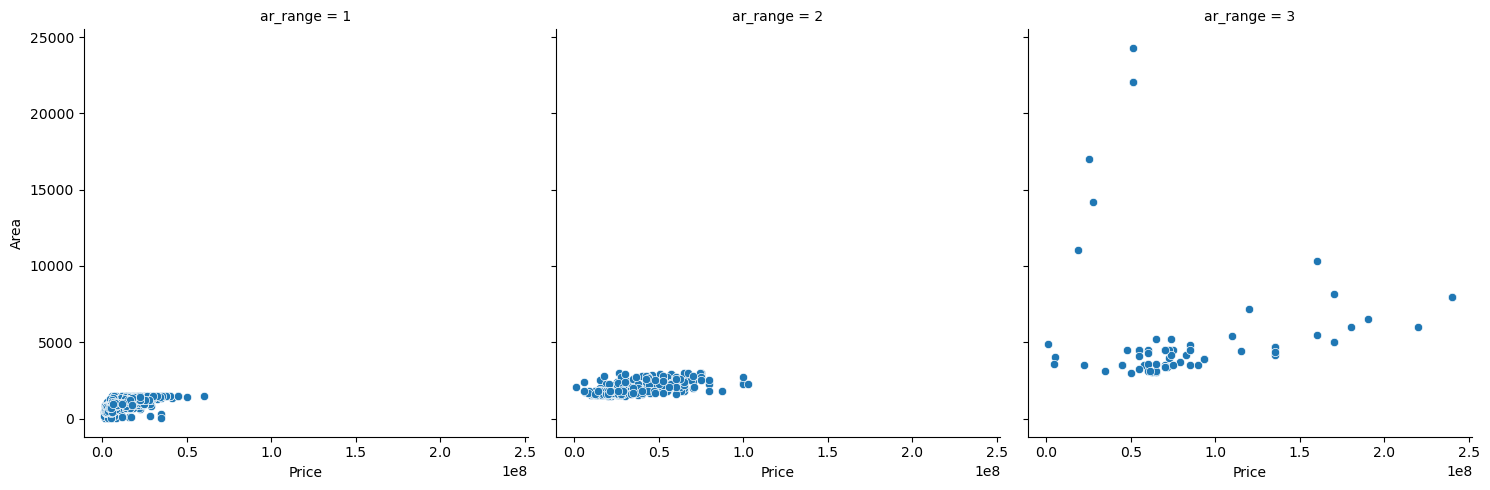

In [50]:
sns.relplot(data=df,x="Price", y="Area",col="ar_range")

##### Above is a wonderful plot which is showing the relation ship between Price and Area categorized by Area Range:
 - We can clearly see that there is a positive relationship between Price and area because as the ar_range is increasing the prices are also spiking
 - One more thing that we can notice in the plot is that in ar_range 3 in some cases if the area is very big the prices are still very less compared to the other ar_range 3 houses

<Axes: xlabel='Price'>

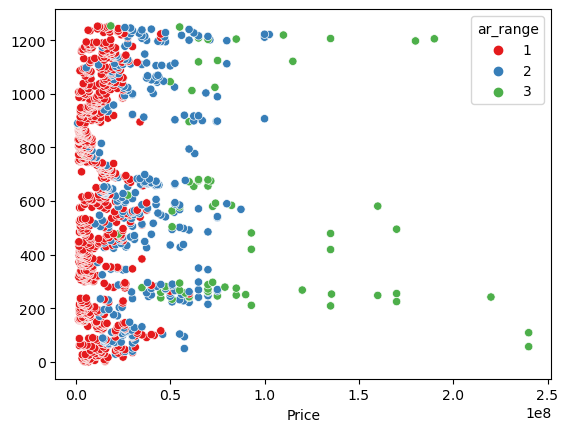

In [51]:
sns.scatterplot(x='Price', y=np.arange(df.shape[0]), data=df,hue="ar_range", palette="Set1")

##### In the above scatterplot we can see the distribution of Price by their Area Range:
 - Mostly, the values are evenly spread out in the range of 0 to 50000000.
 - Mostly all the values whoose price is less falls under the ar_range 1 category.

### Study of relationship between "Price" with other variables.
#### After every plot i have added the same plot using plotly, making it interactive so that you can hover over the data for better understanding the analysis.

### Everyone after seeing my work :)
![](https://media.tenor.com/TD62aZcTr7wAAAAC/mr-bean-realization.gif)

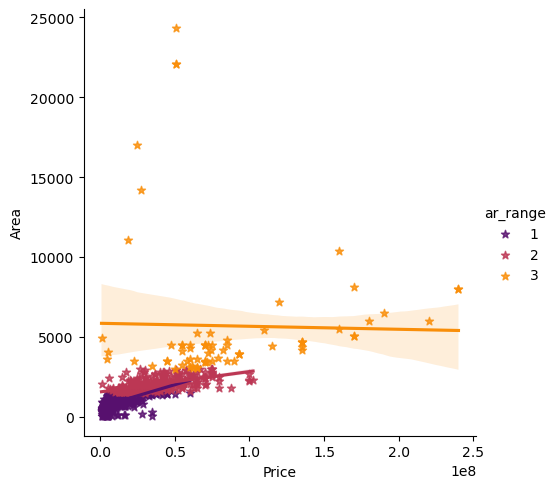

In [52]:
sns.lmplot(x='Price', y='Area', data=df, markers="*", hue="ar_range", palette="inferno")

##### From the above scatter plot it is quiet obvious to figure that if the Area increases the Price also increases.

In [53]:
fig = px.scatter(df, x="Price", y="Area", color="Status", title='')
fig.show()

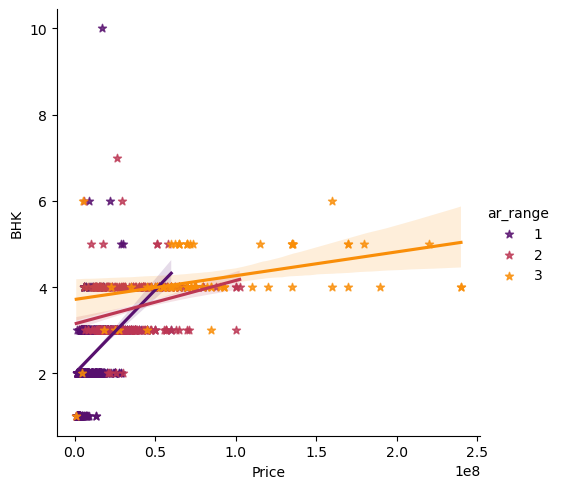

In [54]:
sns.lmplot(x='Price', y='BHK', data=df, markers="*", hue="ar_range", palette="inferno")

##### As such there is no concrete relationship between Price and BHK.

In [55]:
fig = px.scatter(df, x="Price", y="BHK", color="ar_range", title='')
fig.show()

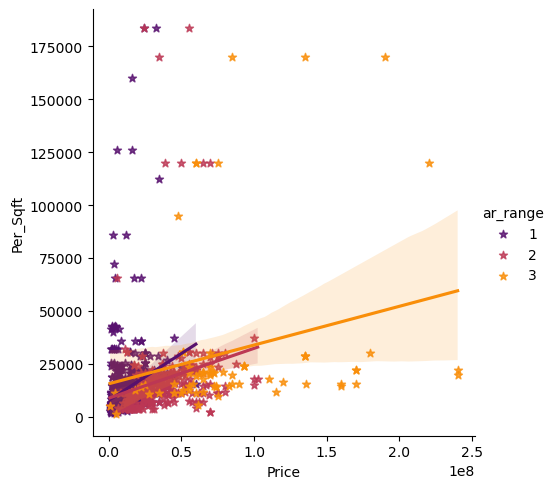

In [56]:
sns.lmplot(x='Price', y='Per_Sqft', data=df, markers="*", hue="ar_range", palette="inferno")

##### As expected, as the Per Square Feet of the house increases the price of house i.e. the Price also increases.

In [57]:
fig = px.scatter(df, x="Price", y="Per_Sqft", color="ar_range", title='')
fig.show()

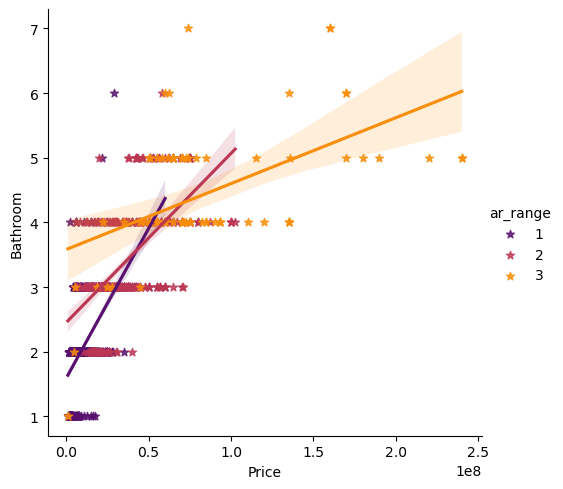

In [58]:
sns.lmplot(x='Price', y='Bathroom', data=df, markers="*", hue="ar_range", palette="inferno")

##### As such there is no concrete relationship between Price and number of Bathroom .

In [59]:
fig = px.scatter(df, x="Price", y="Bathroom", color="ar_range", title='')
fig.show()

##### In depth analysis if Price and other variables using different plots 
![](https://media.tenor.com/bniSP6WD8L4AAAAC/fail-whooo.gif)
##### It is self explanatory so i won't be explaining the plots, also added the same plots using plotly to make it interactive and more understandable.
![](https://media.tenor.com/muSP5dgoIhsAAAAC/joeyfriends-friends.gif)

<Axes: xlabel='Furnishing', ylabel='Price'>

C:\Users\daksh\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



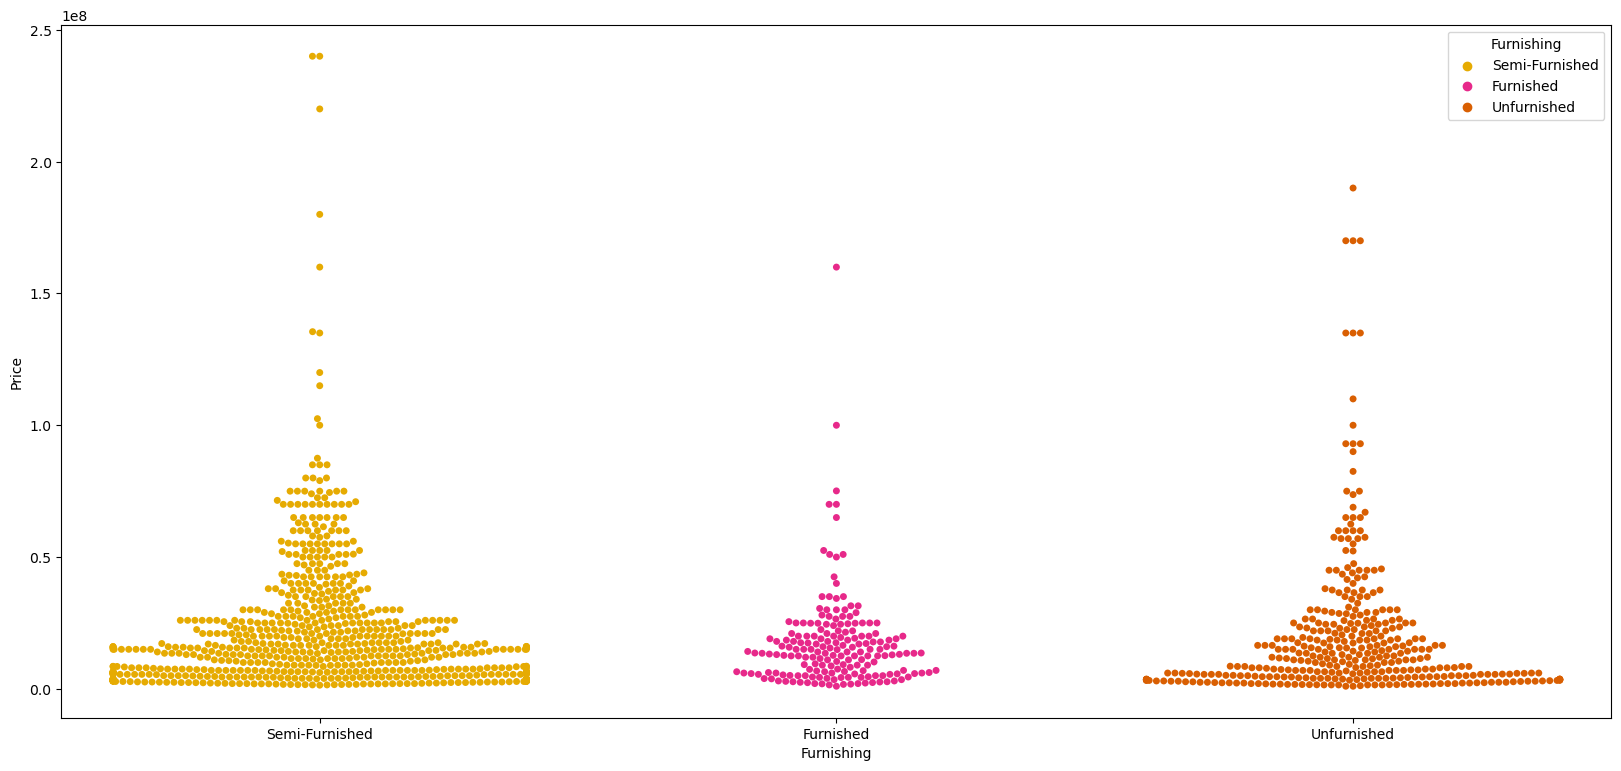

In [60]:
plt.figure(figsize=(20, 9))
sns.swarmplot(x="Furnishing", y="Price", data=df, hue='Furnishing', palette="Dark2_r")

In [61]:
px.strip(df, x='Furnishing', y='Price', stripmode='overlay',height=600,color="Status")

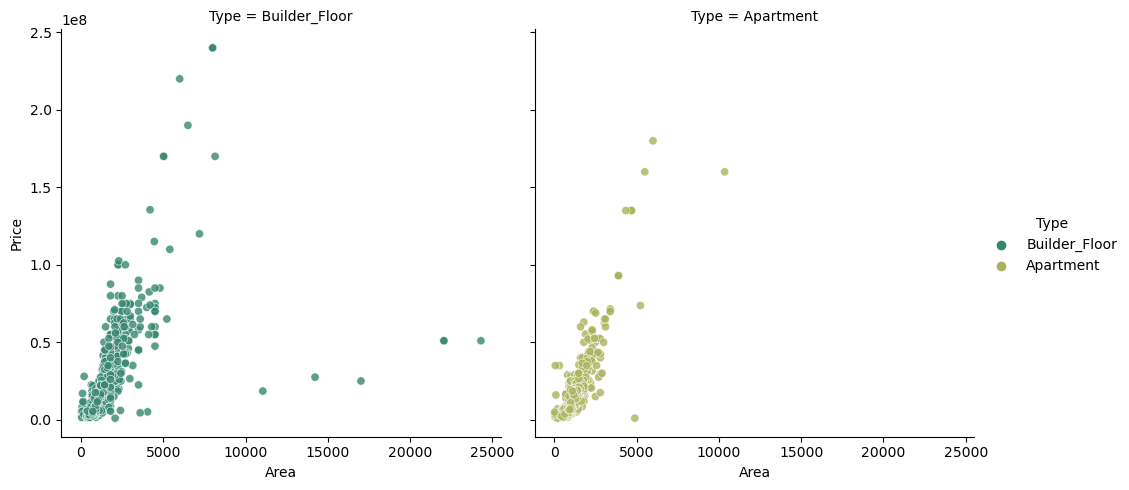

In [62]:
ax = sns.relplot(y="Price" , x="Area" ,data=df, alpha=0.8, col="Type", hue="Type", palette= random.choice(palette_values))
plt.show()

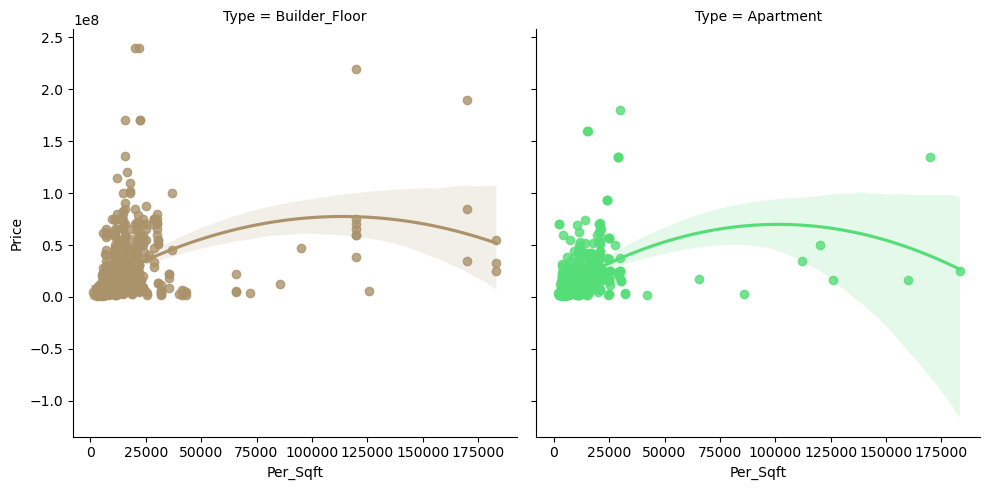

In [63]:
ax = sns.lmplot(x="Per_Sqft" , y="Price", data=df, col="Type", order= 2, hue="Type", palette="terrain_r")

##### The shaded area shows the prediction of Prices of home based on average Per Square Feet.
##### From the above plot we can see that the price prediction range of houses which are built on Builders Floor are is much less spread out as compared to the Apartment.

![](https://media.tenor.com/zcs5gYi4sSMAAAAC/mindblown-omg.gif)

Text(0.5, 1.0, 'House Prices by Status')

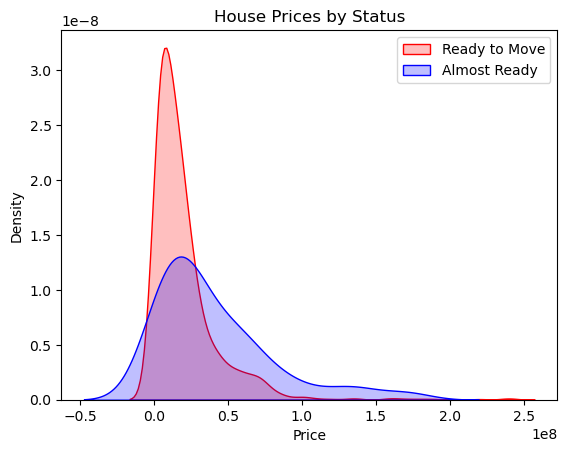

In [64]:

ax = sns.kdeplot(df['Price'][df['Status']=='Ready_to_move'],color="Red" , fill = True)
ax = sns.kdeplot(df['Price'][df['Status']=='Almost_ready'], color="Blue", fill = True)
ax.legend(["Ready to Move","Almost Ready"])
ax.set_title('House Prices by Status')

##### Price is high when the Status is "Ready to move in"

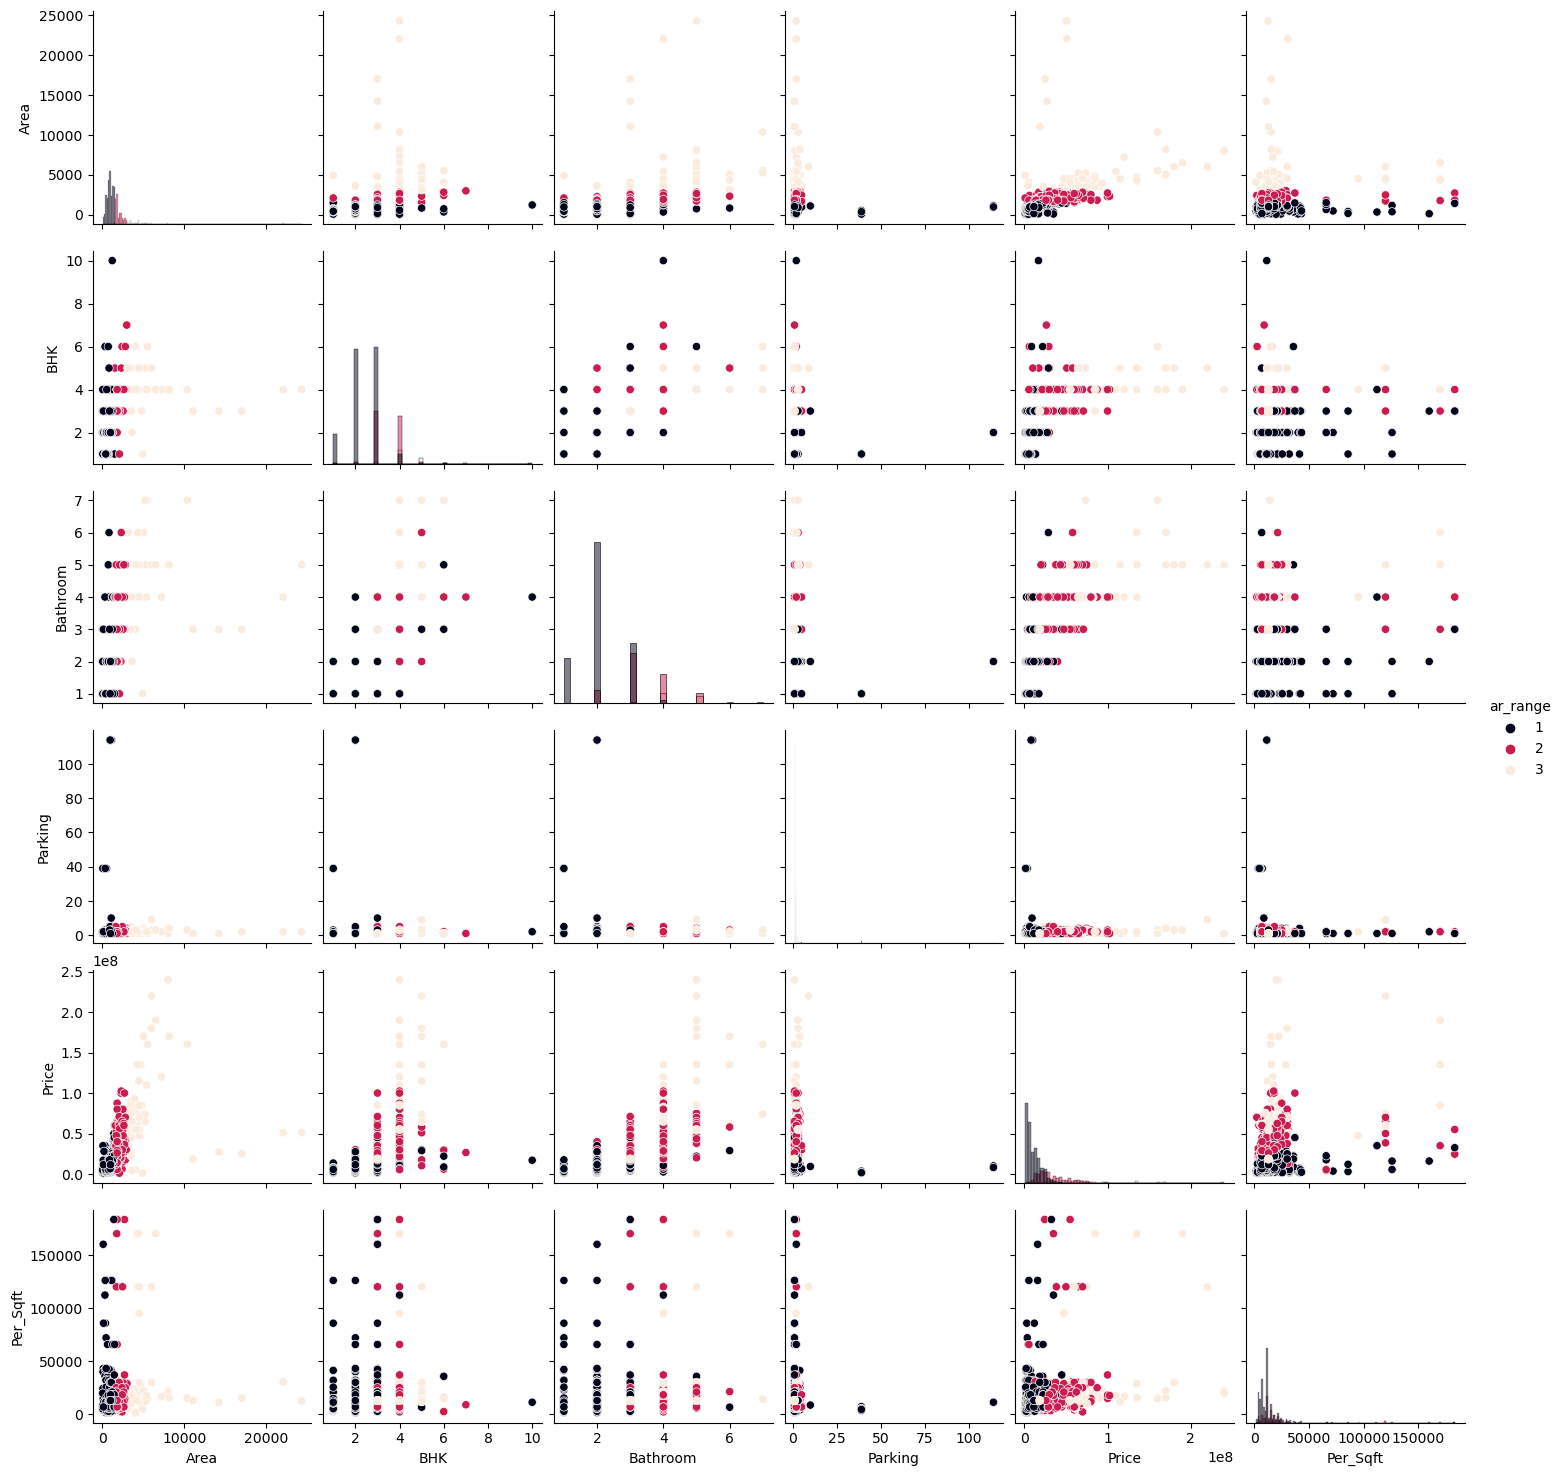

In [65]:
sns.pairplot(df,diag_kind="hist", hue="ar_range", palette="rocket")

Text(0.5, 1.0, 'Area wise Distribution in Locality')

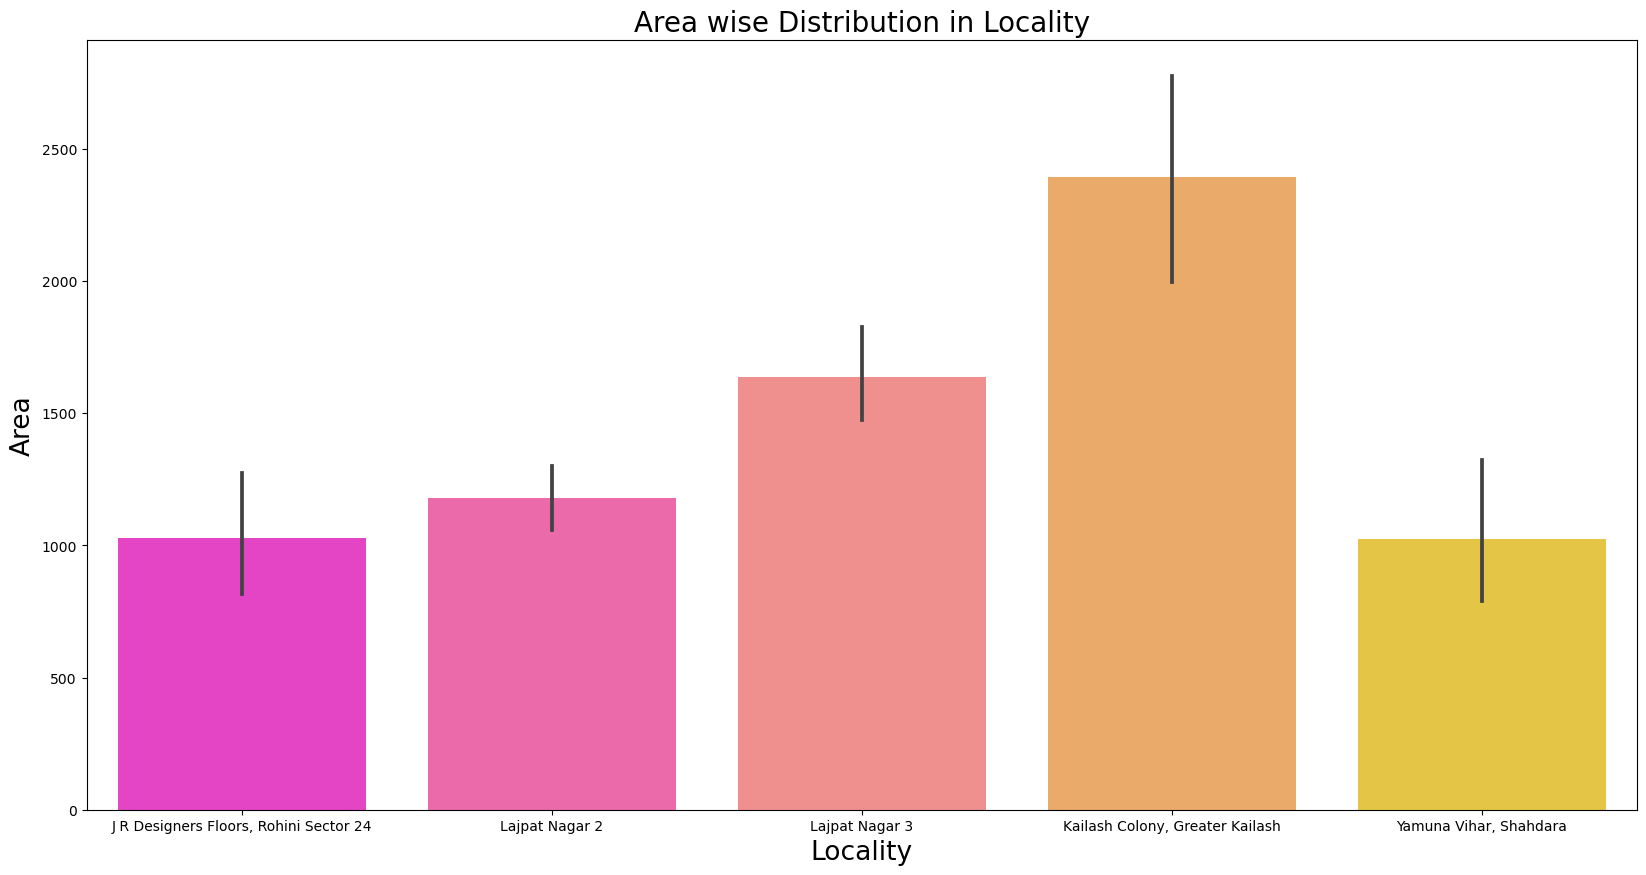

In [66]:
top_loc = df['Locality'].value_counts().head(5)
top_loc_name = top_loc.index
df_loc = df.loc[df['Locality'].isin(top_loc_name)& df['Area']]
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'Locality' , y = 'Area' , data = df_loc, palette='spring')
ax.set_xlabel(xlabel = 'Locality', fontsize = 19)
ax.set_ylabel(ylabel = 'Area', fontsize = 19)
plt.title('Area wise Distribution in Locality', fontsize = 20)

#### These are the top 5 Locality which have the highest area:
 - We can see that the Locality with the highest area is "Kailash Colony, Greater Kailash" this is a great news for the company because houses in South Delhi have hiked prices.
 - Secondly, we can see that after "Kailash Colony" "Lajpat Nagar" is aquiring the highest area and it has more combined area than "Kailash Colony"

Text(0.5, 1.0, 'Transaction wise Price')

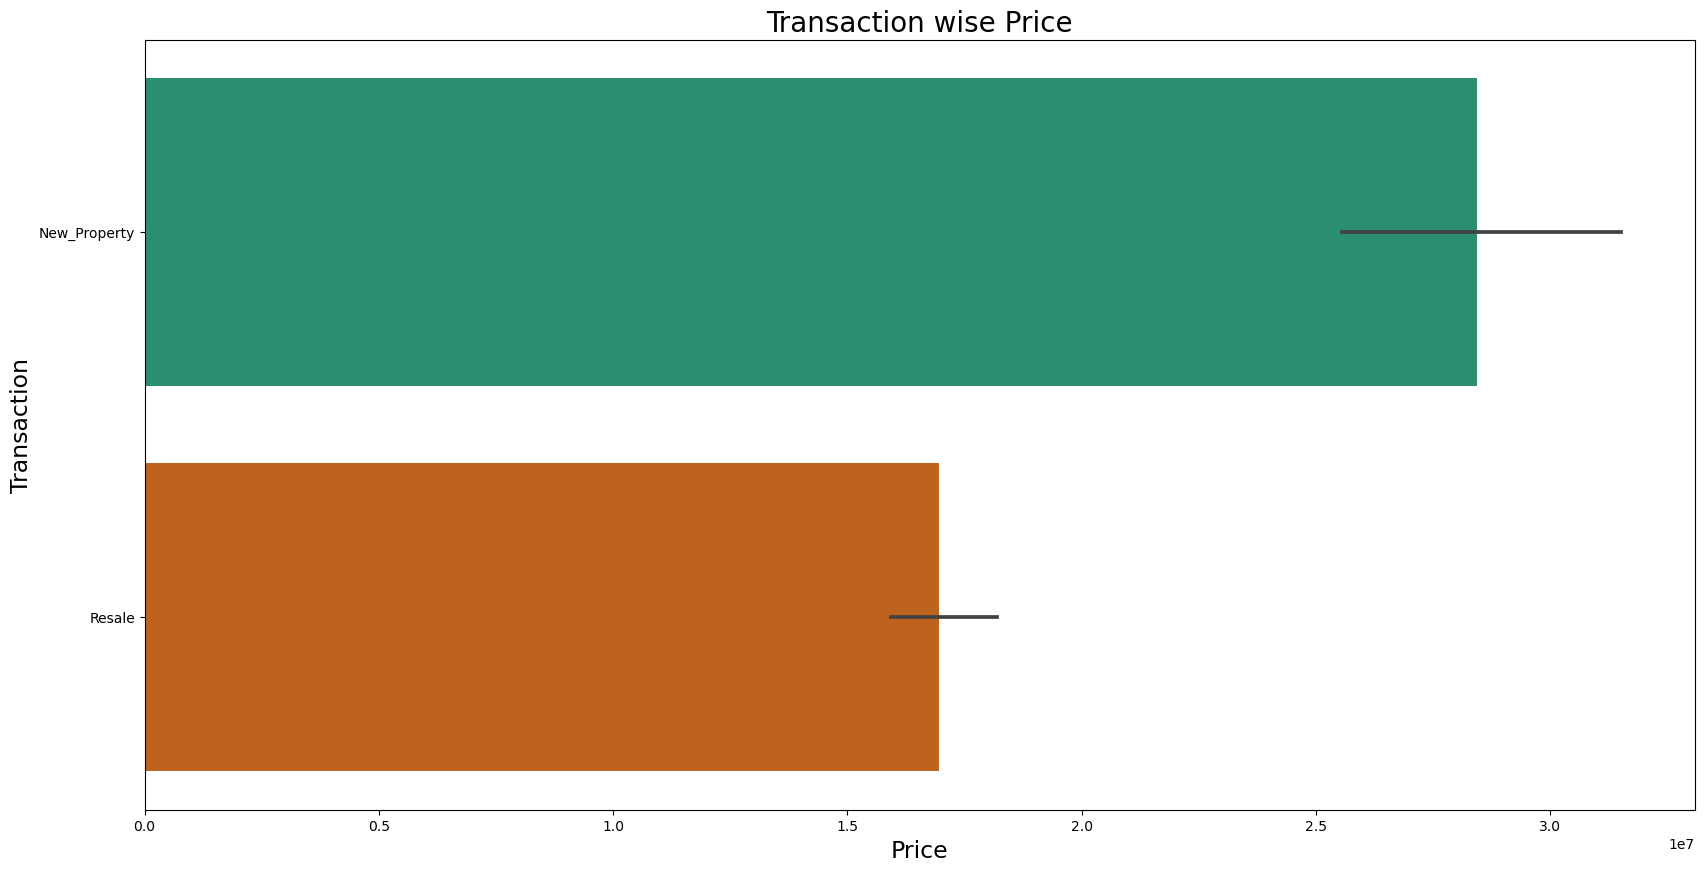

In [67]:
plt.figure(figsize= (20,10))
ax = sns.barplot(x ='Price', y = 'Transaction', orient='h', data=df, palette = 'Dark2')
ax.set_xlabel(xlabel = 'Price', fontsize = 17)
ax.set_ylabel(ylabel = 'Transaction', fontsize = 17)
ax.set_title(label = 'Transaction wise Price', fontsize = 20)

##### New property is more costlier than the houses which are for resale.

Text(0.5, 1.0, 'Status wise Price')

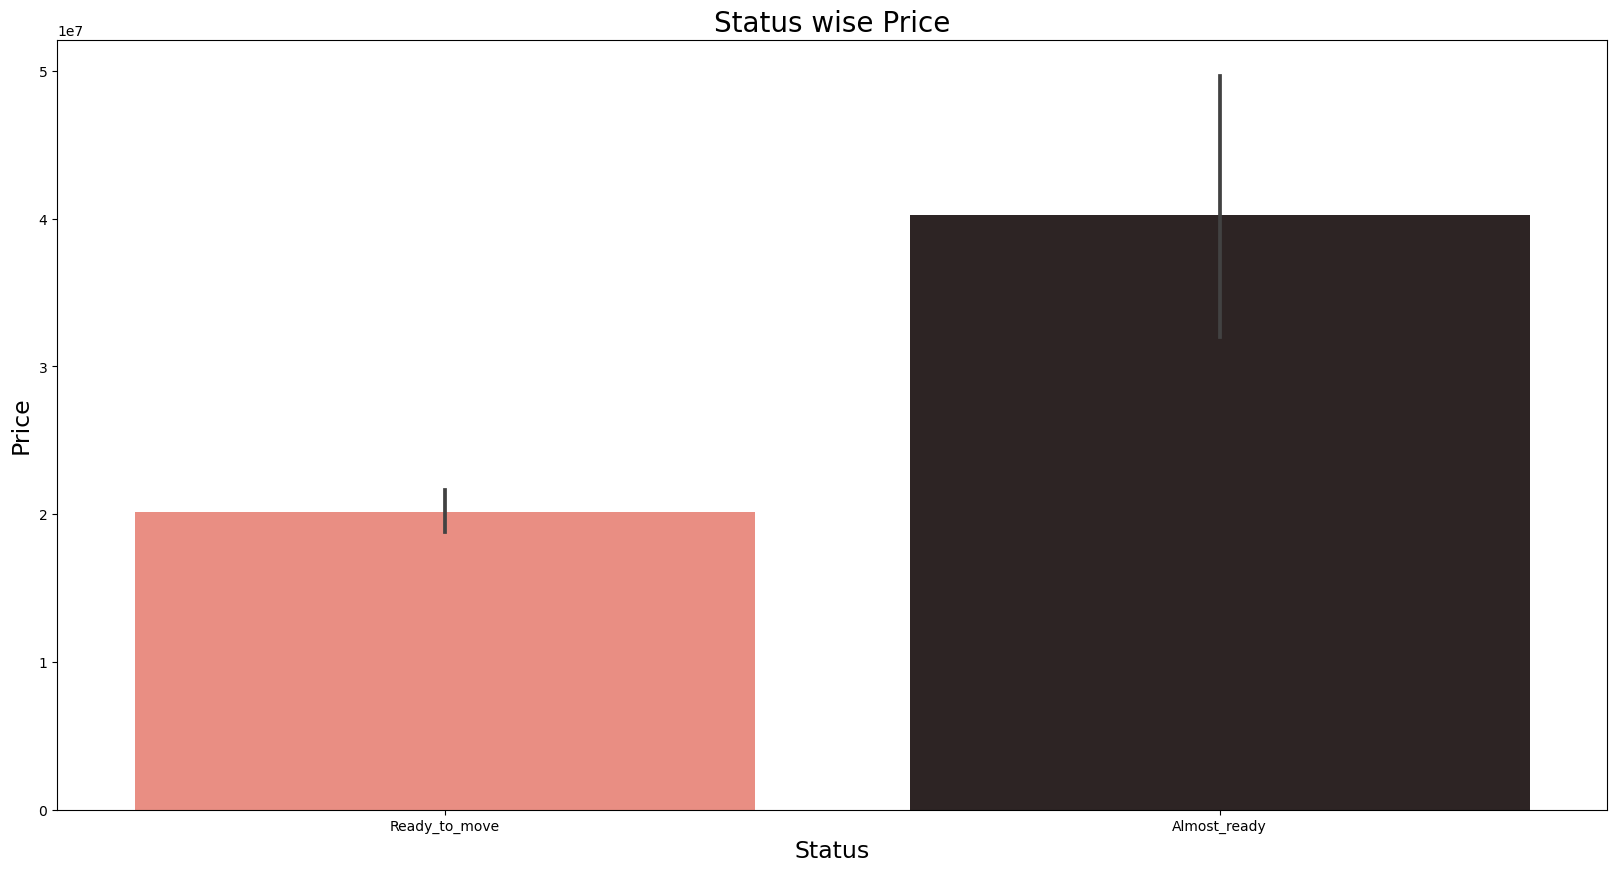

In [68]:
plt.figure(figsize= (20,10))
ax = sns.barplot(x ='Status', y = 'Price', data=df, palette = 'dark:salmon_r')
ax.set_xlabel(xlabel = 'Status', fontsize = 17)
ax.set_ylabel(ylabel = 'Price', fontsize = 17)
ax.set_title(label = 'Status wise Price', fontsize = 20) 

#### It is a great great surprise that the Prices of Almost Ready houses far exceedes the prices for Ready to move in houses
 - This is quiet surprising because when it comes to count plot of the Status showed that then number of "Ready to move in" houses are 1178 and the number of "Almost ready" houses are 75, but there a huge diffence between the prices of both.
 - The reason for this can be because "Almost Ready" houses might be having a very high price compared to the "Ready To Move In" houses.

Text(0.5, 1.0, 'ar_range wise Price')

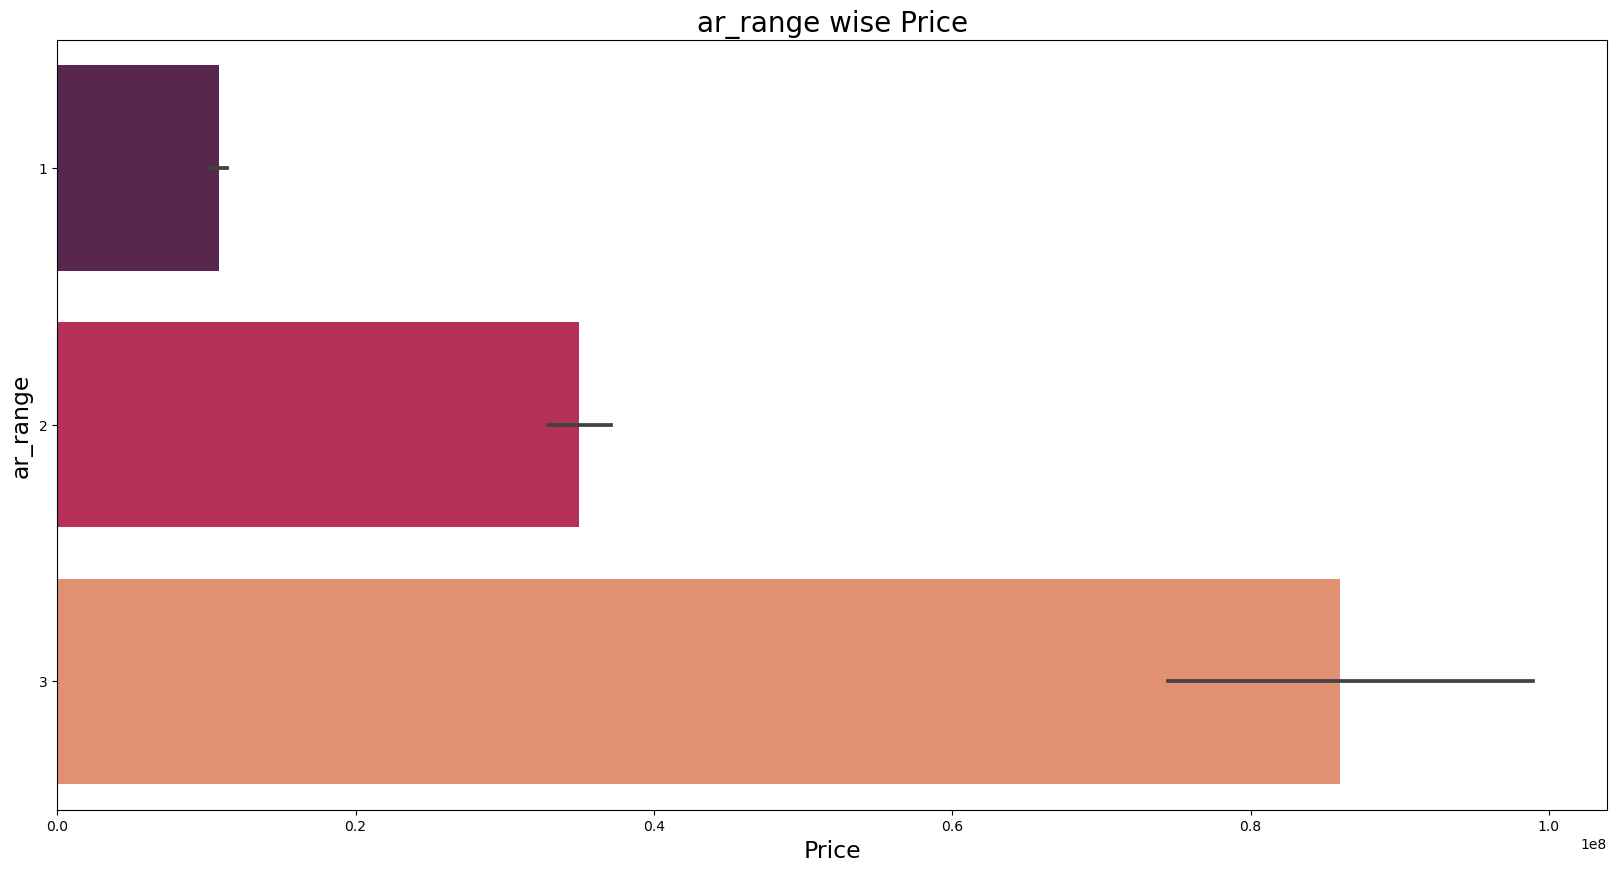

In [69]:
plt.figure(figsize= (20,10))
ax = sns.barplot(x ='Price', y = 'ar_range', orient='h', data=df, palette = 'rocket')
ax.set_xlabel(xlabel = 'Price', fontsize = 17)
ax.set_ylabel(ylabel = 'ar_range', fontsize = 17)
ax.set_title(label = 'ar_range wise Price', fontsize = 20) 

###### As mentioned above Area Range 3 will be having Highest pricing houses because they are the ones with the largest Area.

Text(0.5, 1.0, 'Furnishing wise Price')

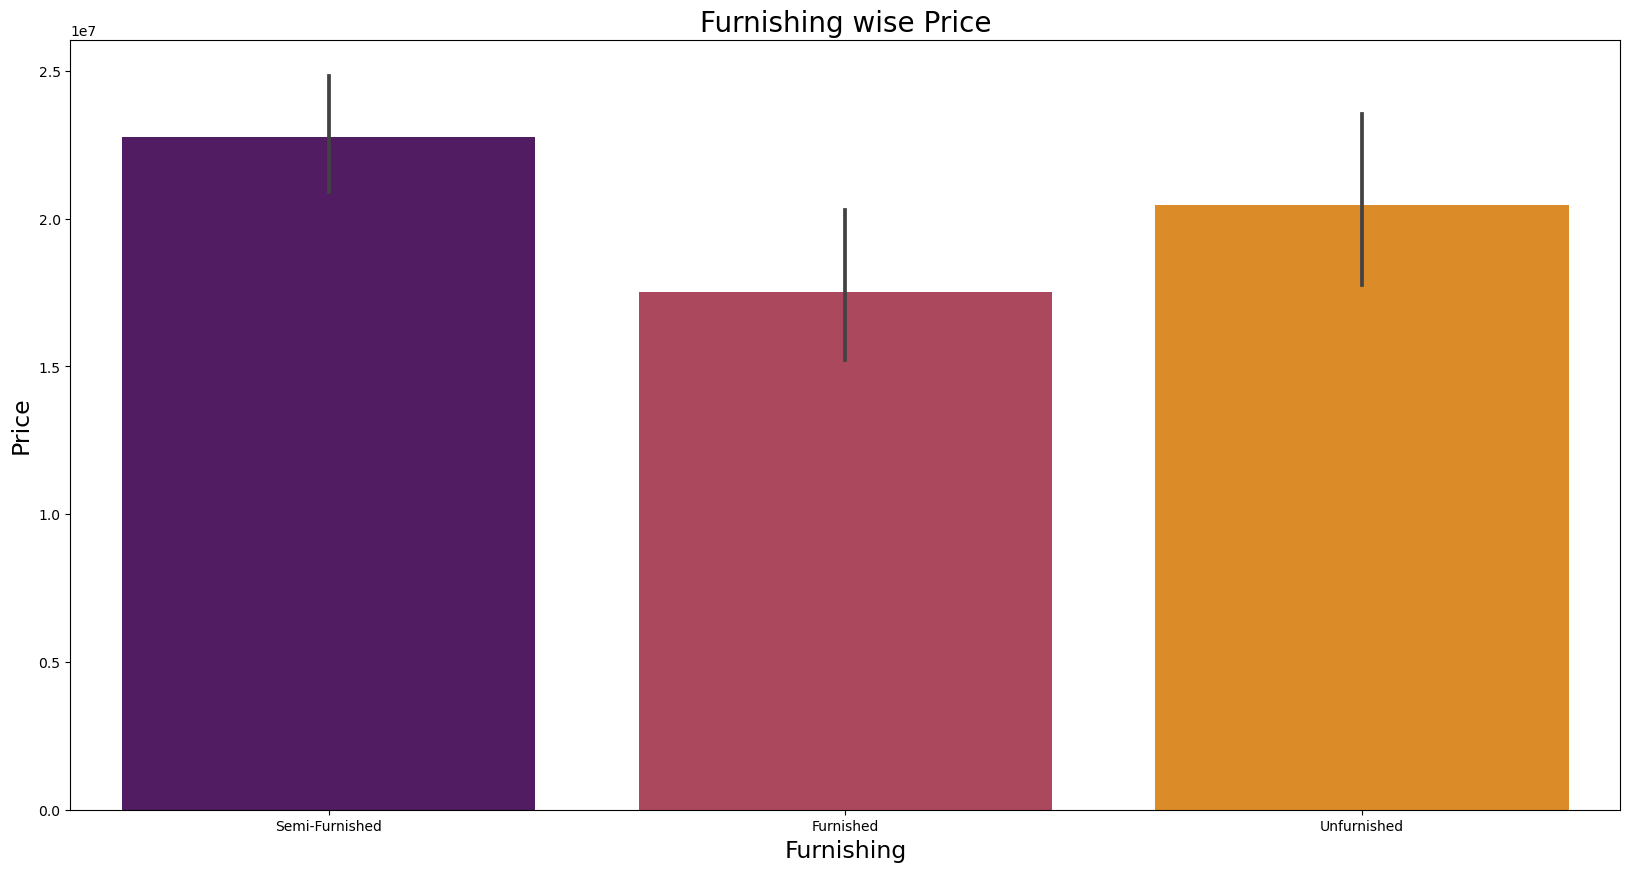

In [70]:
plt.figure(figsize= (20,10))
ax = sns.barplot(x ='Furnishing', y = 'Price', data=df, palette = 'inferno')
ax.set_xlabel(xlabel = 'Furnishing', fontsize = 17)
ax.set_ylabel(ylabel = 'Price', fontsize = 17)
ax.set_title(label = 'Furnishing wise Price', fontsize = 20) 

#### Surprising Insight !!
- In the above Bar plot we can check that in terms of price which of the Furnishing Category is more valuable
 - We can see that the Semi-Furnished is the most valuable category in terms of price as it will be generating the most revenue in the coming years
 - It is also a surprise that Furnished houses are bringing the lowest amount of revenue to the company

Text(0.5, 1.0, 'Type wise Price')

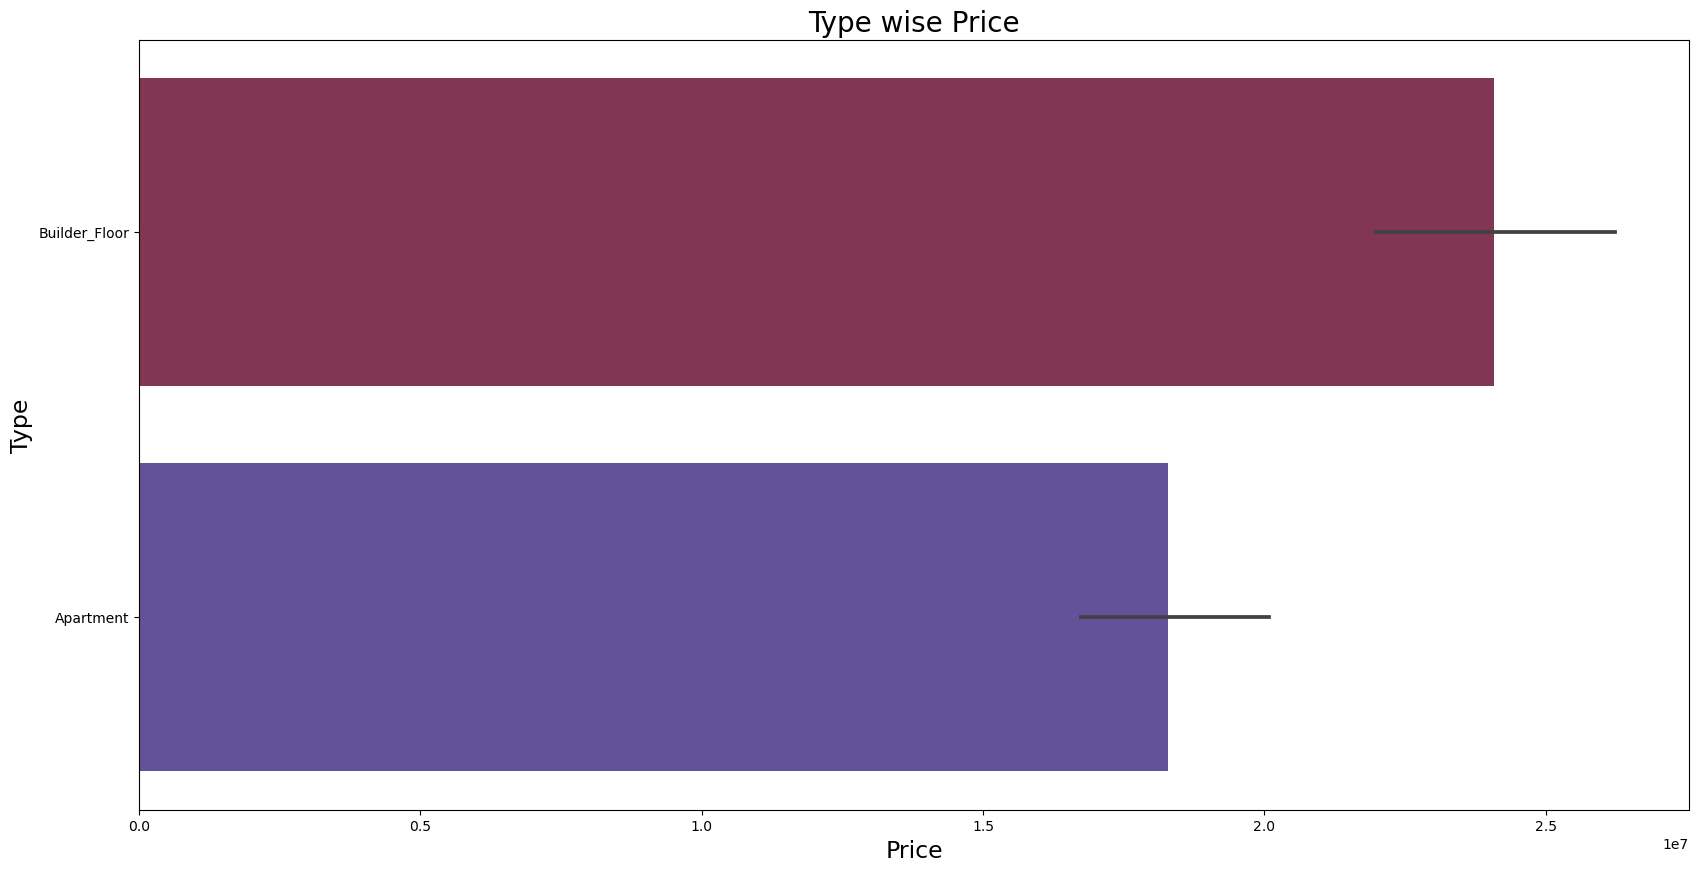

In [71]:
plt.figure(figsize= (20,10))
ax = sns.barplot(x ='Price', y = 'Type', orient='h', data=df, palette = 'twilight_r')
ax.set_xlabel(xlabel = 'Price', fontsize = 17)
ax.set_ylabel(ylabel = 'Type', fontsize = 17)
ax.set_title(label = 'Type wise Price', fontsize = 20) 

##### Houses which are built on Builder_Floor are holding more value than the Apartments.

### Coming Voilin Plots, Box Plots, Boxen Plots
#### It is self explanatory so i won't be explaining all of the plots, also added the same plots using plotly to make it interactive and more understandable.

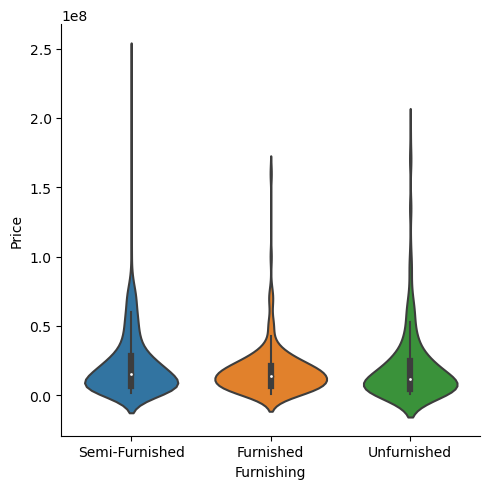

In [72]:
sns.catplot(y="Price", x="Furnishing", data=df, kind="violin", alpha=0.8, s=20, height=5)

##### Insight !!
- Semi-Furnished houses have a very high cost as could be seen from the above.
- This means that people are paying a lot for Semi-Furnished Houses.
- Hence, The company could take steps to increase the prices for the other categories in Furnishing.

In [73]:
ax=go.Figure(data=go.Violin(x=df['Furnishing'], y=df['Price'],box_visible=True, line_color='black',meanline_visible=True, fillcolor='lightseagreen',))
ax.show()

Text(0.5, 1.0, 'Area wise Distribution in Locality')

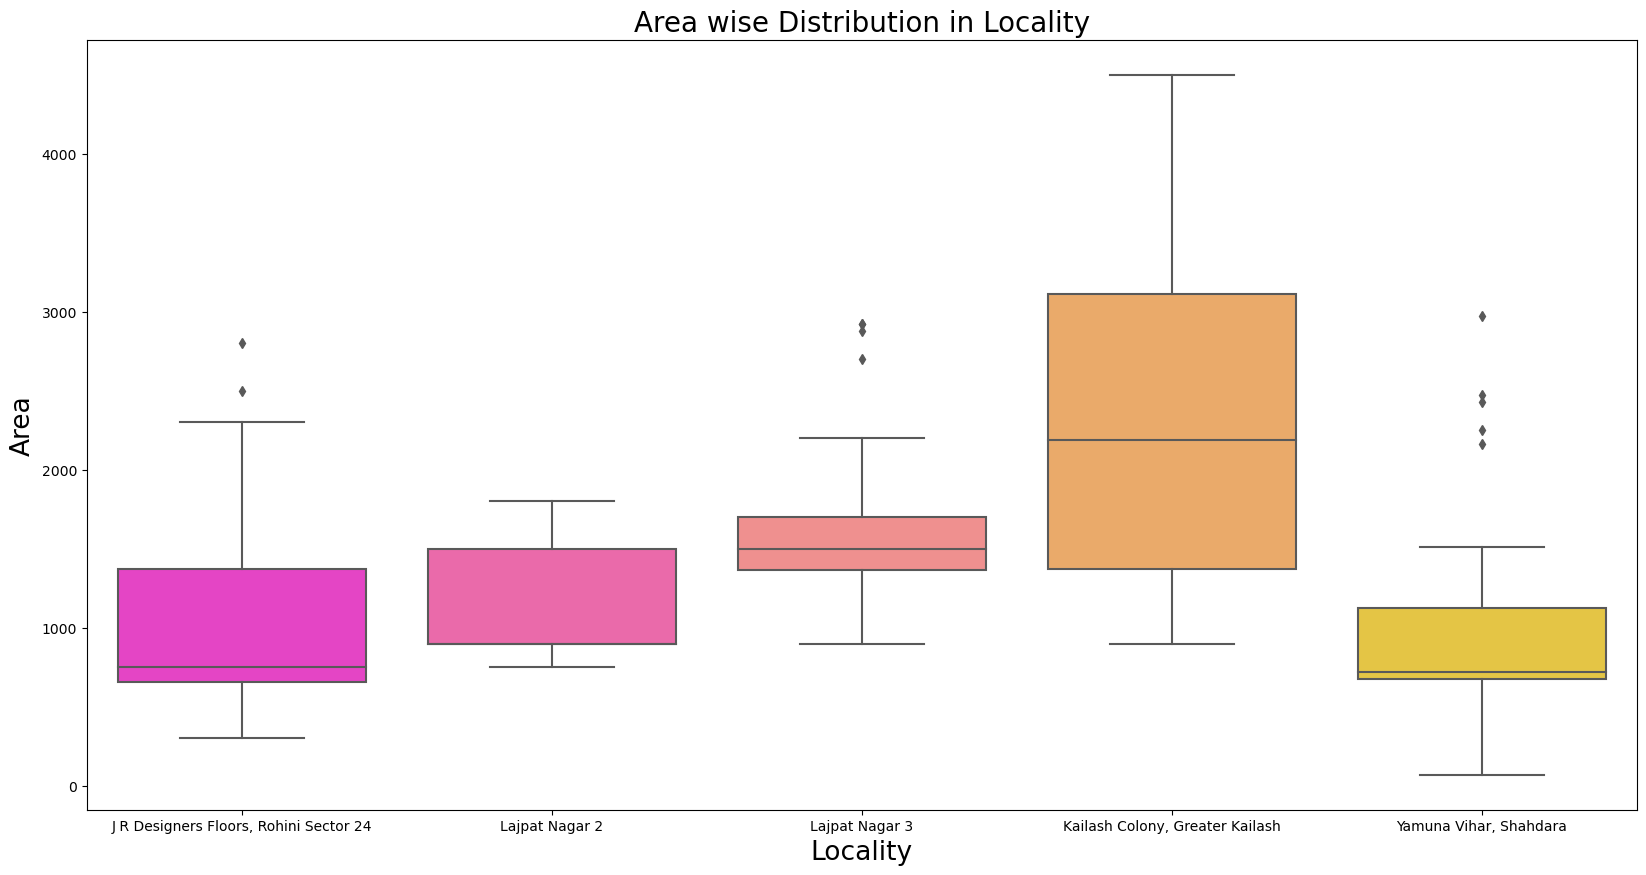

In [74]:
top_loc = df['Locality'].value_counts().head(5)
top_loc_name = top_loc.index
df_loc = df.loc[df['Locality'].isin(top_loc_name)& df['Area']]
plt.figure(figsize = (20,10))
ax = sns.boxplot(x = 'Locality' , y = 'Area' , data = df_loc, palette='spring')
ax.set_xlabel(xlabel = 'Locality', fontsize = 19)
ax.set_ylabel(ylabel = 'Area', fontsize = 19)
plt.title('Area wise Distribution in Locality', fontsize = 20)

##### It could easily be seen from the box plots that the "Kailash Colony" aquires the highest are of all the localities

Text(0.5, 1.0, 'Furnishing wise Price')

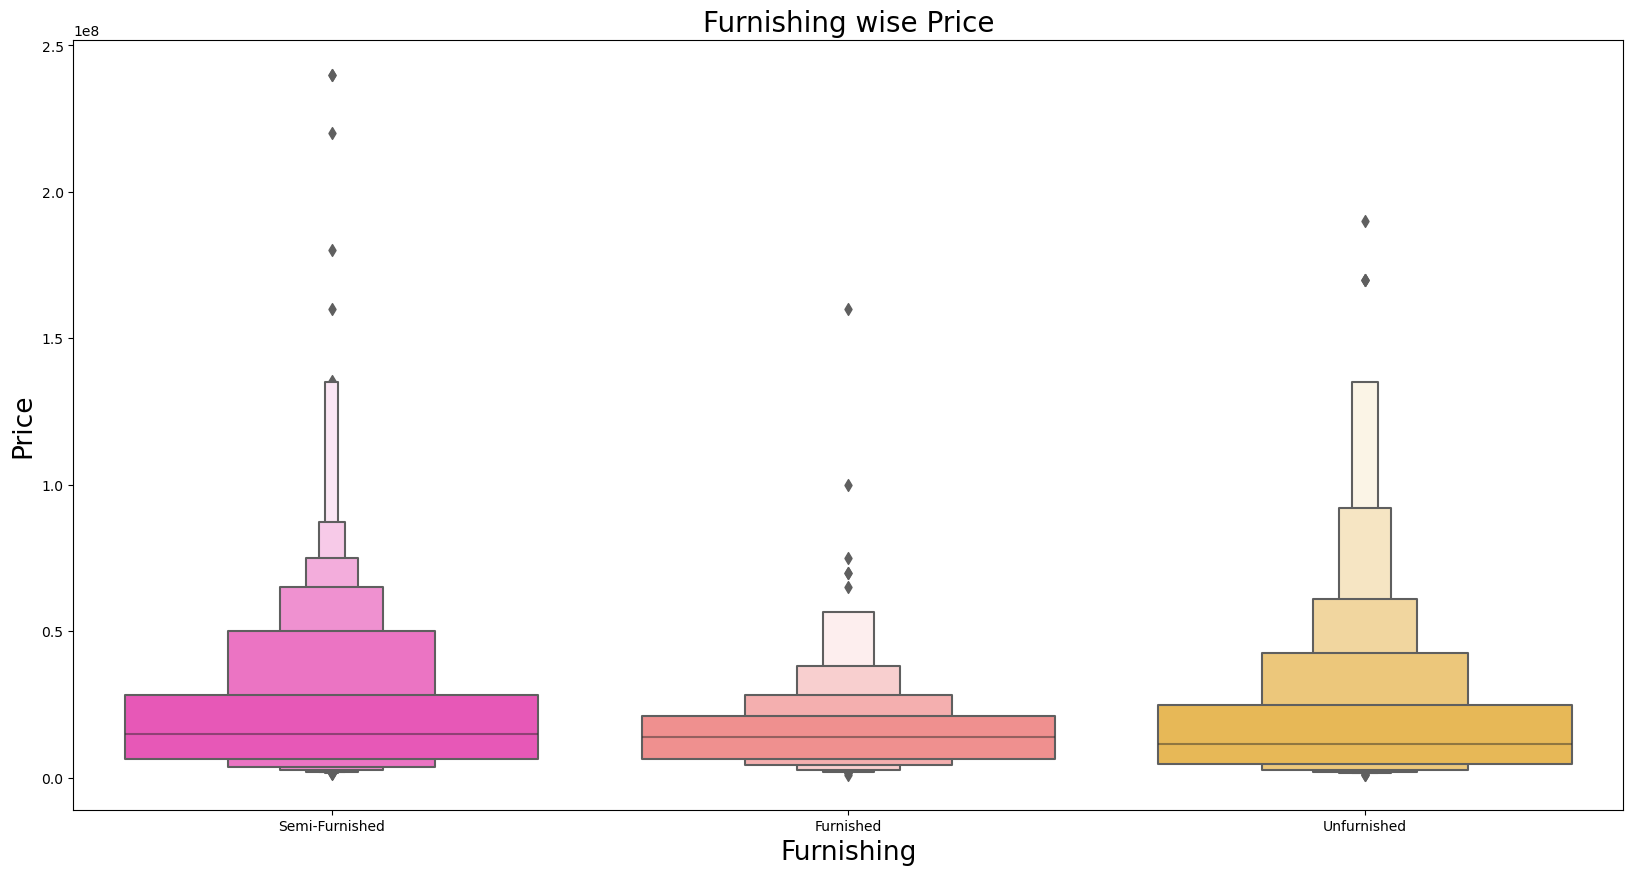

In [75]:
plt.figure(figsize = (20,10))
ax = sns.boxenplot(x = 'Furnishing' , y = 'Price' , data = df, palette='spring')
ax.set_xlabel(xlabel = 'Furnishing', fontsize = 19)
ax.set_ylabel(ylabel = 'Price', fontsize = 19)
plt.title('Furnishing wise Price', fontsize = 20)

In [76]:
fig = px.box(df, x="Furnishing", y="Price", color="Transaction")
fig.show()

Text(0.5, 1.0, 'Per_Sqft wise Distribution in Locality')

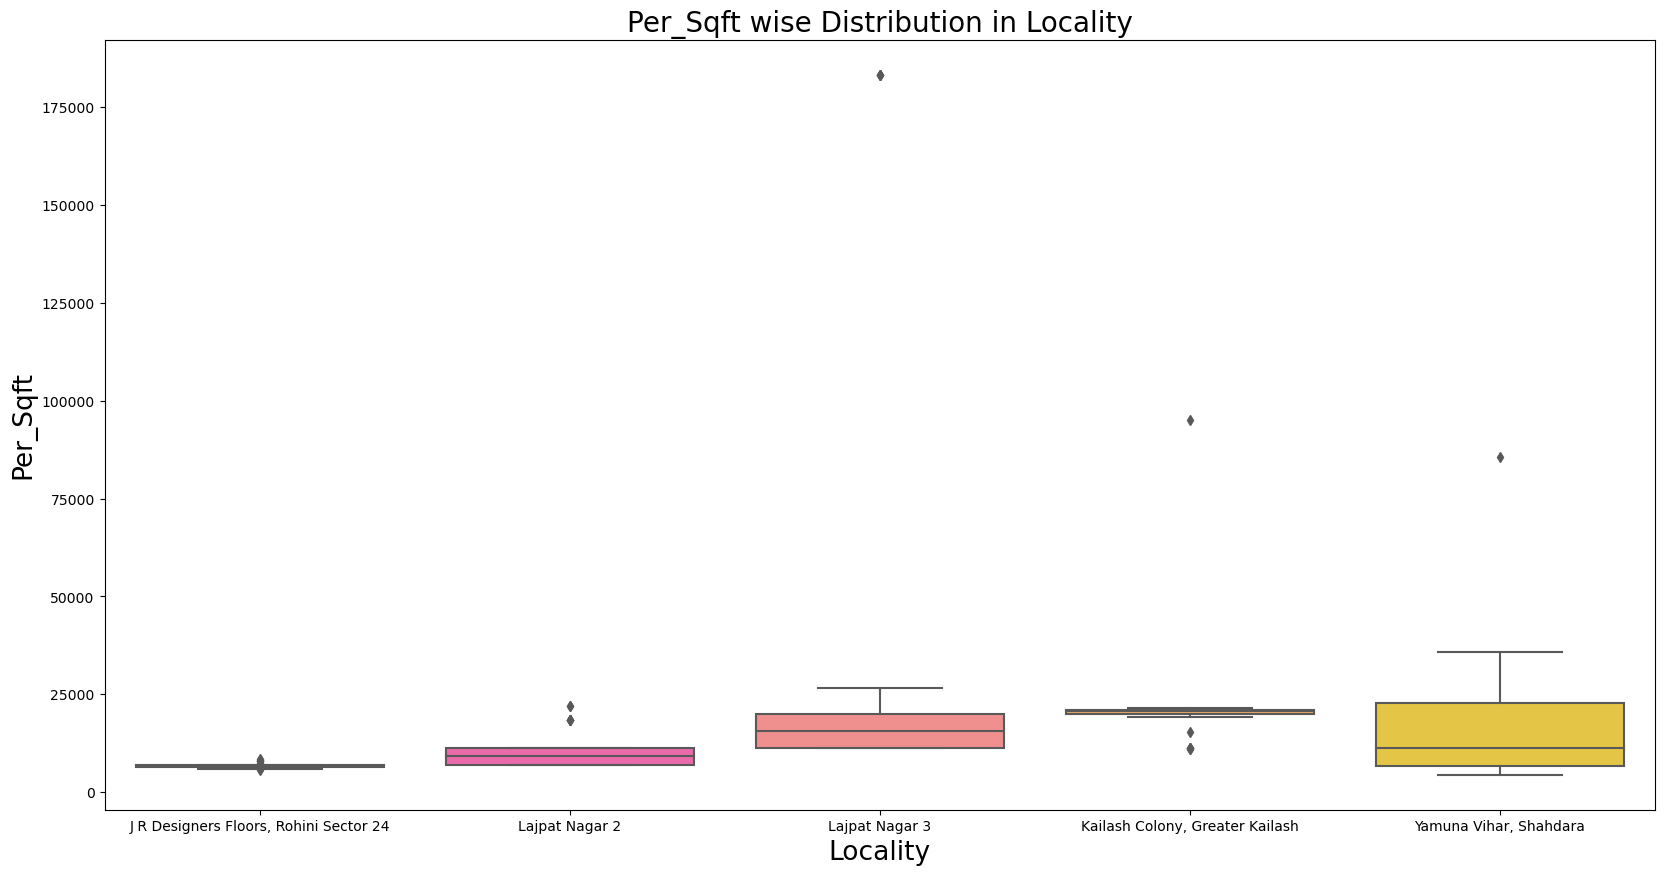

In [77]:
top_loc = df['Locality'].value_counts().head(5)
top_loc_name = top_loc.index
df_loc = df.loc[df['Locality'].isin(top_loc_name)& df['Per_Sqft']]
plt.figure(figsize = (20,10))
ax = sns.boxplot(x = 'Locality' , y = 'Per_Sqft' , data = df_loc, palette='spring')
ax.set_xlabel(xlabel = 'Locality', fontsize = 19)
ax.set_ylabel(ylabel = 'Per_Sqft', fontsize = 19)
plt.title('Per_Sqft wise Distribution in Locality', fontsize = 20)

##### The above plot shows the Top 5 Locality wise Per Square Feet:
 - It could be easily seen that Yamuna Vihar is acquiring the maximun Per Square Feet out of all the other Localities
 - One more surprising thing to notice is that Lajpat Nagar 3 is having an outlier which is having a 175000 Per Square Feet area

Text(0.5, 1.0, 'Status wise Price')

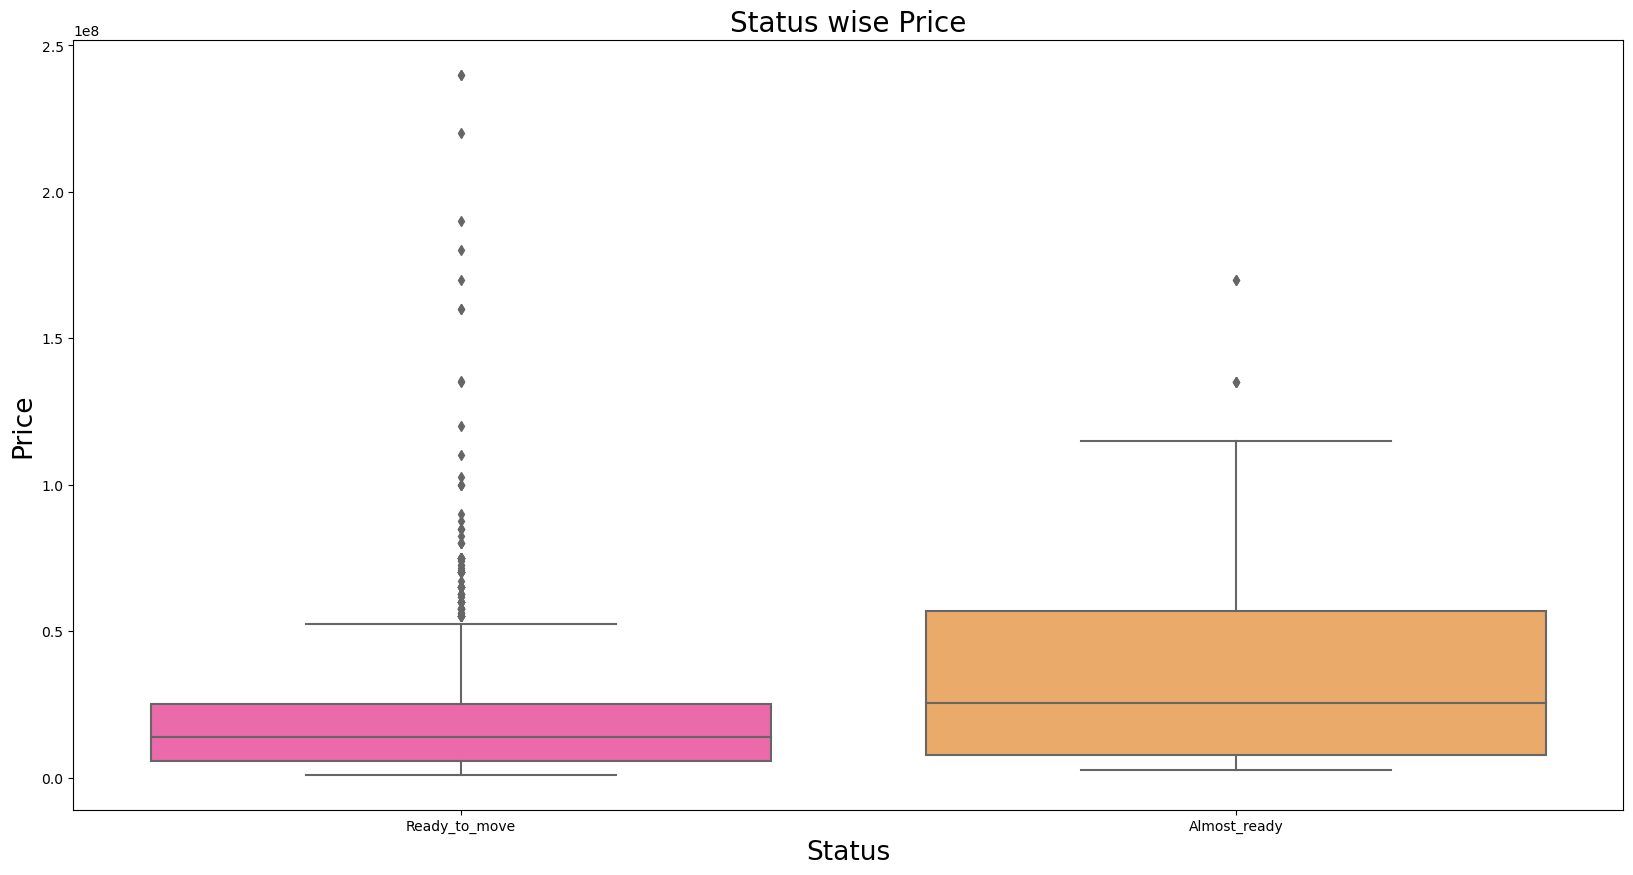

In [78]:
plt.figure(figsize = (20,10))
ax = sns.boxplot(x = 'Status' , y = 'Price' , data = df, palette='spring')
ax.set_xlabel(xlabel = 'Status', fontsize = 19)
ax.set_ylabel(ylabel = 'Price', fontsize = 19)
plt.title('Status wise Price', fontsize = 20)

##### Intresting Insight !!
- Prices are significantly higher for Almost Ready houses compared to Ready to move houses respectively.
 - Therefore, The company could take action and provide more emphasis to the Ready to move in houses compared to Almost Ready houses.

In [79]:
fig = px.box(df, x="Status", y="Price", color="ar_range")
fig.show()

Text(0.5, 1.0, 'Transaction wise Price')

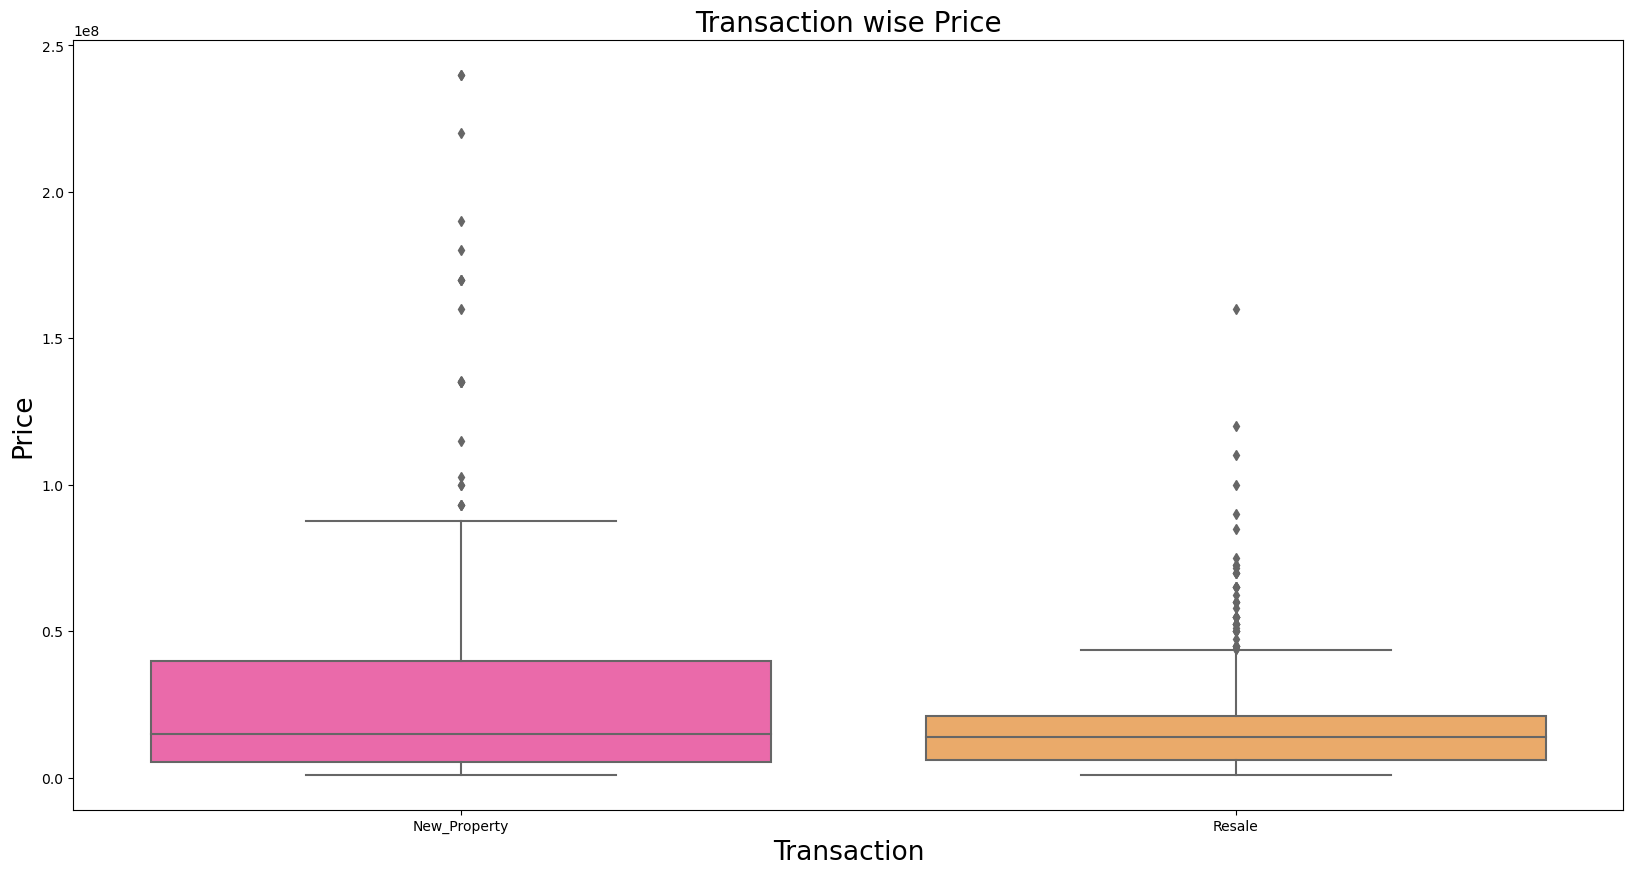

In [80]:
plt.figure(figsize = (20,10))
ax = sns.boxplot(x = 'Transaction' , y = 'Price' , data = df, palette='spring')
ax.set_xlabel(xlabel = 'Transaction', fontsize = 19)
ax.set_ylabel(ylabel = 'Price', fontsize = 19)
plt.title('Transaction wise Price', fontsize = 20)

In [81]:
fig = px.box(df, x="Transaction", y="Price", color="Furnishing")
fig.show()

Text(0.5, 1.0, 'Type wise Price')

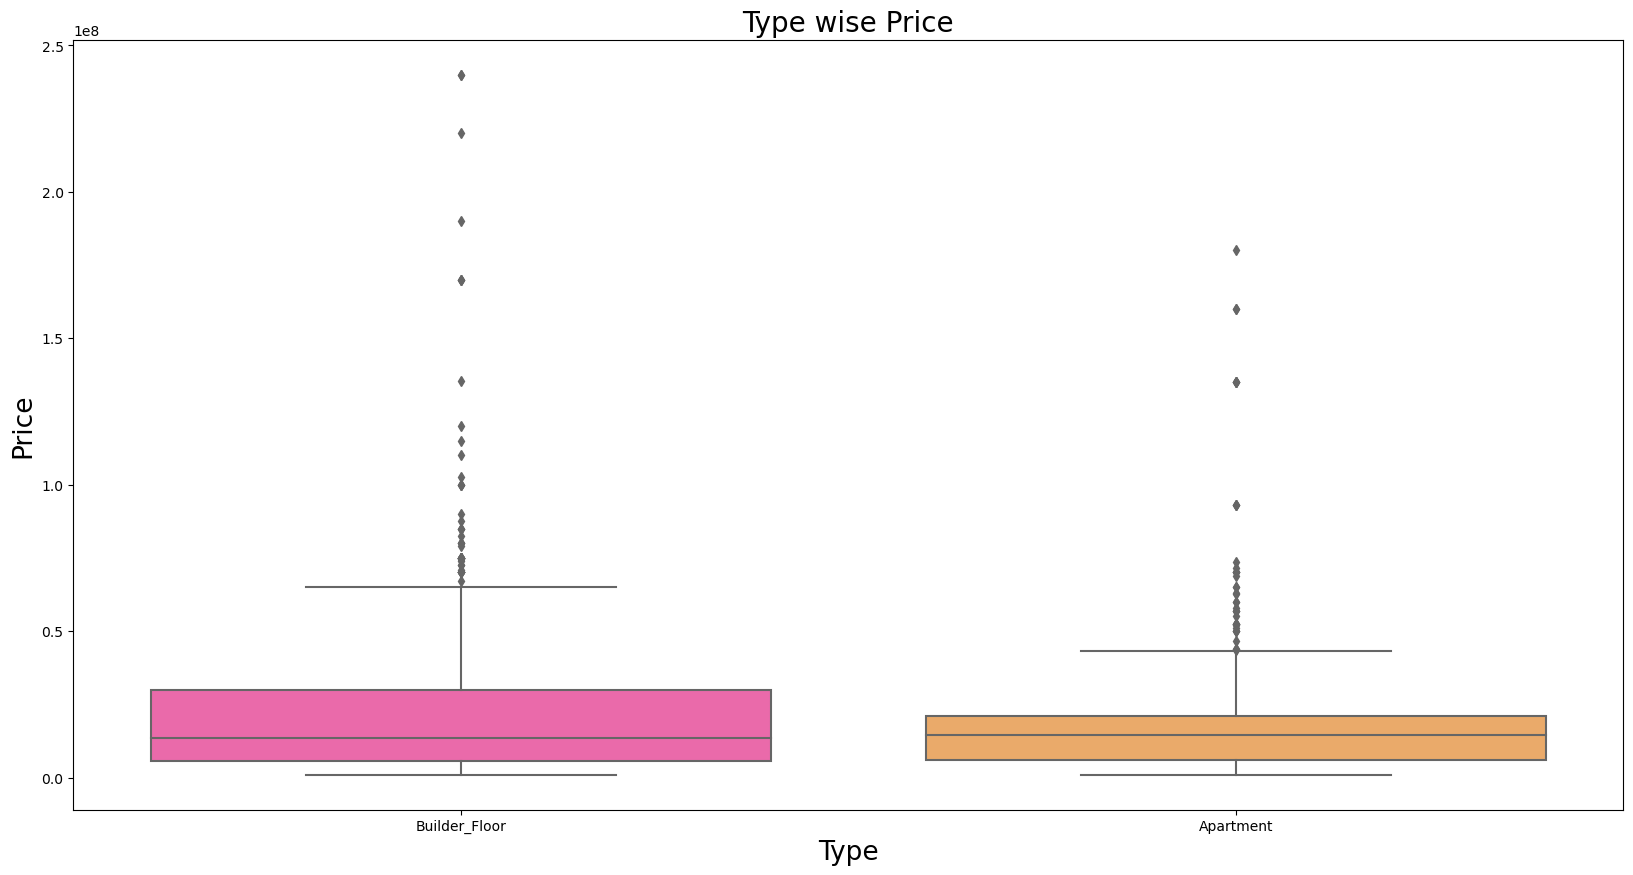

In [82]:
plt.figure(figsize = (20,10))
ax = sns.boxplot(x = 'Type' , y = 'Price' , data = df, palette='spring')
ax.set_xlabel(xlabel = 'Type', fontsize = 19)
ax.set_ylabel(ylabel = 'Price', fontsize = 19)
plt.title('Type wise Price', fontsize = 20)

#### It can be clearly seen that houses on builder floor are more expensive that the apartments:
 - Both of the categories are having a significant amount of outliers
 - One more thing there is to notice is that one of the outlier in the Builder floor is having a price of 2500000000 which makes it much more difficult to predict the price.

In [83]:
fig = px.box(df, x="Type", y="Price", color="ar_range")
fig.show()

### Checking the Data Types

In [84]:
df.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
ar_range         int64
dtype: object

### Storing all the Catagorical columns in a variable.

In [85]:
df_categorical = df.select_dtypes(include = "object")

In [86]:
df_categorical.head(1)

Furnishing          Locality         Status   Transaction  \
0  Semi-Furnished  Rohini Sector 25  Ready_to_move  New_Property   

            Type  
0  Builder_Floor

### Storing all the Numerical columns in a variable.

In [87]:
df_numerical = df.select_dtypes(exclude = "object")

In [88]:
df_numerical.head(1)

Area  BHK  Bathroom  Parking    Price  Per_Sqft  ar_range
0  800.0    3       2.0      1.0  6500000   11291.5         1

### Dropping the Locality column, as it have been considered as a categorical column.

In [89]:
df_categorical.drop(['Locality'], axis = 1, inplace = True)

### Making a dummy DataFrame for the correlation, as we can't see the coorelation between the variable without converting the data into dummy data.

In [90]:
df_dummy = pd.get_dummies(df_categorical, drop_first = True)

In [91]:
df_final = pd.concat([df_dummy, df_numerical], axis = 1)

### This is our final dummy dataset.
![](https://media.tenor.com/C8j0TGZFxFwAAAAM/mind-blown-whoa.gif)

In [92]:
df_final

Furnishing_Semi-Furnished  Furnishing_Unfurnished  Status_Ready_to_move  \
0                             1                       0                     1   
1                             1                       0                     1   
2                             0                       0                     1   
3                             1                       0                     1   
4                             1                       0                     1   
...                         ...                     ...                   ...   
1254                          0                       1                     1   
1255                          1                       0                     1   
1256                          1                       0                     1   
1257                          0                       1                     1   
1258                          0                       1                     1   

      Transaction_Resale  Type_Builder_Floor     Area  BHK  Bathroom  Parking  \
0                      0                   1    800.0    3       2.0      1.0   
1                      0                   0    750.0    2       2.0      1.0   
2                      1                   0    950.0    2       2.0      1.0   
3                      1                   1    600.0    2       2.0      1.0   
4                      0                   1    650.0    2       2.0      1.0   
...                  ...                 ...      ...  ...       ...      ...   
1254                   0                   1   4118.0    4       5.0      3.0   
1255                   1                   1   1050.0    3       2.0      3.0   
1256                   0                   1    875.0    3       3.0      3.0   
1257                   1                   1    990.0    2       2.0      1.0   
1258                   0                   1  11050.0    3       3.0      1.0   

         Price  Per_Sqft  ar_range  
0      6500000   11291.5         1  
1      5000000    6667.0         1  
2     15500000    6667.0         1  
3      4200000    6667.0         1  
4      6200000    6667.0         1  
...        ...       ...       ...  
1254  55000000   12916.0         3  
1255  12500000   12916.0         1  
1256  17500000   12916.0         1  
1257  11500000   12916.0         1  
1258  18500000   12916.0         3  

[1254 rows x 12 columns]

## Correlation

<Axes: >

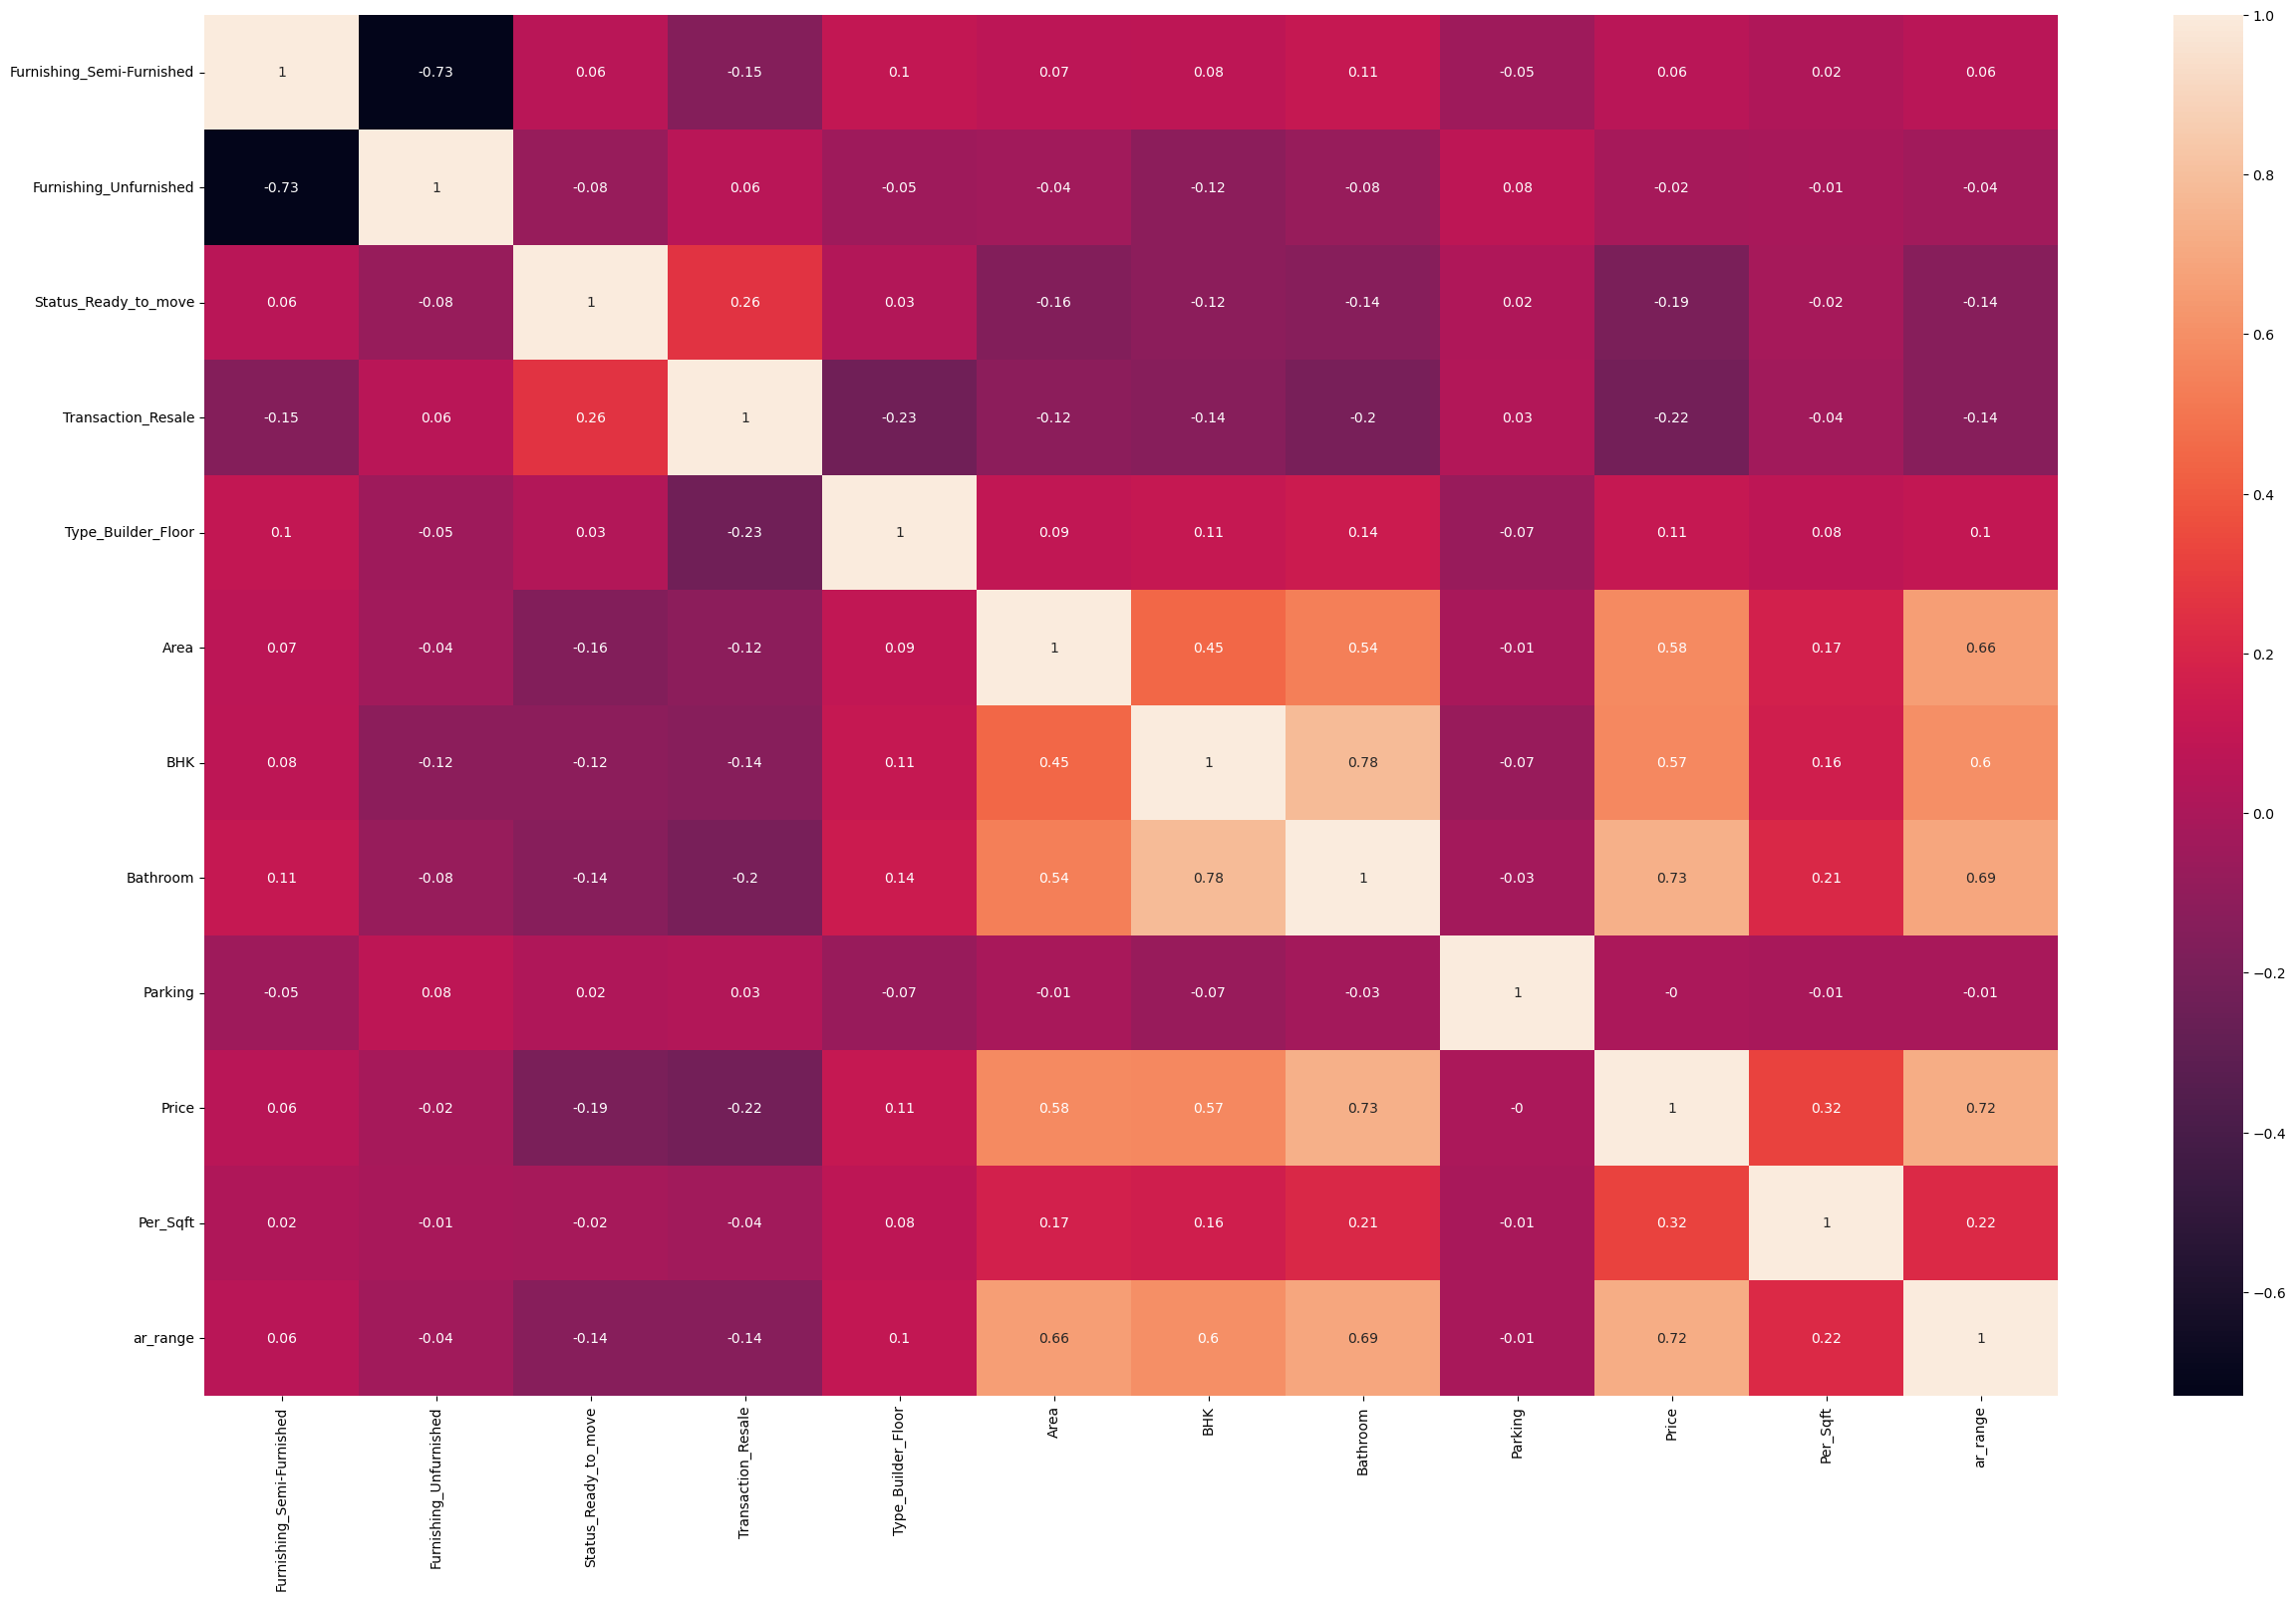

In [93]:
plt.figure(figsize = (30, 18))
sns.heatmap(np.round(df_final.corr(),2),annot=True)

### Insight Summary
- Based on the heatmap given, it could be seen that there is a strong correlation between the Price and the Number of Bathroom in the house. This is true in real-life because the higher the number of the bathroom and rooms in a house the more price is charged as the customer.
- It could also be seen that people who went for unrefurbished house had to pay less prices as there is a negative correlation between the two variables.
 -  Price is negatively correlated with Parking, Transaction-Resale, Status-Ready to move, Furnisning-Unfurnished.

![](https://media.tenor.com/dP_s1CQnYjkAAAAd/marley-kkt-throwing-laptop.gif)

### A barplot showing the correlation

<Axes: >

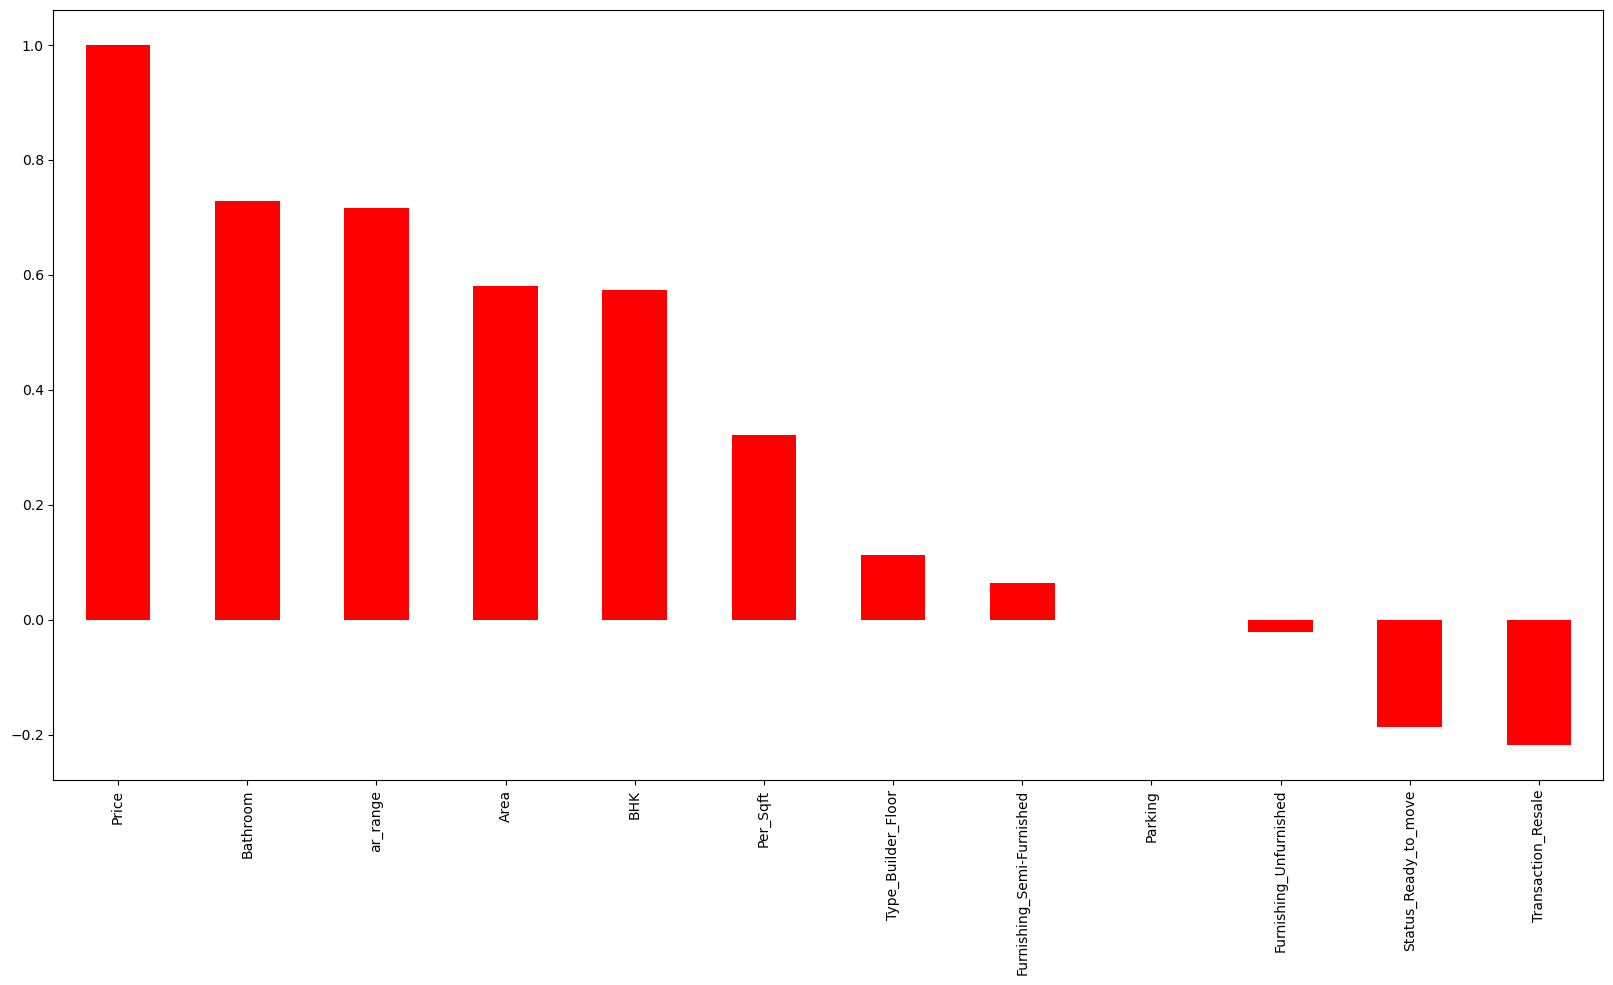

In [94]:
plt.figure(figsize=(20,10))
df_final.corr()['Price'].sort_values(ascending = False).plot(kind='bar',color="red")

In [95]:
positiv_corrs = df_final.corr()['Price'][df_final.corr()['Price'] > 0]

### Plotting a heatmap to show all the varibles having a positive correlation.

<Axes: >

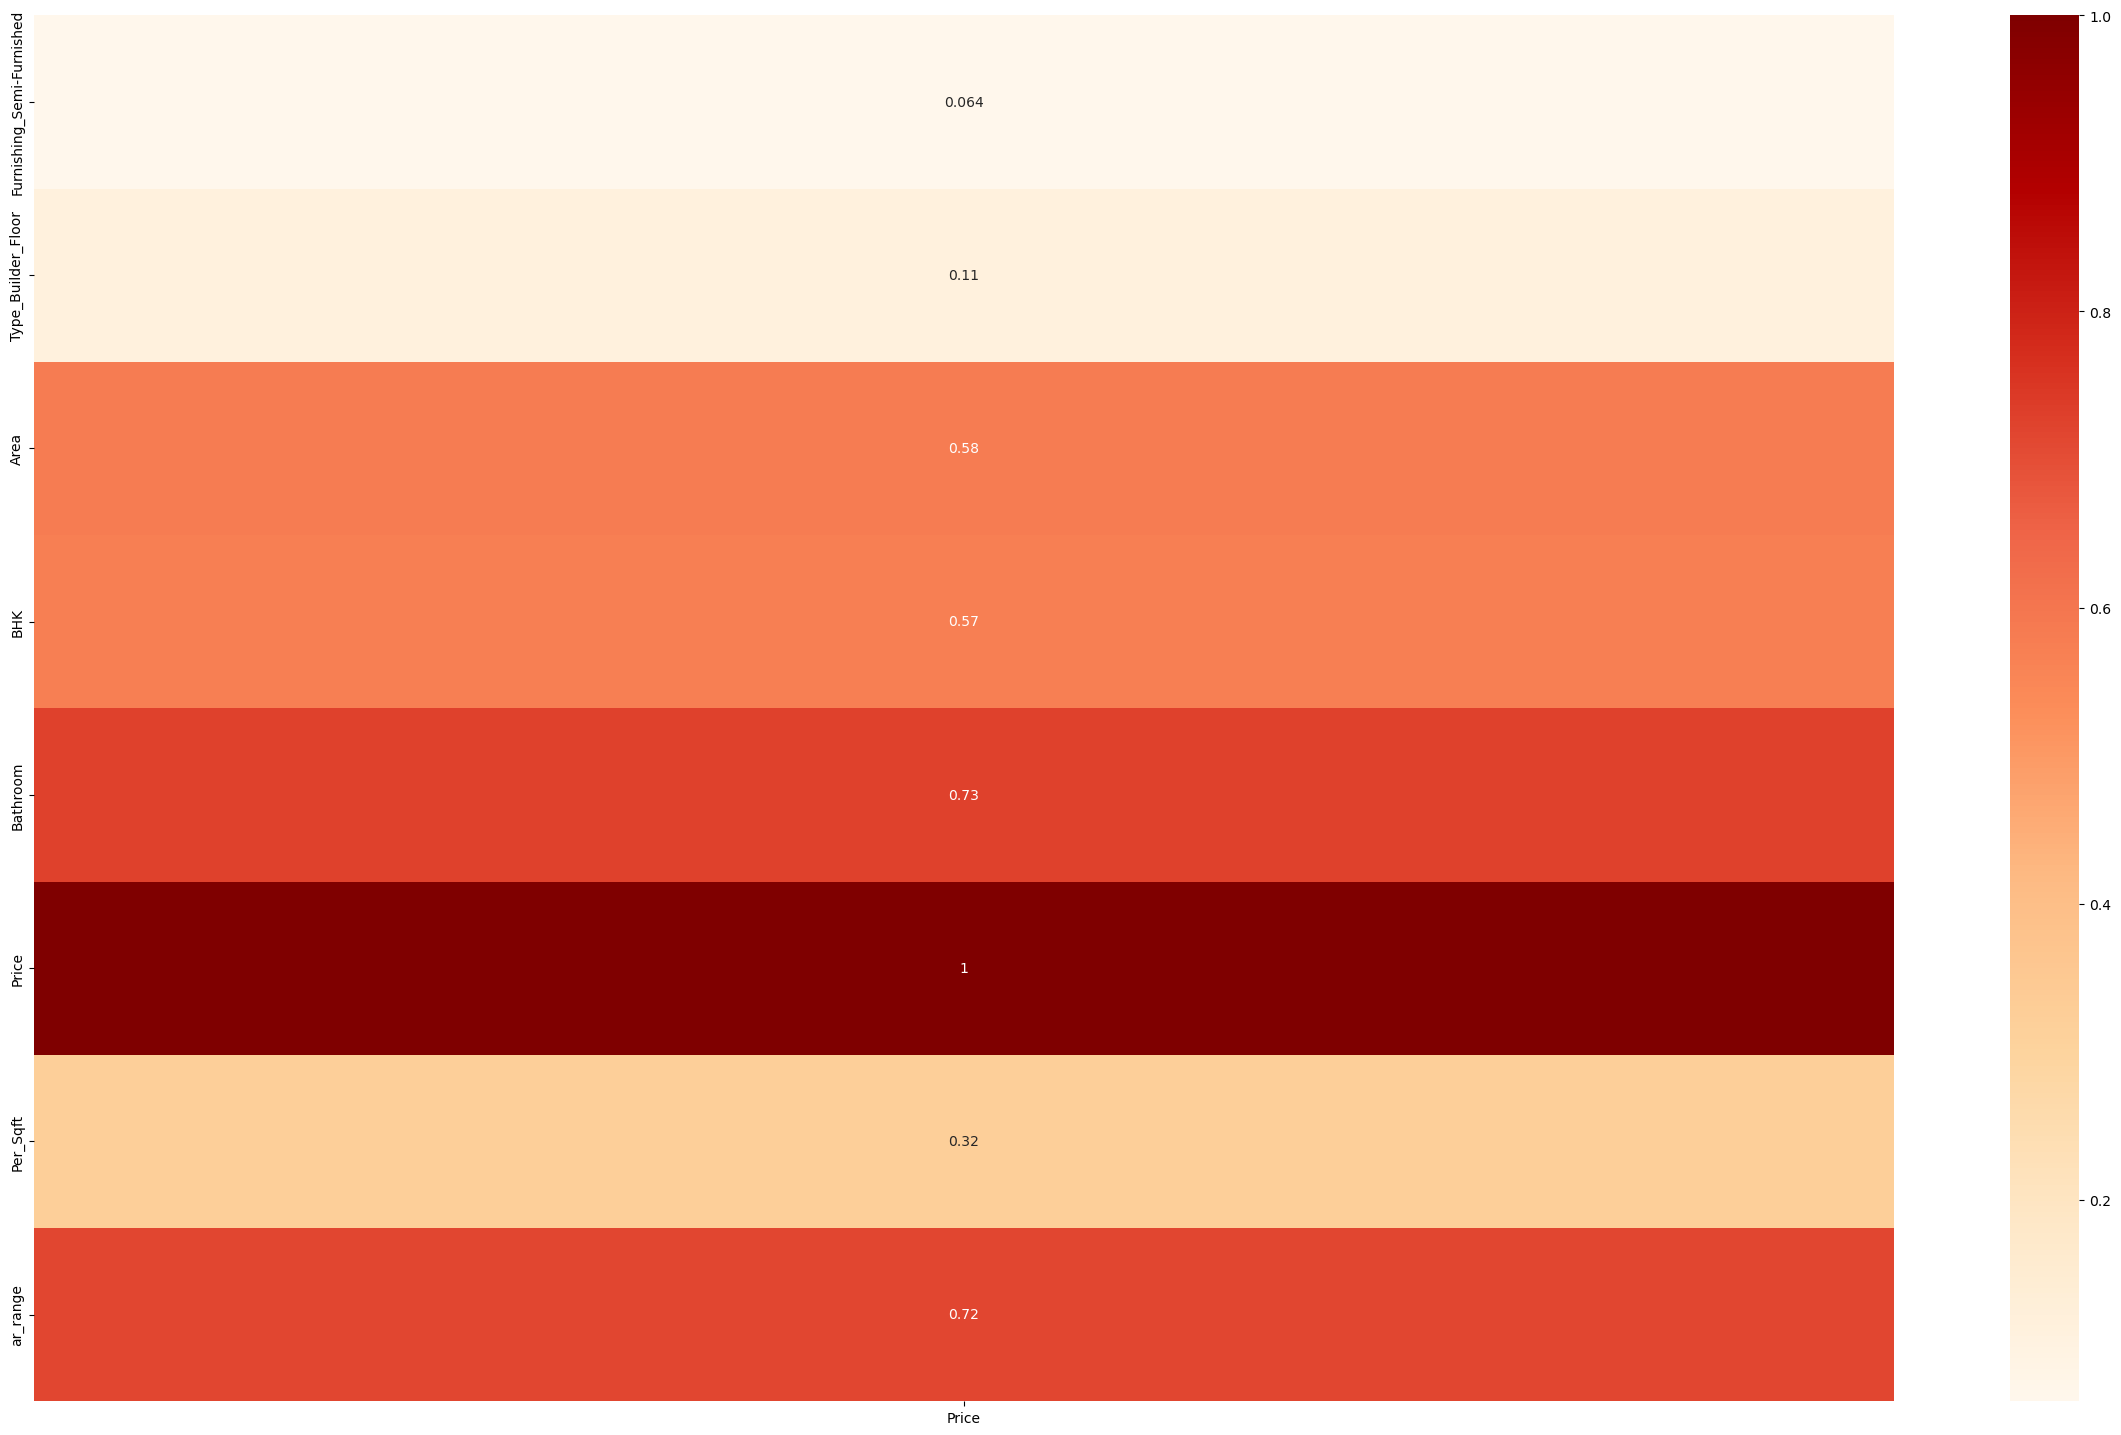

In [96]:
plt.figure(figsize = (30,18))
sns.heatmap(data=pd.DataFrame(positiv_corrs), annot=True,cmap = 'OrRd')

In [97]:
negative_corrs = df_final.corr()['Price'][df_final.corr()['Price'] < 0]

### Plotting a heatmap to show all the varibles having a negative correlation.

<Axes: >

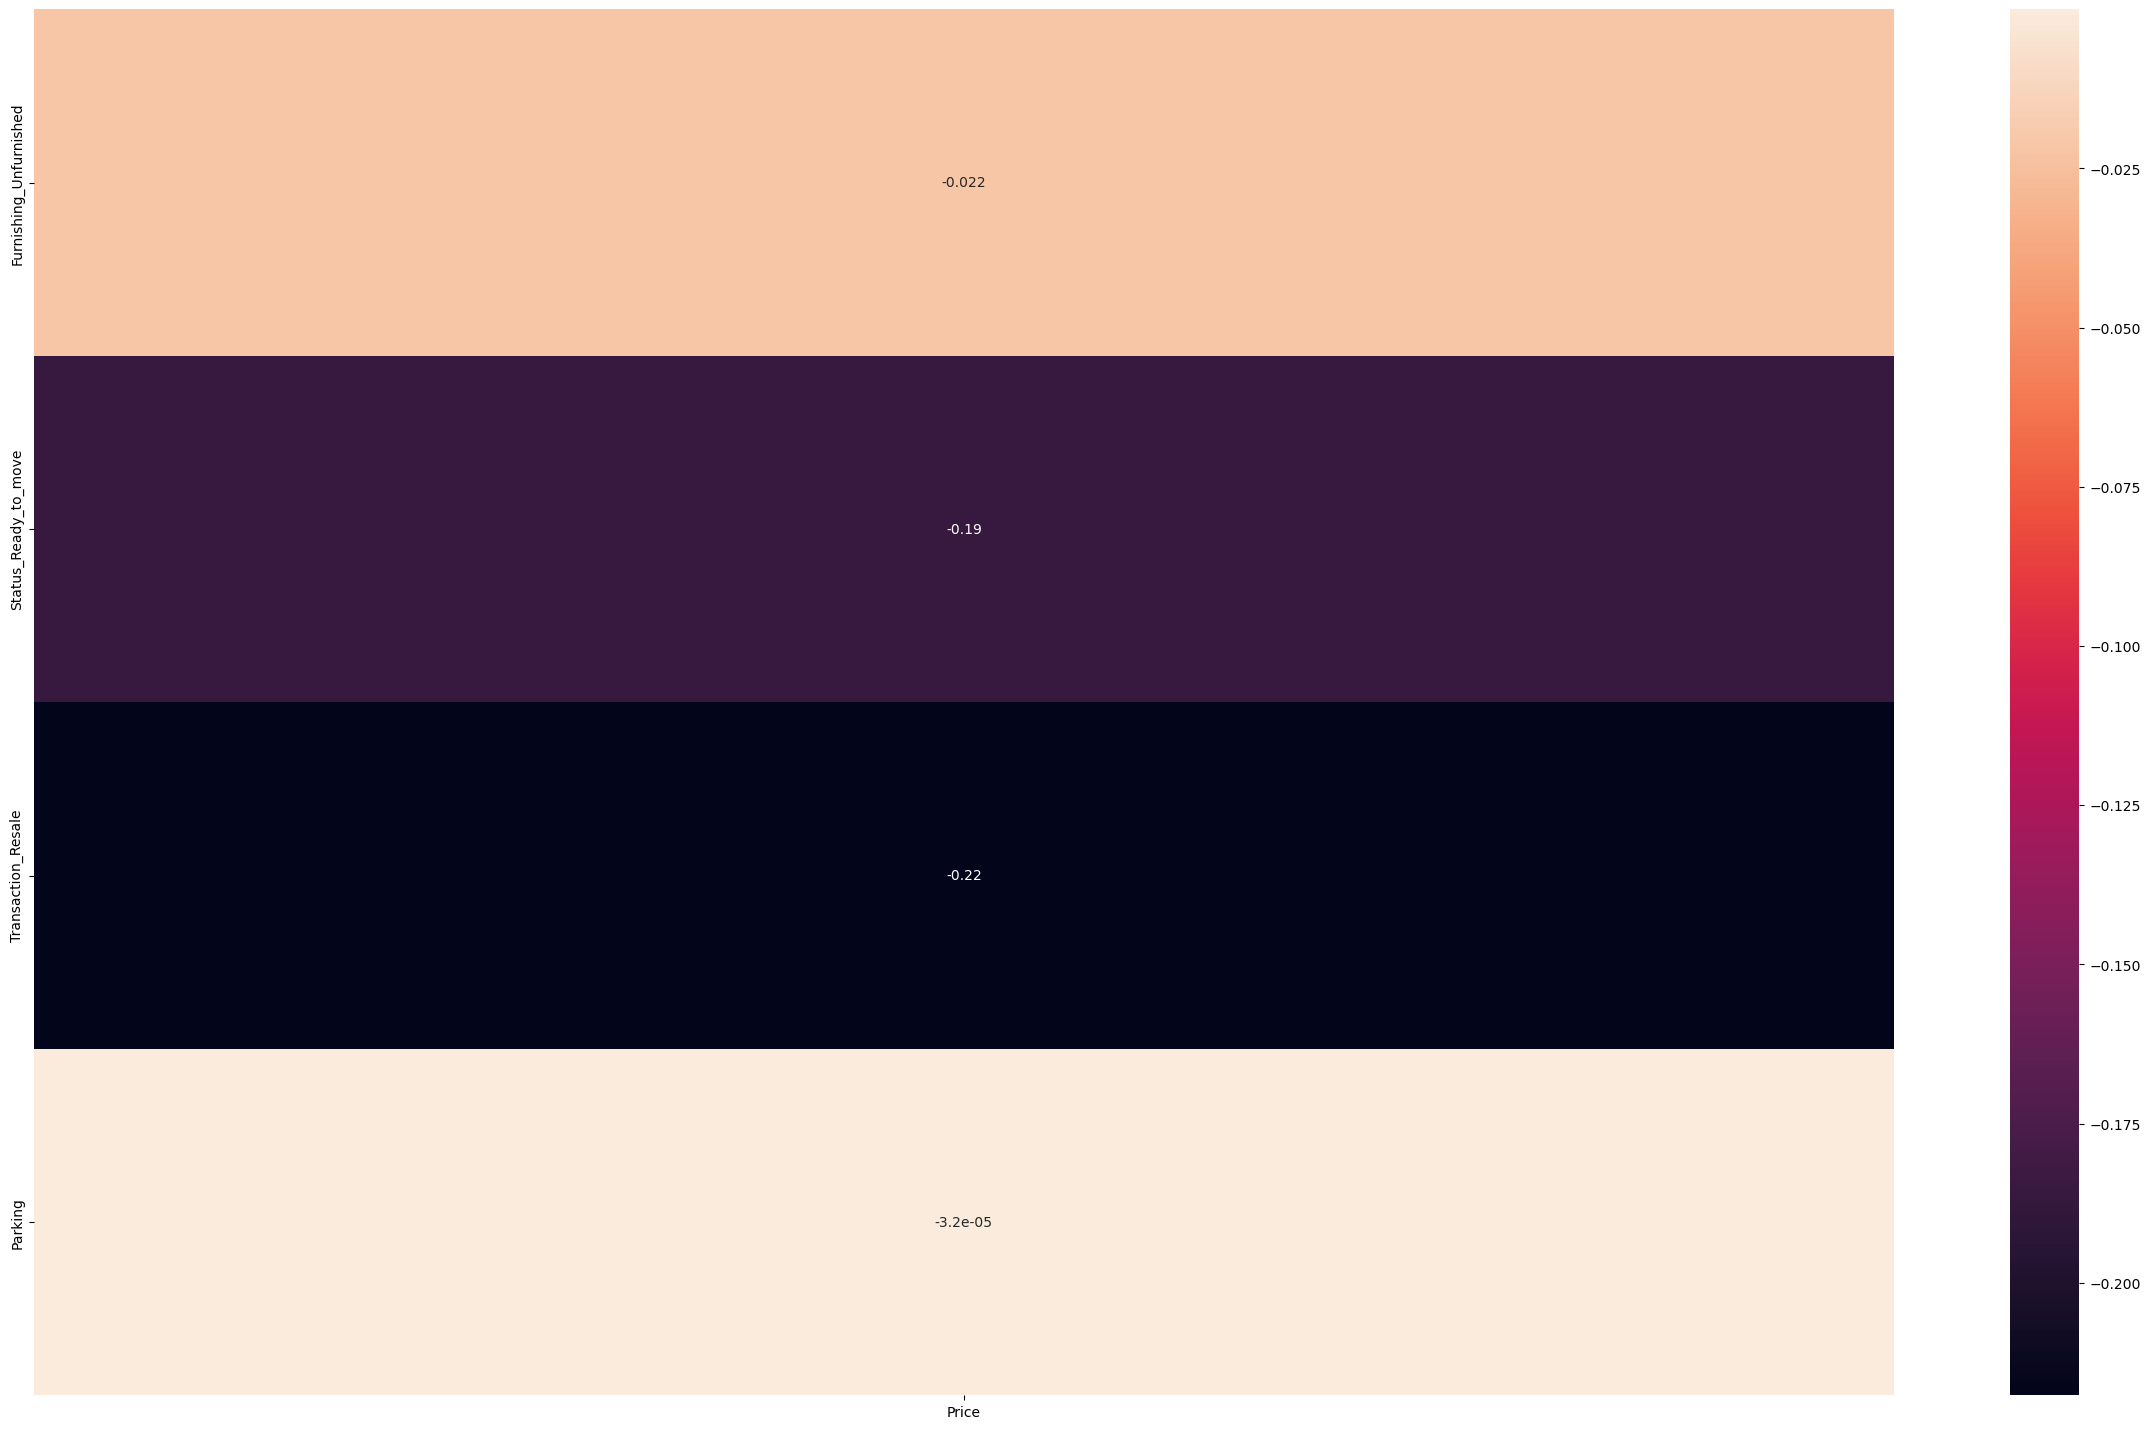

In [98]:
plt.figure(figsize = (30,18))
sns.heatmap(data=pd.DataFrame(negative_corrs), annot=True)

## WordCloud

In [99]:
text = ' '.join(df['Locality'])

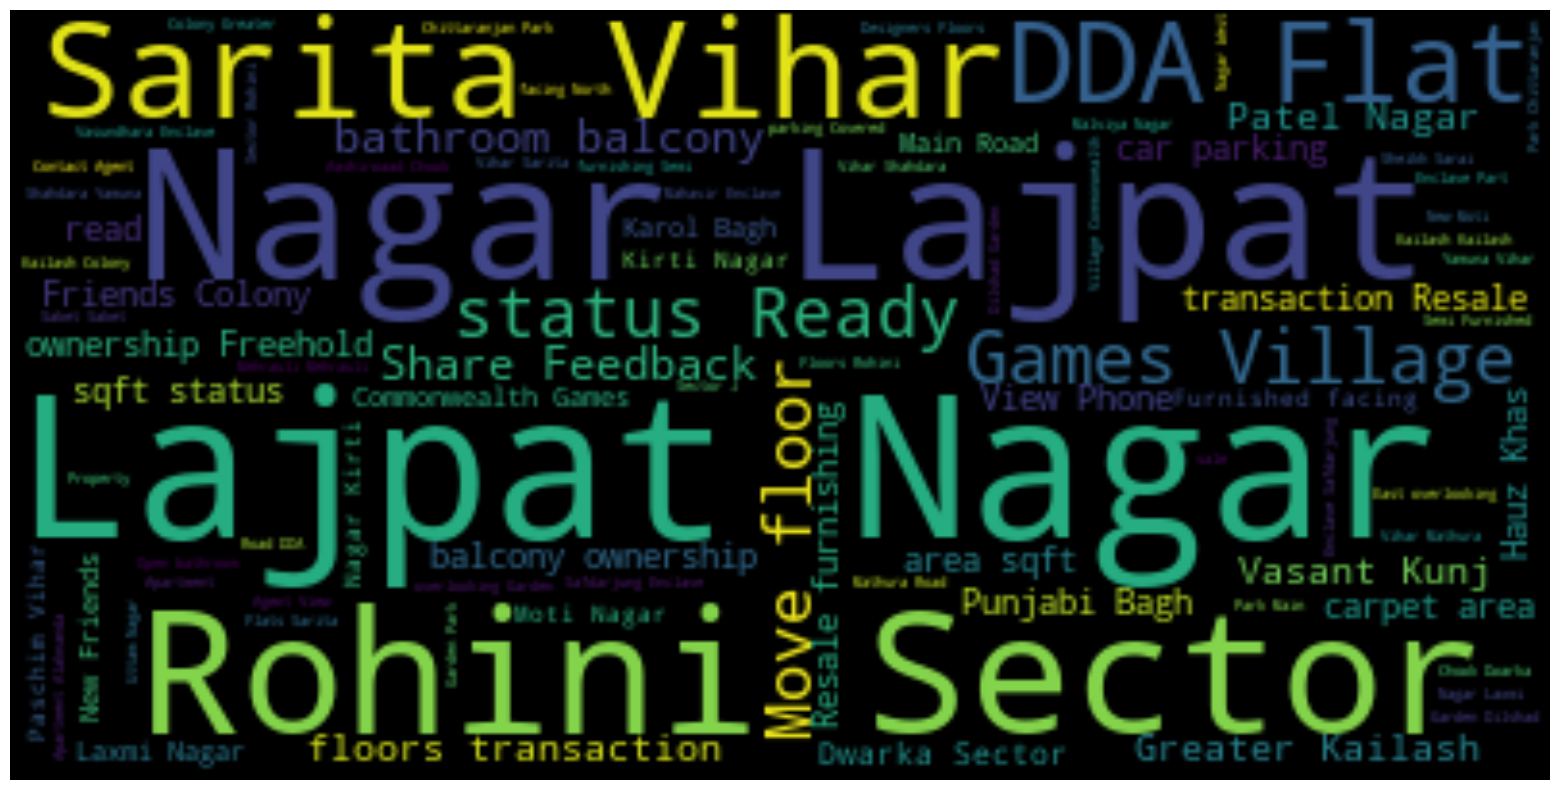

In [100]:
text = " ".join(n for n in df['Locality'])
wc =  WordCloud(background_color='black').generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

##### From this wordcloud We can easily see some words which were used repeatedelly in the "Locality" column.

# Modelling

#### Getting Back our categorical and numerical columns

In [101]:
df_categorical = df.select_dtypes(include = "object")

#### Making another categorical column, you will get to know why below

In [102]:
df_cat = df.select_dtypes(include = "object")

In [103]:
# Our first categorical dataframe
df_categorical.head(1)

Furnishing          Locality         Status   Transaction  \
0  Semi-Furnished  Rohini Sector 25  Ready_to_move  New_Property   

            Type  
0  Builder_Floor

In [104]:
# Our second categorical dataframe
df_cat.head(1)

Furnishing          Locality         Status   Transaction  \
0  Semi-Furnished  Rohini Sector 25  Ready_to_move  New_Property   

            Type  
0  Builder_Floor

In [105]:
# Dropping the "Locality" column as it won't  be useful in the modelling
df_categorical.drop(['Locality'], axis = 1, inplace = True)

In [106]:
# Dropping the "Locality" column in the second dataframe also, as it won't  be useful in the modelling
df_cat.drop(['Locality'], axis = 1, inplace = True)

In [107]:
df_categorical.head(1)

Furnishing         Status   Transaction           Type
0  Semi-Furnished  Ready_to_move  New_Property  Builder_Floor

In [108]:
df_categorical.head(1)

Furnishing         Status   Transaction           Type
0  Semi-Furnished  Ready_to_move  New_Property  Builder_Floor

In [109]:
# Saving our numerical columns in df_numerical
df_numerical = df.select_dtypes(exclude = "object")

In [110]:
# Initialising the encoder
l1 = preprocessing.LabelEncoder()

In [112]:
# Let's fit our catagorical dataset into the encoder
l1.fit(df_cat)

ValueError: y should be a 1d array, got an array of shape (1254, 4) instead.

### It will of course throw an error because we can't fit more than one column in the label encoder at a time.

### Let's try label encoding on the categorical columns

In [113]:
# Storing all the catagorical columns in a list called col
col = ['Furnishing', 'Status', 'Transaction', 'Type']

In [114]:
# Creaing a loop to fit and transform our columns to numbers
for i in col:
    df_cat[i] = l1.fit_transform(df[i])

In [115]:
df_cat.head()

Furnishing  Status  Transaction  Type
0           1       1            0     1
1           1       1            0     0
2           0       1            1     0
3           1       1            1     1
4           1       1            0     1

Done!!, but don't be too happy because when we gave loop to encode the categorical columns it overwrited the previous labels, which means that we will not be able to use the labels classes fot the previous columns.

In [116]:
l1.classes_

array(['Apartment', 'Builder_Floor'], dtype=object)

As we can see above, the encoder is only storing the values of the last column to be transformed and all the other columns values has been overwritten.
Which means that we can't just encode all the categorical columns at once.

### So.....what to do now?
![](https://media.tenor.com/0xbeUH_AveQAAAAC/the-nightmare-before-christmas-jack-skellington.gif)

## Now now now....... there two ways to solve this question i demonstrated 2 ways 
![](https://web.nmsu.edu/~gchavez7/red_pill_blue_pill-copy3.gif)

![](https://media.tenor.com/e4AMD3s6ShoAAAAC/easy-way-hard-way.gif)

### Method 1 (Harder or Longer way)
    1. First do the label encoding on each column one by one
    2. Saving all the encoders to load when we will make our function
    3. Dividing our data into Numerical and Categorical columns
    4. When making the function we transform all four of the categorical columns one by one
    5. After transforming we will make a dataframe for the transformed columns 
    6. Join back the transformed catagorical columns with the numerical columns
    7. Get the prediction by loading the already trained model

### Let's do it hands on

In [117]:
# Initialising
le = preprocessing.LabelEncoder()

In [118]:
# Creating a function that label encodes the specific column given and store the real values in it
def func_labelencoder1(list1,features):
    features[list1] = le.fit_transform(features[list1].astype(str))


var_le = ['Furnishing']

for i in var_le:
    func_labelencoder1(i,df_categorical)


In [119]:
# As we can see, the encoder has the real values stored in it
le.classes_

array(['Furnished', 'Semi-Furnished', 'Unfurnished'], dtype=object)

In [120]:
# Initialising our second encoder
le2 = preprocessing.LabelEncoder()

In [121]:
# Creating the same function that label encodes the specific column given and store the real values in it
def func_labelencoder2(list1,features):
    features[list1] = le2.fit_transform(features[list1].astype(str))


var_le = ['Status']

for i in var_le:
    func_labelencoder2(i,df_categorical)

In [122]:
# The encoder has the real values stored in it
le2.classes_

array(['Almost_ready', 'Ready_to_move'], dtype=object)

In [123]:
# Initialising our third encoder
le3 = preprocessing.LabelEncoder()

In [124]:
# Creating the same function that label encodes the specific column given and store the real values in it
def func_labelencoder3(list1,features):
    features[list1] = le3.fit_transform(features[list1].astype(str))


var_le = ['Transaction']

for i in var_le:
    func_labelencoder3(i,df_categorical)


In [125]:
# The encoder has the real values stored in it
le3.classes_

array(['New_Property', 'Resale'], dtype=object)

In [126]:
# Initialising our forth encoder
le4 = preprocessing.LabelEncoder()

In [127]:
# Creating the same function that label encodes the specific column given and store the real values in it
def func_labelencoder4(list1,features):
    features[list1] = le4.fit_transform(features[list1].astype(str))


var_le = ['Type']

for i in var_le:
    func_labelencoder4(i,df_categorical)


In [128]:
# The encoder has the real values stored in it
le4.classes_

array(['Apartment', 'Builder_Floor'], dtype=object)

##### Saving our encoders using Joblib
 - Joblib is a Python library for running computationally intensive tasks in parallel.
 - It provides a set of functions for performing operations in parallel.

In [129]:
# Saving our first encoder
from joblib import dump, load
dump(le, 'l1.joblib')

['l1.joblib']

In [130]:
# Saving our second encoder
from joblib import dump, load
dump(le2, 'l2.joblib')

['l2.joblib']

In [131]:
# Saving our third encoder
from joblib import dump, load
dump(le3, 'l3.joblib')

['l3.joblib']

In [132]:
# Saving our forth encoder
from joblib import dump, load
dump(le4, 'l4.joblib')

['l4.joblib']

In [133]:
# Combining(Joining) the encoded columns with the numerical ones
df_X = df_numerical.join(df_categorical)

In [134]:
# Lokking at our joined dataframe
df_X.head()

Area  BHK  Bathroom  Parking     Price  Per_Sqft  ar_range  Furnishing  \
0  800.0    3       2.0      1.0   6500000   11291.5         1           1   
1  750.0    2       2.0      1.0   5000000    6667.0         1           1   
2  950.0    2       2.0      1.0  15500000    6667.0         1           0   
3  600.0    2       2.0      1.0   4200000    6667.0         1           1   
4  650.0    2       2.0      1.0   6200000    6667.0         1           1   

   Status  Transaction  Type  
0       1            0     1  
1       1            0     0  
2       1            1     0  
3       1            1     1  
4       1            0     1

In [135]:
# Removing the "ar_range" column
df_X = df_X.drop(['ar_range'], axis = 1)

In [136]:
df_X.head()

Area  BHK  Bathroom  Parking     Price  Per_Sqft  Furnishing  Status  \
0  800.0    3       2.0      1.0   6500000   11291.5           1       1   
1  750.0    2       2.0      1.0   5000000    6667.0           1       1   
2  950.0    2       2.0      1.0  15500000    6667.0           0       1   
3  600.0    2       2.0      1.0   4200000    6667.0           1       1   
4  650.0    2       2.0      1.0   6200000    6667.0           1       1   

   Transaction  Type  
0            0     1  
1            0     0  
2            1     0  
3            1     1  
4            0     1

In [137]:
# Getting our X and y
X = df_X.drop('Price', axis = 1)
y = df_X['Price']

In [138]:
X.head(1)

Area  BHK  Bathroom  Parking  Per_Sqft  Furnishing  Status  Transaction  \
0  800.0    3       2.0      1.0   11291.5           1       1            0   

   Type  
0     1

In [139]:
y.head(1)

0    6500000
Name: Price, dtype: int64

In [140]:
# Splitting out data through train test

In [141]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.35)

In [142]:
X_train.head(3)

Area  BHK  Bathroom  Parking  Per_Sqft  Furnishing  Status  \
213  1000.0    3       2.0      1.0    4620.0           2       1   
120  1500.0    1       2.0      1.0   11291.5           2       1   
618  1620.0    3       3.0      1.0   13889.0           0       1   

     Transaction  Type  
213            0     0  
120            1     0  
618            0     1

In [143]:
y.head(3)

0     6500000
1     5000000
2    15500000
Name: Price, dtype: int64

In [144]:
# Initialising the Regressor
clf1 = DecisionTreeRegressor(min_samples_split=100)

In [145]:
# Fitting out training values into the model 
clf1 = clf1.fit(X_train, y_train)

In [146]:
# Checking the score
clf1.score(X_train,y_train)

0.7479686612320555

[Text(0.7102272727272727, 0.9285714285714286, 'x[0] <= 2030.0\nsquared_error = 593057195570175.8\nsamples = 815\nvalue = 19958429.448'),
 Text(0.5113636363636364, 0.7857142857142857, 'x[0] <= 1134.0\nsquared_error = 121694890272653.1\nsamples = 700\nvalue = 13261314.286'),
 Text(0.3409090909090909, 0.6428571428571429, 'x[0] <= 865.556\nsquared_error = 29210638091800.336\nsamples = 406\nvalue = 6927266.01'),
 Text(0.22727272727272727, 0.5, 'x[4] <= 98947.0\nsquared_error = 21568767132568.36\nsamples = 256\nvalue = 5174765.625'),
 Text(0.18181818181818182, 0.35714285714285715, 'x[4] <= 6794.5\nsquared_error = 18151260275278.74\nsamples = 255\nvalue = 5057803.922'),
 Text(0.09090909090909091, 0.21428571428571427, 'x[0] <= 635.0\nsquared_error = 3323377223481.984\nsamples = 126\nvalue = 3425396.825'),
 Text(0.045454545454545456, 0.07142857142857142, 'squared_error = 1263095361781.076\nsamples = 77\nvalue = 2721428.571'),
 Text(0.13636363636363635, 0.07142857142857142, 'squared_error = 4558

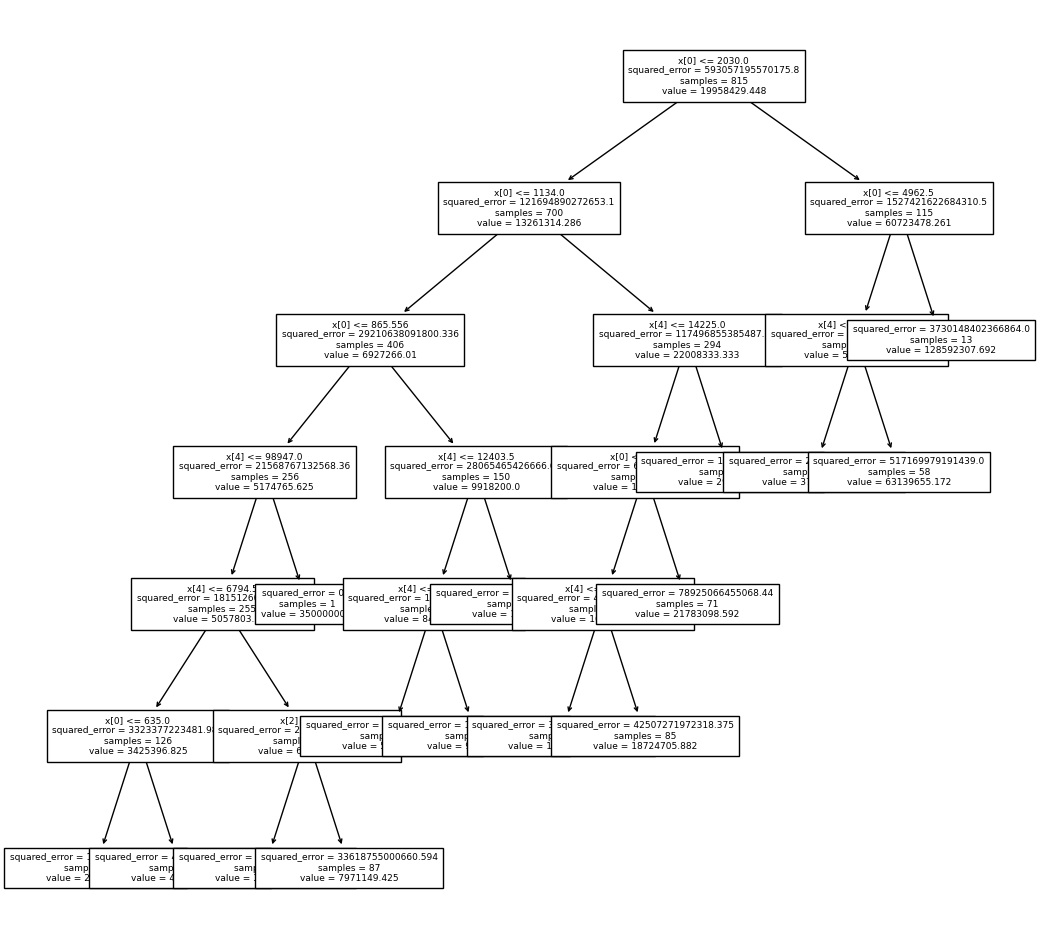

In [147]:
# Plotting a decision tree
plt.figure(figsize = (12,12))
tree.plot_tree(clf1, fontsize=6.5)

# Looking at the MSE score of Training data 

In [148]:
y_pred_train_clf1 = clf1.predict(X_train)
mean_squared_error(y_train,y_pred_train_clf1)

149468998965514.1

In [149]:
mse_train_clf1 = mean_squared_error(y_train,y_pred_train_clf1)

In [150]:
import math
rmse_train_clf1 = math.sqrt(mse_train_clf1)
print("RMSE:", rmse_train_clf1)

RMSE: 12225751.468335764


In [151]:
r2_score(y_train,y_pred_train_clf1)

0.7479686612320555

# Looking at the MSE score of Testing data

In [152]:
y_pred_test_clf1 = clf1.predict(X_test)

In [153]:
mean_squared_error(y_test,y_pred_test_clf1)

286431521615716.7

In [154]:
mse_test_clf1 = mean_squared_error(y_test,y_pred_test_clf1)

In [155]:
import math
rmse_test_clf1 = math.sqrt(mse_test_clf1)
print("RMSE:", rmse_test_clf1)

RMSE: 16924287.920492154


In [156]:
r2_score(y_test,y_pred_test_clf1)

0.6259746579583417

In [157]:
# Saving our model through joblib
from joblib import dump, load
dump(clf1, 'tree1.joblib')

['tree1.joblib']

# Wrapping it all inside a function !!

In [161]:
def lefunction(model_path, encoder_path1,encoder_path2,encoder_path3,encoder_path4, user_input):
    # Loading our decision tree model
    clf1 = load(model_path)
    # Loading our first encoder
    le = load(encoder_path1)
    # Loading our second encoder
    le2 = load(encoder_path2)
    # Loading our third encoder
    le3 = load(encoder_path3)
    # Loading our forth encoder
    le4 = load(encoder_path4)
    # Creating a list for the columns in the dataset 
    column = ['Area', 'BHK', 'Bathroom', 'Furnishing', 'Parking', 'Status', 'Transaction', 'Type', 'Per_Sqft', 'ar_range']
    # The zip function used below allows us to loop over 2 iterable items at a time.
    dic = {i:[z] for i,z in zip(column, user_input)}
    # Saving the dataframe
    df_temp = pd.DataFrame(dic)
    # Saving our first categorical column
    cat_data1 = df_temp[['Furnishing']]
    # Saving our second categorical column
    cat_data2 = df_temp[['Status']]
    # Saving our third categorical column
    cat_data3 = df_temp[['Transaction']]
    # Saving our forth categorical column
    cat_data4 = df_temp[['Type']]
    # Saving our numerical column
    num_data = df_temp[['Area', 'BHK', 'Bathroom', 'Parking', 'Per_Sqft',]]
    # Saving our first transformed columns in a variable
    cat_data1_encoded = le.transform(cat_data1)
    # Saving our second transformed columns in a variable
    cat_data2_encoded = le2.transform(cat_data2)
    # Saving our third transformed columns in a variable
    cat_data3_encoded = le3.transform(cat_data3)
    # Saving our forth transformed columns in a variable
    cat_data4_encoded = le4.transform(cat_data4)
    # Creating a dataframe out of the transformed column values
    encoded_df = pd.DataFrame({'Furnishing': cat_data1_encoded,'Status': cat_data2_encoded,'Transaction': cat_data3_encoded,'Type': cat_data4_encoded})
    # Joining the transformed categorical column with the numerical columns
    df_temp_encoded = pd.concat([num_data, encoded_df], axis=1)
    # Prediction
    pred = clf1.predict(df_temp_encoded)
    # Returning the prediction
    return df_temp_encoded

In [165]:
df.head(1)

Area  BHK  Bathroom      Furnishing          Locality  Parking    Price  \
0  800.0    3       2.0  Semi-Furnished  Rohini Sector 25      1.0  6500000   

          Status   Transaction           Type  Per_Sqft  ar_range  
0  Ready_to_move  New_Property  Builder_Floor   11291.5         1

In [167]:
# Testing our function (Fingers crossed)
lefunction('tree1.joblib', 'l1.joblib','l2.joblib','l3.joblib','l4.joblib', [800.0,3,2.0,'Semi-Furnished',1.0,'Ready_to_move','New_Property','Builder_Floor',11291.5])

C:\Users\daksh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\daksh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\daksh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\daksh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Area  BHK  Bathroom  Parking  Per_Sqft  Furnishing  Status  Transaction  \
0  800.0    3       2.0      1.0   11291.5           1       1            0   

   Type  
0     1

# It works !!

### Now now now....let's switch to easy mode
![](https://media.tenor.com/JuH1nfT13h4AAAAd/stakenet-xsn.gif)

### Method 2 (Easier way)
    We will be using onehot encoding in this method !!
    1. First do the encoding on the categorical columns of the dataset
    2. When we transform the values we can extract the values using toarray
    3. After getting the values we will take out the names of the column using get_feature_names_out()
    4. After getting the names and the values we will make a dataframe for the transformed values
    5. Joining back the transformed catagorical columns with the numerical columns
    6. Get the prediction by loading the already trained model

In [168]:
# Saving categorical dataframe in a variable
df_categorical = df.select_dtypes(include = "object")

In [169]:
df_categorical.head(3)

Furnishing                                Locality         Status  \
0  Semi-Furnished                        Rohini Sector 25  Ready_to_move   
1  Semi-Furnished  J R Designers Floors, Rohini Sector 24  Ready_to_move   
2       Furnished     Citizen Apartment, Rohini Sector 13  Ready_to_move   

    Transaction           Type  
0  New_Property  Builder_Floor  
1  New_Property      Apartment  
2        Resale      Apartment

In [170]:
# Dropping the "Locality" column as it won't  be useful in the modelling
df_categorical = df_categorical.drop(['Locality'], axis = 1)

In [171]:
df_categorical.head(3)

Furnishing         Status   Transaction           Type
0  Semi-Furnished  Ready_to_move  New_Property  Builder_Floor
1  Semi-Furnished  Ready_to_move  New_Property      Apartment
2       Furnished  Ready_to_move        Resale      Apartment

In [172]:
# Saving our numerical columns in df_numerical
df_numerical.head(3)

Area  BHK  Bathroom  Parking     Price  Per_Sqft  ar_range
0  800.0    3       2.0      1.0   6500000   11291.5         1
1  750.0    2       2.0      1.0   5000000    6667.0         1
2  950.0    2       2.0      1.0  15500000    6667.0         1

In [173]:
# Removing the "ar_range" column
df_numerical = df_numerical.drop(['ar_range'], axis = 1)

In [174]:
df_numerical.head(3)

Area  BHK  Bathroom  Parking     Price  Per_Sqft
0  800.0    3       2.0      1.0   6500000   11291.5
1  750.0    2       2.0      1.0   5000000    6667.0
2  950.0    2       2.0      1.0  15500000    6667.0

In [175]:
# Importing the encoder
from sklearn.preprocessing import OneHotEncoder
# Initialising
enc = OneHotEncoder()

In [176]:
# Fitting our categorical dataset
enc.fit(df_categorical)

OneHotEncoder()

In [177]:
# Transforming our categorical dataset
enc.transform(df_categorical)

<1254x9 sparse matrix of type '<class 'numpy.float64'>'
	with 5016 stored elements in Compressed Sparse Row format>

In [178]:
# Getting the transformed values in an array
enc.transform(df_categorical).toarray()

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [179]:
# Getting out the column names
enc.get_feature_names_out()

array(['Furnishing_Furnished', 'Furnishing_Semi-Furnished',
       'Furnishing_Unfurnished', 'Status_Almost_ready',
       'Status_Ready_to_move', 'Transaction_New_Property',
       'Transaction_Resale', 'Type_Apartment', 'Type_Builder_Floor'],
      dtype=object)

In [180]:
# Making a dataframe for the trnsformed columns
pd.DataFrame(enc.transform(df_categorical).toarray(), columns = enc.get_feature_names_out())

Furnishing_Furnished  Furnishing_Semi-Furnished  Furnishing_Unfurnished  \
0                      0.0                        1.0                     0.0   
1                      0.0                        1.0                     0.0   
2                      1.0                        0.0                     0.0   
3                      0.0                        1.0                     0.0   
4                      0.0                        1.0                     0.0   
...                    ...                        ...                     ...   
1249                   0.0                        0.0                     1.0   
1250                   0.0                        1.0                     0.0   
1251                   0.0                        1.0                     0.0   
1252                   0.0                        0.0                     1.0   
1253                   0.0                        0.0                     1.0   

      Status_Almost_ready  Status_Ready_to_move  Transaction_New_Property  \
0                     0.0                   1.0                       1.0   
1                     0.0                   1.0                       1.0   
2                     0.0                   1.0                       0.0   
3                     0.0                   1.0                       0.0   
4                     0.0                   1.0                       1.0   
...                   ...                   ...                       ...   
1249                  0.0                   1.0                       1.0   
1250                  0.0                   1.0                       0.0   
1251                  0.0                   1.0                       1.0   
1252                  0.0                   1.0                       0.0   
1253                  0.0                   1.0                       1.0   

      Transaction_Resale  Type_Apartment  Type_Builder_Floor  
0                    0.0             0.0                 1.0  
1                    0.0             1.0                 0.0  
2                    1.0             1.0                 0.0  
3                    1.0             0.0                 1.0  
4                    0.0             0.0                 1.0  
...                  ...             ...                 ...  
1249                 0.0             0.0                 1.0  
1250                 1.0             0.0                 1.0  
1251                 0.0             0.0                 1.0  
1252                 1.0             0.0                 1.0  
1253                 0.0             0.0                 1.0  

[1254 rows x 9 columns]

In [181]:
# Saving the dataset in a variable
df2 = pd.DataFrame(enc.transform(df_categorical).toarray(), columns = enc.get_feature_names_out())

In [182]:
df2.head(3)

Furnishing_Furnished  Furnishing_Semi-Furnished  Furnishing_Unfurnished  \
0                   0.0                        1.0                     0.0   
1                   0.0                        1.0                     0.0   
2                   1.0                        0.0                     0.0   

   Status_Almost_ready  Status_Ready_to_move  Transaction_New_Property  \
0                  0.0                   1.0                       1.0   
1                  0.0                   1.0                       1.0   
2                  0.0                   1.0                       0.0   

   Transaction_Resale  Type_Apartment  Type_Builder_Floor  
0                 0.0             0.0                 1.0  
1                 0.0             1.0                 0.0  
2                 1.0             1.0                 0.0

# Saving my Encoder

In [183]:
# Saving our encoder through joblib
from joblib import dump, load
dump(enc, 'encoder.joblib')

['encoder.joblib']

In [184]:
# Joining back our numerical columns with the transformed categorical columns
df3 = df_numerical.join(df2)

In [185]:
df3.head(3)

Area  BHK  Bathroom  Parking     Price  Per_Sqft  Furnishing_Furnished  \
0  800.0    3       2.0      1.0   6500000   11291.5                   0.0   
1  750.0    2       2.0      1.0   5000000    6667.0                   0.0   
2  950.0    2       2.0      1.0  15500000    6667.0                   1.0   

   Furnishing_Semi-Furnished  Furnishing_Unfurnished  Status_Almost_ready  \
0                        1.0                     0.0                  0.0   
1                        1.0                     0.0                  0.0   
2                        0.0                     0.0                  0.0   

   Status_Ready_to_move  Transaction_New_Property  Transaction_Resale  \
0                   1.0                       1.0                 0.0   
1                   1.0                       1.0                 0.0   
2                   1.0                       0.0                 1.0   

   Type_Apartment  Type_Builder_Floor  
0             0.0                 1.0  
1             1.0                 0.0  
2             1.0                 0.0

In [186]:
# Checking for any null values
df3.isnull().sum()

Area                         0
BHK                          0
Bathroom                     0
Parking                      0
Price                        0
Per_Sqft                     0
Furnishing_Furnished         5
Furnishing_Semi-Furnished    5
Furnishing_Unfurnished       5
Status_Almost_ready          5
Status_Ready_to_move         5
Transaction_New_Property     5
Transaction_Resale           5
Type_Apartment               5
Type_Builder_Floor           5
dtype: int64

In [187]:
# Removing the null values
df3 = df3.dropna(axis=0, how="any")

In [188]:
df3.isnull().sum()

Area                         0
BHK                          0
Bathroom                     0
Parking                      0
Price                        0
Per_Sqft                     0
Furnishing_Furnished         0
Furnishing_Semi-Furnished    0
Furnishing_Unfurnished       0
Status_Almost_ready          0
Status_Ready_to_move         0
Transaction_New_Property     0
Transaction_Resale           0
Type_Apartment               0
Type_Builder_Floor           0
dtype: int64

In [189]:
# Getting our X and y variables
X = df3.drop('Price', axis = 1)
y = df3['Price']

In [190]:
X.head(1)

Area  BHK  Bathroom  Parking  Per_Sqft  Furnishing_Furnished  \
0  800.0    3       2.0      1.0   11291.5                   0.0   

   Furnishing_Semi-Furnished  Furnishing_Unfurnished  Status_Almost_ready  \
0                        1.0                     0.0                  0.0   

   Status_Ready_to_move  Transaction_New_Property  Transaction_Resale  \
0                   1.0                       1.0                 0.0   

   Type_Apartment  Type_Builder_Floor  
0             0.0                 1.0

In [191]:
y.head(1)

0    6500000
Name: Price, dtype: int64

In [192]:
# Splitting our data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.35)

In [193]:
X_train.head(1)

Area  BHK  Bathroom  Parking  Per_Sqft  Furnishing_Furnished  \
807  580.0    1       1.0      1.0    4138.0                   0.0   

     Furnishing_Semi-Furnished  Furnishing_Unfurnished  Status_Almost_ready  \
807                        1.0                     0.0                  0.0   

     Status_Ready_to_move  Transaction_New_Property  Transaction_Resale  \
807                   1.0                       0.0                 1.0   

     Type_Apartment  Type_Builder_Floor  
807             1.0                 0.0

In [194]:
y_train.head(1)

807    1600000
Name: Price, dtype: int64

In [195]:
# Initialising the Regressor
clf = DecisionTreeRegressor(min_samples_split=100)

In [196]:
# Fitting out training values into the model 
clf = clf.fit(X_train, y_train)

In [197]:
# Checking the score
clf.score(X_train,y_train)

0.7247643145351116

[Text(0.7321428571428571, 0.9285714285714286, 'x[0] <= 2028.5\nsquared_error = 612187606381125.2\nsamples = 811\nvalue = 20363390.875'),
 Text(0.5595238095238095, 0.7857142857142857, 'x[0] <= 1130.0\nsquared_error = 124032007751808.4\nsamples = 696\nvalue = 13329612.069'),
 Text(0.35714285714285715, 0.6428571428571429, 'x[0] <= 872.5\nsquared_error = 30132080740000.0\nsamples = 400\nvalue = 6962400.0'),
 Text(0.19047619047619047, 0.5, 'x[4] <= 6972.0\nsquared_error = 20450063613965.508\nsamples = 258\nvalue = 5109147.287'),
 Text(0.09523809523809523, 0.35714285714285715, 'x[0] <= 635.0\nsquared_error = 2510612054443.36\nsamples = 128\nvalue = 3352734.375'),
 Text(0.047619047619047616, 0.21428571428571427, 'squared_error = 1190958750000.0\nsamples = 80\nvalue = 2682500.0'),
 Text(0.14285714285714285, 0.21428571428571427, 'squared_error = 2713527039930.551\nsamples = 48\nvalue = 4469791.667'),
 Text(0.2857142857142857, 0.35714285714285715, 'x[2] <= 3.5\nsquared_error = 32085204786982.242

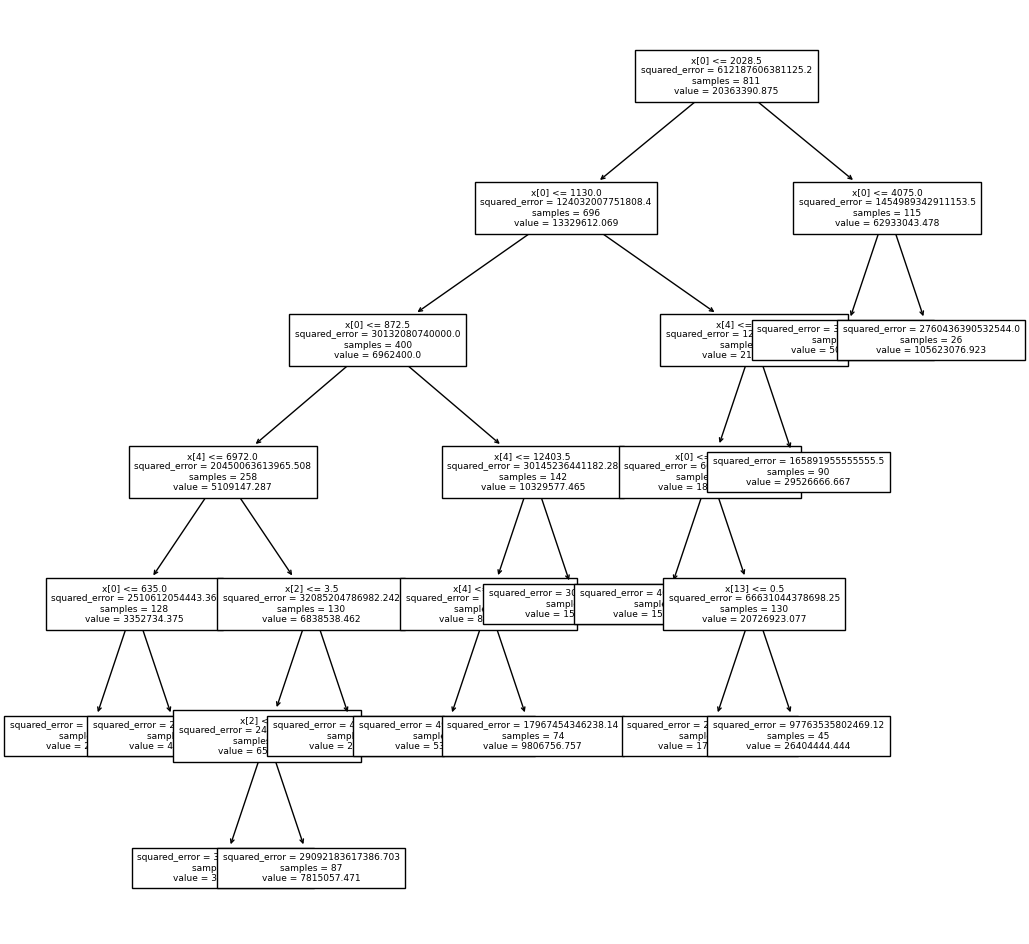

In [198]:
# Plotting a decision tree
plt.figure(figsize = (12,12))
tree.plot_tree(clf, fontsize=6.5)

# Looking at the MSE score of training data 

In [199]:
y_pred_train_clf = clf.predict(X_train)
mean_squared_error(y_train,y_pred_train_clf)

168495875475418.25

In [200]:
mse_train_clf = mean_squared_error(y_train,y_pred_train_clf)

In [201]:
rmse_train_clf = math.sqrt(mse_train_clf)

In [202]:
rmse_train_clf

12980596.114024127

In [203]:
r2_score(y_train,y_pred_train_clf)

0.7247643145351116

In [204]:
X_train

Area  BHK  Bathroom  Parking  Per_Sqft  Furnishing_Furnished  \
807    580.0    1       1.0      1.0    4138.0                   0.0   
432    270.0    1       1.0      2.0   11556.0                   0.0   
681   2300.0    5       6.0      3.0   21311.0                   0.0   
978   1150.0    3       3.0      1.0    9655.0                   0.0   
857    420.0    1       1.0      1.0    4922.0                   0.0   
...      ...  ...       ...      ...       ...                   ...   
1049  1240.0    3       3.0      1.0   11291.5                   0.0   
1100   630.0    2       2.0      1.0   65714.0                   0.0   
1135  1350.0    3       3.0      1.0   15278.0                   0.0   
865    720.0    3       2.0      1.0   42222.0                   1.0   
1131   900.0    2       2.0      1.0   16667.0                   0.0   

      Furnishing_Semi-Furnished  Furnishing_Unfurnished  Status_Almost_ready  \
807                         1.0                     0.0                  0.0   
432                         0.0                     1.0                  0.0   
681                         0.0                     1.0                  0.0   
978                         1.0                     0.0                  0.0   
857                         0.0                     1.0                  0.0   
...                         ...                     ...                  ...   
1049                        1.0                     0.0                  0.0   
1100                        1.0                     0.0                  0.0   
1135                        1.0                     0.0                  0.0   
865                         0.0                     0.0                  0.0   
1131                        0.0                     1.0                  0.0   

      Status_Ready_to_move  Transaction_New_Property  Transaction_Resale  \
807                    1.0                       0.0                 1.0   
432                    1.0                       0.0                 1.0   
681                    1.0                       0.0                 1.0   
978                    1.0                       0.0                 1.0   
857                    1.0                       1.0                 0.0   
...                    ...                       ...                 ...   
1049                   1.0                       0.0                 1.0   
1100                   1.0                       0.0                 1.0   
1135                   1.0                       0.0                 1.0   
865                    1.0                       0.0                 1.0   
1131                   1.0                       0.0                 1.0   

      Type_Apartment  Type_Builder_Floor  
807              1.0                 0.0  
432              0.0                 1.0  
681              1.0                 0.0  
978              1.0                 0.0  
857              0.0                 1.0  
...              ...                 ...  
1049             1.0                 0.0  
1100             1.0                 0.0  
1135             1.0                 0.0  
865              1.0                 0.0  
1131             0.0                 1.0  

[811 rows x 14 columns]

# Looking at the MSE score of testing data

In [205]:
y_pred_test_clf = clf.predict(X_test)

In [206]:
mean_squared_error(y_test,y_pred_test_clf)

276605723297193.56

In [207]:
mse_test_clf = mean_squared_error(y_test,y_pred_test_clf)

In [208]:
rmse_test_clf = math.sqrt(mse_test_clf)

In [209]:
rmse_test_clf

16631467.863576971

In [210]:
r2_score(y_test,y_pred_test_clf)

0.6260451688023692

# Saving my Decision Tree

In [211]:
# Saving our model through joblib
from joblib import dump, load
dump(clf, 'tree.joblib')

['tree.joblib']

In [212]:
def get_prediction(model_path, encoder_path, user_input):
    # Loading our decision tree model
    clf = load(model_path)
    # Loading our encoder
    enc = load(encoder_path)
    # Creating a list for the columns in the dataset
    column = ['Area', 'BHK', 'Bathroom', 'Furnishing', 'Parking', 'Status', 'Transaction', 'Type', 'Per_Sqft']
    dic = {i:[z] for i,z in zip(column, user_input)}
    # Saving the dataframe
    df_temp = pd.DataFrame(dic)
    # Saving our categorical column
    catagorical_data = df_temp[['Furnishing', 'Status', 'Transaction', 'Type']]
    # Saving our numerical column
    numerical_data = df_temp[['Area', 'BHK', 'Bathroom', 'Parking', 'Per_Sqft']]
    # Transforming the categorical column through our previously loaded model
    enc.transform(catagorical_data)
    # Getting out the values
    enc.transform(catagorical_data).toarray()
    # Creating a dataframe out of the transformed column values and saving it in a variable
    df2 = pd.DataFrame(enc.transform(catagorical_data).toarray(), columns = enc.get_feature_names_out())
    # Joining the transformed categorical column with the numerical columns
    df3 = numerical_data.join(df2)
    # Prediction
    pred = clf.predict(df3)
    # Returning the prediction
    return pred

In [213]:
# Testing our function !!
get_prediction('tree.joblib', 'encoder.joblib', [800.0,3,2.0,'Semi-Furnished',1.0,'Ready_to_move','New_Property','Builder_Floor',11291.5])

array([7815057.47126437])

In [214]:
df.head(1)

Area  BHK  Bathroom      Furnishing          Locality  Parking    Price  \
0  800.0    3       2.0  Semi-Furnished  Rohini Sector 25      1.0  6500000   

          Status   Transaction           Type  Per_Sqft  ar_range  
0  Ready_to_move  New_Property  Builder_Floor   11291.5         1

# Linear Regression

In [ ]:
# Initialising the regressor
lr = LinearRegression()

In [ ]:
# Fitting out training values into the model 
lr =  lr.fit(X_train,y_train)

In [ ]:
# Saving the training predictions in a variable
y_pred_train_lr = lr.predict(X_train)

In [ ]:
# Saving the testing predictions in a variable
y_pred_test_lr = lr.predict(X_test)

In [ ]:
# Plotting the predictions
plt.title('Model Prediction')
plt.scatter(y_pred_train_lr,y_train, color="brown")

In [ ]:
# Plotting a distrubution plot
sns.distplot(y_test-y_pred_test_lr,bins=10, color="red")

In [ ]:
# Saving the range of our testing data in a variable
x_range = [i for i in range(len(y_test))]

In [ ]:
# Plotting the Model Predictions and Actual Predictions
plt.title('Model Predictions vs Actual Values')

plt.scatter(x_range,y_test)
plt.scatter(x_range,y_pred_test_lr)
plt.plot()

plt.legend(["Real", "Predicted"])

In [ ]:
# Plotting the Model Predictions and Actual Predictions
plt.title('Model Predictions vs Actual Values')

plt.plot(x_range,y_test)
plt.plot(x_range,y_pred_test_lr)
plt.plot()

plt.legend(["Real", "Predicted"])

# Plotting the predictions for Testing data

In [ ]:
# Plotting the predictions for the testing data
plt.title('Model Prediction')
plt.scatter(y_pred_test_lr,y_test, color="brown")

# Looking at the MSE score of training data

In [ ]:
mean_squared_error(y_train,y_pred_train_lr)

In [ ]:
mse_train_lr=mean_squared_error(y_train,y_pred_train_lr)

In [ ]:
rmse_train_lr = math.sqrt(mse_train_lr)

In [ ]:
rmse_train_lr

In [ ]:
r2_score(y_train,y_pred_train_lr)

# Looking at the MSE score of testing data

In [ ]:
mean_squared_error(y_test,y_pred_test_lr)

In [ ]:
mse_test_lr=mean_squared_error(y_test,y_pred_test_lr)

In [ ]:
rmse_test_lr = math.sqrt(mse_test_lr)

In [ ]:
rmse_test_lr

In [ ]:
r2_score(y_test,y_pred_test_lr)

# Checking the score for our model

In [ ]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)

In [ ]:
train_accuracy

In [ ]:
test_accuracy

In [ ]:
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
(model.summary())

# Saving our Linear Regression model

In [ ]:
# Saving our model through joblib
from joblib import dump, load
dump(lr, 'linear.joblib')

# Creating our model to a function

In [ ]:
def get_prediction1(model_path, encoder_path, user_input):
    lr = load(model_path)
    enc = load(encoder_path)
    column = ['Area', 'BHK', 'Bathroom', 'Furnishing', 'Parking', 'Status', 'Transaction', 'Type', 'Per_Sqft']
    dic = {i:[z] for i,z in zip(column, user_input)}
    df_temp = pd.DataFrame(dic)
    catagorical_data = df_temp[['Furnishing', 'Status', 'Transaction', 'Type']]
    numerical_data = df_temp[['Area', 'BHK', 'Bathroom', 'Parking', 'Per_Sqft']]
    enc.transform(catagorical_data)
    enc.transform(catagorical_data).toarray()
    df2 = pd.DataFrame(enc.transform(catagorical_data).toarray(), columns = enc.get_feature_names_out())
    df3 = numerical_data.join(df2)
    pred = lr.predict(df3)
    return pred

In [ ]:
# Testing our function
get_prediction1('linear.joblib', 'encoder.joblib', [800.0,3,2.0,'Semi-Furnished',1.0,'Ready_to_move','New_Property','Builder_Floor',11291.5,1])

# The End.......I can finally rest and watch the sunrise of a grateful universe
![](https://media.tenor.com/xHY18avbYVcAAAAC/smiling-mcu.gif)